In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)

In [3]:
df_train = pd.read_csv("train.csv")
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [4]:
df_test = pd.read_csv("test.csv")

In [5]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

* Continuous variables - 
    - 'LotFrontage' - Mean LotFrontage is 70 feet,
    - 'LotArea' - Mean LotFrontage is 10485 squre feet - may contain outliers due to significant difference between mean and median,
    - 'YearBuilt' - Oldest - 1875 ; Latest - 2010 ; Majority built before 2000,
    - 'YearRemodAdd' - Oldest - 1950; Latest - 2010,
    - 'MasVnrArea' - Mean Masonary veneer area is 253 square feet('MasVnrType'!=None),
    - 'BsmtFinSF1' - Mean LotFrontage is 70 feet,
    - 'BsmtFinSF2' - Mean LotFrontage is 70 feet, 
    - 'BsmtUnfSF' - Mean LotFrontage is 70 feet, 
    - 'TotalBsmtSF' - Mean LotFrontage is 70 feet, 
    - '1stFlrSF' - Mean LotFrontage is 70 feet, 
    - '2ndFlrSF' - Mean LotFrontage is 70 feet, 
    - 'LowQualFinSF' - Mean LotFrontage is 70 feet, 
    - 'GrLivArea' - Mean LotFrontage is 70 feet, 
    - 'BsmtFullBath' - Mean LotFrontage is 70 feet, 
    - 'BsmtHalfBath' - Mean LotFrontage is 70 feet, 
    - 'FullBath' - Mean LotFrontage is 70 feet,
    - 'HalfBath' - Mean LotFrontage is 70 feet, 
    - 'BedroomAbvGr' - Mean LotFrontage is 70 feet, 
    - 'KitchenAbvGr' - Mean LotFrontage is 70 feet, 
    - 'TotRmsAbvGrd' - Mean LotFrontage is 70 feet, 
    - 'Fireplaces' - Mean LotFrontage is 70 feet, 
    - 'GarageYrBlt', 
    - 'GarageFinish', 
    - 'GarageCars', 
    - 'GarageArea',
    - 'WoodDeckSF', 
    - 'OpenPorchSF',
    - 'EnclosedPorch', 
    - '3SsnPorch',
    - 'ScreenPorch',
    - 'PoolArea',
    - 'MiscVal', 
    - 'MoSold', 
    - 'YrSold', 
    - 'SalePrice'.

In [6]:
pd.DataFrame(df_train.dtypes).transpose()

Id MSSubClass MSZoning LotFrontage LotArea  Street   Alley LotShape  \
0  int64      int64   object     float64   int64  object  object   object   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      object    object    object    object       object     object   

  Condition2 BldgType HouseStyle OverallQual OverallCond YearBuilt  \
0     object   object     object       int64       int64     int64   

  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0        int64    object   object      object      object     object   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    float64    object    object     object   object   object       object   

  BsmtFinType1 BsmtFinSF1 BsmtFinType2 BsmtFinSF2 BsmtUnfSF TotalBsmtSF  \
0       object      int64       object      int64     int64       int64   

  Heating HeatingQC CentralAir Electrical 1stFlrSF 2ndFlrSF LowQualFinSF  \
0  object    object     object     object    int64    int64        int64   

  GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
0     int64        int64        int64    int64    int64        int64   

  KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu  \
0        int64      object        int64     object      int64      object   

  GarageType GarageYrBlt GarageFinish GarageCars GarageArea GarageQual  \
0     object     float64       object      int64      int64     object   

  GarageCond PavedDrive WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch  \
0     object     object      int64       int64         int64     int64   

  ScreenPorch PoolArea  PoolQC   Fence MiscFeature MiscVal MoSold YrSold  \
0       int64    int64  object  object      object   int64  int64  int64   

  SaleType SaleCondition SalePrice  
0   object        object     int64

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
pd.DataFrame(df_train.isnull().sum()).transpose()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   0           0         0          214        0       0   1091         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          0          0             0           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           0            0            0          0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             0          0         0            0            0           7   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0           7          0          0           0        30        30   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0            31            30           0            31           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0          0            0        0          0           0           0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0         0         0             0          0             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0         0             0             0            0             0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           0           0          551          64           64            64   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0           0           0          64          64           0           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0            0              0          0            0         0    1161   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0    931         1124        0       0       0         0              0   

   SalePrice  
0          0

In [9]:
pd.DataFrame(df_test.isnull().sum()).transpose()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   0           0         0           45        0       0    278         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          0          0             0           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           0            0            0          0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             0          0         0            0            0           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0           1          0          0           0         7         7   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             7             7           0             7           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0          0            0        0          0           0           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0         0         0             0          0             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0         0             0             0            0             0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           0           0          139          17           17            17   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0           0           0          17          17           0           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0            0              0          0            0         0     292   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0    248          282        0       0       0         0              0

* There are several null values in the dataset
* We can fill null values in 'LotFrontage' using 'MSZoning' and 'MSSubClass'
* We can fill null values in 'Alley' with 'NA' ----> No alley access
* We can fill null values in 'MasVnrType' using 'MSSubClass'
* We can fill null values in 'MasVnrArea' using 'MasVnrType'
* We can fill null values in 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' with NA as nulll values are a result of houses without Basement
* We can fill null values in 'FireplaceQu'with NA as nulll values are a result of houses without fireplace
* We can fill null values in 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond'with NA as nulll values are a result of houses without garage
* We can fill null values in 'PoolQC'with NA as nulll values are a result of houses without pool
* We can fill null values in 'Fence'with NA as nulll values are a result of houses without Fence
* We can fill null values in 'MiscFeature'with NA as nulll values are a result of houses without additional features
* We can fill null values in 'Electrical'with mode of the column

* The column 'YearBuilt' and 'YrSold' can be used to find the Age of the building
* The column 'YearRemodAdd' can be used to find if remodelling was done or not

In [10]:
df_test[df_test['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
103  1380          80       RL         73.0     9735   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
103         Lvl    AllPub    Inside       Gtl       Timber       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
103       Norm     1Fam       SLvl            5            5       2006   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
103          2007     Gable  CompShg     VinylSd     VinylSd       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
103         0.0        TA        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
103          Unf           0          Unf           0        384          384   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
103    GasA        Gd          Y        NaN       754       640             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
103       1394             0             0         2         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
103             1          Gd             7        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
103         NaN    BuiltIn       2007.0          Fin           2         400   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
103         TA         TA          Y         100            0              0   

     3SsnPorch  ScreenPorch  PoolArea  PoolQC Fence MiscFeature  MiscVal  \
103          0            0         0     NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  
103       5    2008       WD        Normal

In [11]:
df_train[df_train['BsmtExposure'].isnull() * ~(df_train['BsmtQual'].isnull())]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
294  949          60       RL         65.0    14006   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
294         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
294       Norm     1Fam     2Story            7            5       2002   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
294          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
294       144.0        Gd        TA      PConc       Gd       TA          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
294          Unf           0          Unf           0        936          936   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
294    GasA        Ex          Y      SBrkr       936       840             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
294       1776             0             0         2         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
294             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
294          TA     Attchd       2002.0          RFn           2         474   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
294         TA         TA          Y         144           96              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
294          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
294       2    2006       WD        Normal     192500

In [12]:
df_train[df_train['BsmtFinType2'].isnull() * ~(df_train['BsmtQual'].isnull())]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
243  333          20       RL         85.0    10655   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
243       Norm     1Fam     1Story            8            5       2003   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
243          2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
243       296.0        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
243          GLQ        1124          NaN         479       1603         3206   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
243    GasA        Ex          Y      SBrkr      1629         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
243       1629             1             0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
243             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
243          Gd     Attchd       2003.0          RFn           3         880   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
243         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
243          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
243      10    2009       WD        Normal     284000

In [13]:
df_train['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [14]:
df_test['BsmtQual'].value_counts()

TA    132
Gd    120
Ex     27
Fa      6
Name: BsmtQual, dtype: int64

In [15]:
df_train['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [16]:
df_test['BsmtExposure'].value_counts()

No    197
Av     41
Gd     26
Mn     21
Name: BsmtExposure, dtype: int64

In [17]:
df_train['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [18]:
df_test['BsmtFinType1'].value_counts()

GLQ    88
Unf    85
ALQ    46
BLQ    27
Rec    24
LwQ    15
Name: BsmtFinType1, dtype: int64

In [19]:
df_train['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [20]:
df_test['BsmtFinType2'].value_counts()

Unf    254
Rec     11
BLQ      9
LwQ      6
ALQ      3
GLQ      2
Name: BsmtFinType2, dtype: int64

In [21]:
df_train[df_train['BsmtQual'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
54    1050          20       RL         60.0    11100   Pave   NaN      Reg   
60     533          20       RL         60.0     7200   Pave   NaN      Reg   
86     157          20       RL         60.0     7200   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1107  1180          20       RL         77.0     8335   Pave   NaN      Reg   
1117  1219          50       RM         52.0     6240   Pave   NaN      Reg   
1126   103          90       RL         64.0     7018   Pave   NaN      Reg   
1148   985          90       RL         75.0    10125   Pave   NaN      Reg   
1164   554          20       RL         67.0     8777   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
34           Lvl    AllPub    Corner       Gtl      Gilbert      Feedr   
48           Low    AllPub    Inside       Mod      BrkSide       Norm   
54           Low    AllPub    Inside       Gtl      Edwards       Norm   
60           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
86           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1107         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
1117         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
1126         Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
1148         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
34         Norm     1Fam     2Story            5            6       1948   
48         Norm     1Fam     1Story            1            3       1946   
54         Norm     1Fam     1Story            4            7       1946   
60         Norm     1Fam     1Story            5            7       1955   
86         Norm     1Fam     1Story            5            7       1950   
...         ...      ...        ...          ...          ...        ...   
1107       Norm     1Fam     1Story            5            5       1954   
1117       Norm     1Fam     1.5Fin            4            5       1947   
1126       Norm   Duplex     1Story            5            5       1979   
1148       Norm   Duplex     1.5Fin            5            5       1977   
1164       Norm     1Fam     1Story            4            5       1949   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
34            1950     Gable  CompShg     Plywood     Plywood       None   
48            1950     Gable  CompShg     VinylSd     VinylSd       None   
54            2006     Gable  CompShg     MetalSd     MetalSd       None   
60            2007     Gable  CompShg     VinylSd     VinylSd       None   
86            1950       Hip  CompShg     Wd Sdng     Wd Sdng       None   
...            ...       ...      ...         ...         ...        ...   
1107          1954     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1117          1950     Gable  CompShg     AsbShng     AsbShng       None   
1126          1979     Gable  CompShg     HdBoard     HdBoard       None   
1148          1977     Gable  CompShg     Plywood     Plywood       None   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
34           0.0        TA        TA       Slab      NaN      NaN   
48           0.0        Fa        Fa       Slab      NaN      NaN   
54           0.0        TA        TA     CBlock      NaN      NaN   
60           0.0        TA        TA       Slab      NaN      NaN   

In [22]:
a = df_train[~df_train['MasVnrType'].isnull()]
a

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

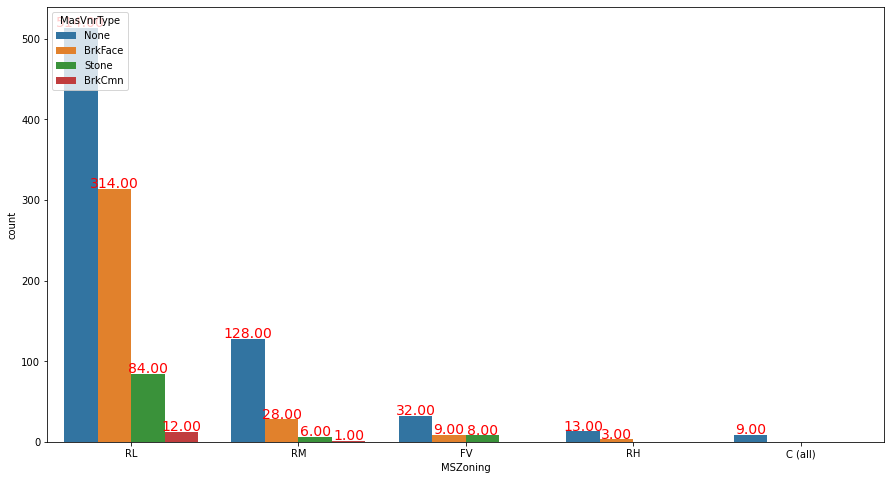

In [23]:
plt.figure(figsize=(15,8))
ax = sns.countplot( hue =a['MasVnrType'], x =a['MSZoning'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [24]:
df_train[df_train['Fireplaces']==0]['MSZoning'].value_counts()

RL         382
RM         112
FV          34
RH          15
C (all)      8
Name: MSZoning, dtype: int64

In [25]:
df_train['MSZoning'].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [26]:
df_test[df_test['Fireplaces']==0]['MSZoning'].value_counts()

RL         92
RM         40
FV          6
C (all)     1
Name: MSZoning, dtype: int64

In [27]:
df_test['MSZoning'].value_counts()

RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64

In [28]:
df_train[df_train['2ndFlrSF']!=0]['MSSubClass'].value_counts()

60     244
50     107
70      53
160     47
190     17
75      14
80      11
90       9
85       1
40       1
20       1
Name: MSSubClass, dtype: int64

In [29]:
a = df_train[df_train['MasVnrType']!='None']['MasVnrArea']
a.mean()

253.41075268817204

In [30]:
a = df_train[df_train['BsmtFinSF1']!=0]['BsmtFinSF1']
a.mean()

655.031525851198

### FILLING NULL VALUES

#### 'LotFrontage'

In [31]:
df_grp1 = df_train[['MSZoning', 'MSSubClass', 'LotFrontage']]
df_grp1.groupby(['MSZoning', 'MSSubClass']).mean().transpose()

MSZoning    C (all)                                 FV                   \
MSSubClass      20    30    50    70    190        20         60    120   
LotFrontage    58.0  90.0  77.0  50.0  60.0  73.777778  74.052632  44.5   

MSZoning                  RH                                                 \
MSSubClass         160   20    30    45    50    70         90    120   190   
LotFrontage  29.428571  60.0  70.0  60.0  55.0  54.5  74.666667  34.0  60.0   

MSZoning            RL                                                       \
MSSubClass         20    30    40    45    50         60         70     75    
LotFrontage  78.666667  61.6  60.0  58.0  67.0  83.573964  72.791667  86.75   

MSZoning                                                                    \
MSSubClass         80         85         90         120     160        190   
LotFrontage  82.214286  72.692308  69.344828  47.585366  34.875  71.692308   

MSZoning       RM                                                          \
MSSubClass    20         30    40         45         50    60         70    
LotFrontage  66.0  61.086957  50.0  52.666667  56.942857  60.0  61.285714   

MSZoning                                                      
MSSubClass         75    90    120    160        180     190  
LotFrontage  72.111111  67.0  43.0  24.35  25.666667  65.625

In [32]:
df_train["LotFrontage"] = df_train.groupby(['MSZoning', 'MSSubClass'])["LotFrontage"].transform(lambda x: x.fillna(round(x.mean(),0)))

In [33]:
df_test['LotFrontage'] = df_test.groupby(['MSZoning', 'MSSubClass'])['LotFrontage'].transform(lambda x: x.fillna(round(x.mean(),0)))

#### 'Alley'

In [34]:
df_train.fillna({'Alley':'NA'}, inplace=True)
df_test.fillna({'Alley':'NA'}, inplace=True)

In [35]:
df_train['Alley'].isnull().sum()

0

In [36]:
df_train['Alley'].isnull().sum()

0

#### 'MasVnrType'

In [37]:
df_train['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [38]:
from scipy.stats import mode

dict_grp2 = df_train.groupby(['MSSubClass', 'MSZoning'])["MasVnrType"].agg(lambda x:mode(x).mode[0]).to_dict()
dict_grp2

{(20, 'C (all)'): 'None',
 (20, 'FV'): 'None',
 (20, 'RH'): 'None',
 (20, 'RL'): 'None',
 (20, 'RM'): 'None',
 (30, 'C (all)'): 'None',
 (30, 'RH'): 'None',
 (30, 'RL'): 'None',
 (30, 'RM'): 'None',
 (40, 'RL'): 'None',
 (40, 'RM'): 'None',
 (45, 'RH'): 'None',
 (45, 'RL'): 'None',
 (45, 'RM'): 'None',
 (50, 'C (all)'): 'None',
 (50, 'RH'): 'None',
 (50, 'RL'): 'None',
 (50, 'RM'): 'None',
 (60, 'FV'): 'None',
 (60, 'RL'): 'BrkFace',
 (60, 'RM'): 'None',
 (70, 'C (all)'): 'None',
 (70, 'RH'): 'None',
 (70, 'RL'): 'None',
 (70, 'RM'): 'None',
 (75, 'RL'): 'None',
 (75, 'RM'): 'None',
 (80, 'RL'): 'BrkFace',
 (85, 'RL'): 'None',
 (90, 'RH'): 'BrkFace',
 (90, 'RL'): 'None',
 (90, 'RM'): 'BrkFace',
 (120, 'FV'): 'None',
 (120, 'RH'): 'BrkFace',
 (120, 'RL'): 'None',
 (120, 'RM'): 'BrkFace',
 (160, 'FV'): 'None',
 (160, 'RL'): 'None',
 (160, 'RM'): 'BrkFace',
 (180, 'RM'): 'None',
 (190, 'C (all)'): 'None',
 (190, 'RH'): 'None',
 (190, 'RL'): 'None',
 (190, 'RM'): 'None'}

In [39]:
df_train.fillna({'MasVnrType':'NAN'}, inplace=True)
df_test.fillna({'MasVnrType':'NAN'}, inplace=True)

In [40]:
df_train['MasVnrType'] = df_train.apply(lambda row: dict_grp2[(row['MSSubClass'], row['MSZoning'])] if (row['MasVnrType']=='NAN') else row['MasVnrType'],axis=1)

In [41]:
df_test['MasVnrType'] = df_test.apply(lambda row: dict_grp2[(row['MSSubClass'], row['MSZoning'])] if (row['MasVnrType']=='NAN') else row['MasVnrType'],axis=1)

In [42]:
df_train['MasVnrType'].value_counts()

None       701
BrkFace    356
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [43]:
df_test['MasVnrType'].value_counts()

None       169
BrkFace     91
Stone       30
BrkCmn       2
Name: MasVnrType, dtype: int64

#### 'MasVnrArea'

In [44]:
df_train['MasVnrArea'] =  df_train.apply(lambda row: 0 if (row['MasVnrType']=='None') else row['MasVnrArea'],axis=1)

In [45]:
df_grp3 = df_train[['MasVnrType','MasVnrArea']].groupby('MasVnrType').mean()
df_grp3

MasVnrArea
MasVnrType            
BrkCmn      212.769231
BrkFace     255.788136
None          0.000000
Stone       250.214286

In [46]:
df_train['MasVnrArea'] = df_train.groupby('MasVnrType')['MasVnrArea'].transform(lambda x: x.fillna(round(x.mean(),0)))
df_test['MasVnrArea'] = df_test.groupby('MasVnrType')['MasVnrArea'].transform(lambda x: x.fillna(round(x.mean(),0)))

In [47]:
df_train['MasVnrArea'].isnull().sum()

0

In [48]:
df_test['MasVnrArea'].isnull().sum()

0

#### 'Electrical'

In [49]:
df_train.fillna({'Electrical':'SBrkr'},inplace=True)
df_test.fillna({'Electrical':'SBrkr'},inplace=True)

In [50]:
df_train['Electrical'].isnull().sum()

0

In [51]:
df_test['Electrical'].isnull().sum()

0

#### We can drop 'GarageYrBlt' as the null values in that column cannnot be filled as their null values indicate Garage was not built

In [52]:
df_train.drop('GarageYrBlt',axis=1,inplace=True)
df_test.drop('GarageYrBlt',axis=1,inplace=True)

#### We can fill other null values using NA as those features are not available

In [53]:
a = pd.DataFrame(df_train.isnull().sum())
a[a[0]!=0]

0
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinType2    31
FireplaceQu    551
GarageType      64
GarageFinish    64
GarageQual      64
GarageCond      64
PoolQC        1161
Fence          931
MiscFeature   1124

In [54]:
a = pd.DataFrame(df_test.isnull().sum())
a[a[0]!=0]

0
BsmtQual        7
BsmtCond        7
BsmtExposure    7
BsmtFinType1    7
BsmtFinType2    7
FireplaceQu   139
GarageType     17
GarageFinish   17
GarageQual     17
GarageCond     17
PoolQC        292
Fence         248
MiscFeature   282

In [55]:
df_train.fillna('NA',inplace=True)
df_test.fillna('NA',inplace=True)

In [56]:
a = pd.DataFrame(df_train.isnull().sum())
a[a[0]!=0]

Empty DataFrame
Columns: [0]
Index: []

In [57]:
a = pd.DataFrame(df_test.isnull().sum())
a[a[0]!=0]

Empty DataFrame
Columns: [0]
Index: []

## EDA

### UNIVARIATE ANALYSIS

In [58]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    71.592466   10484.749144     6.104452   
std     416.159877    41.940650    23.136938    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    72.000000    9522.500000     6.000000   
75%    1079.500000    70.000000    82.000000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   101.325342   444.726027   
std       1.124343    30.145255     20.785185   182.031595   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   158.500000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000       0.00

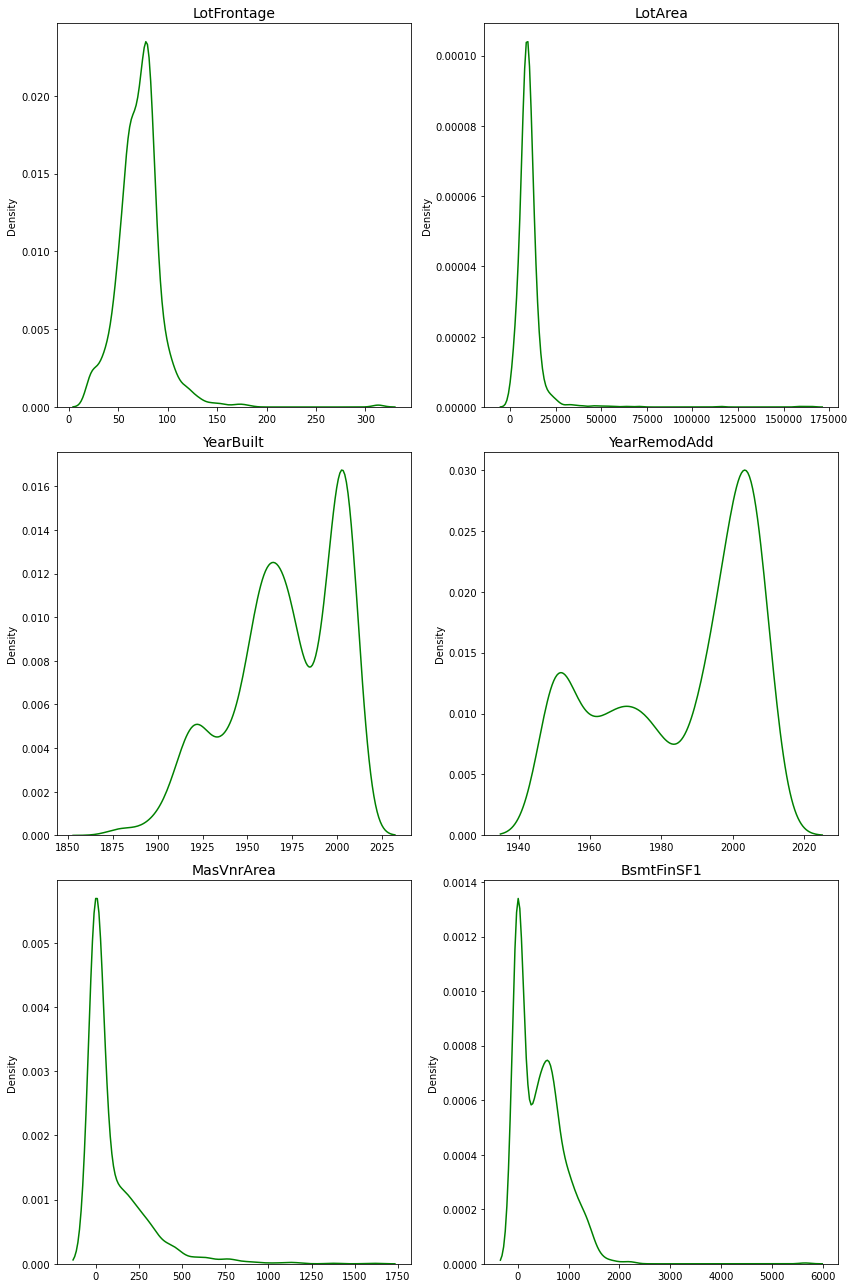

In [59]:
cont = ['LotFrontage' , 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

plt.figure(figsize=(12,18))
j=1
for i in cont[:6]:
    plt.subplot(3,2,j)
    j+=1
    ax = sns.distplot(df_train[i], hist=False, color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Columns 'LotFrontage' , 'LotArea', 'MasVnrArea' and 'BsmtFinSF1' are right skewed
* Columns 'YearBuilt', 'YearRemodAdd' are multimodal and are left skewed.
* Column 'BsmtFinSF1' is bi-modal.

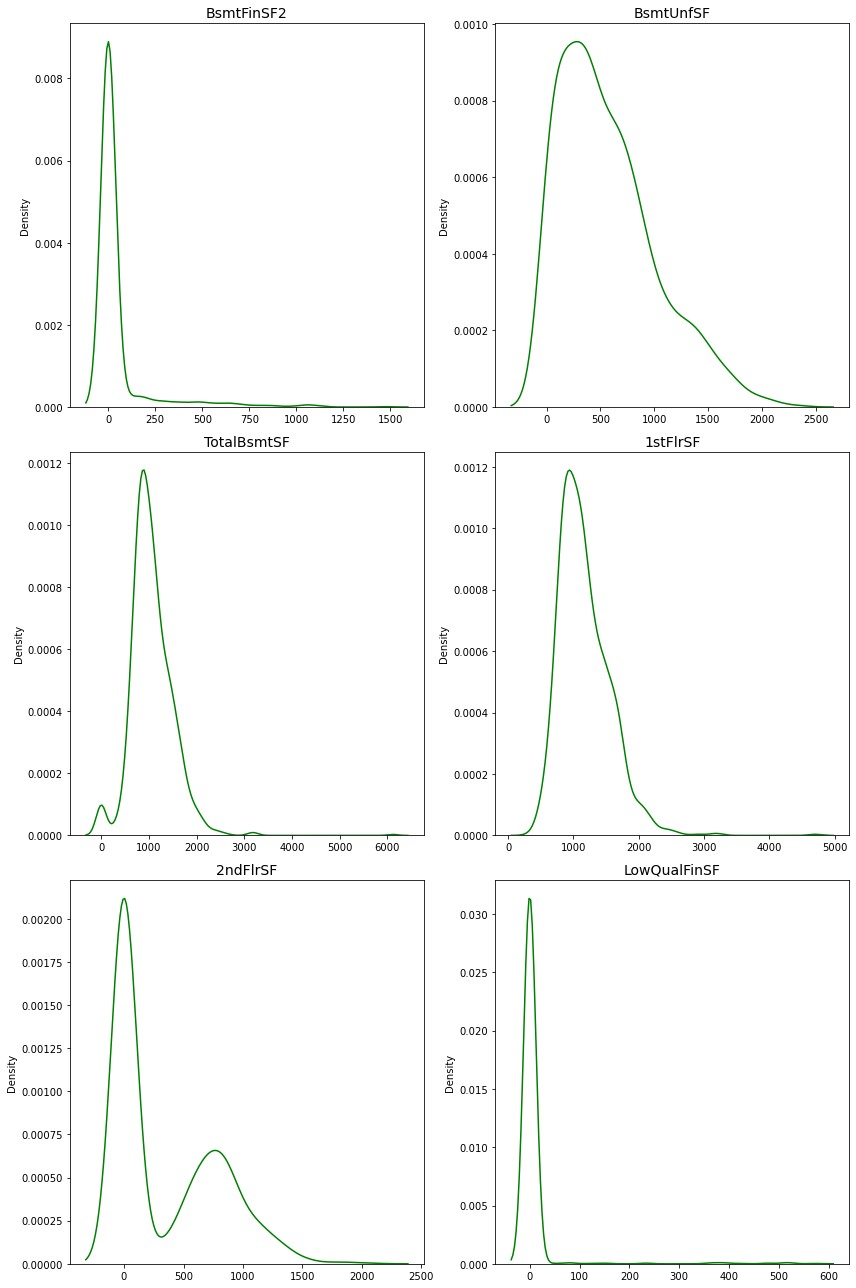

In [60]:
plt.figure(figsize=(12,18))
j=1
for i in cont[6:12]:
    plt.subplot(3,2,j)
    j+=1
    ax = sns.distplot(df_train[i], hist=False, color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Columns 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF' are left skewed.
* Columns '2ndFlrSF' and 'TotalBsmtSF' are bi-modal.

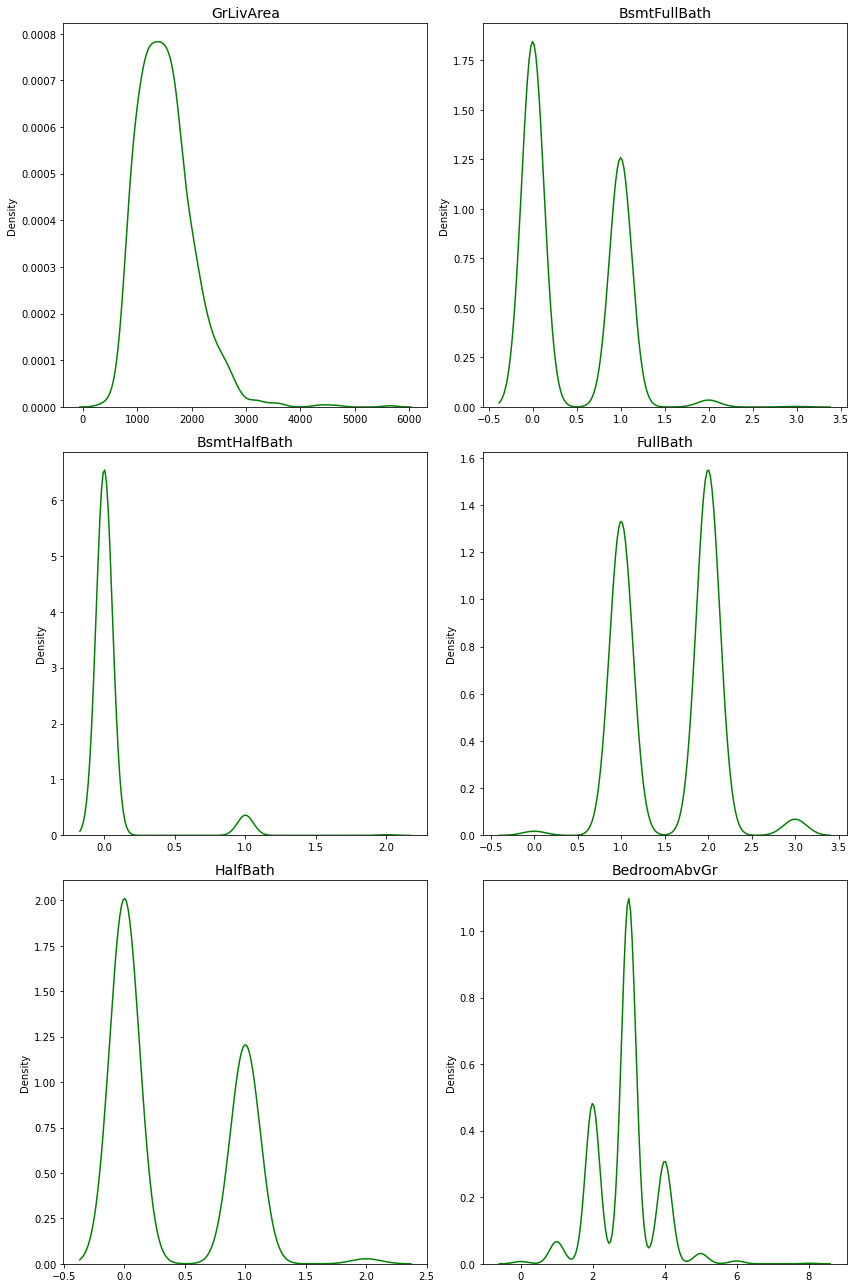

In [61]:
plt.figure(figsize=(12,18))
j=1
for i in cont[12:18]:
    plt.subplot(3,2,j)
    j+=1
    ax = sns.distplot(df_train[i], hist=False, color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Columns 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr' are all left skewed.
* Columns 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', and 'HalfBath' are bi-modal while the column 'BedroomAbvGr' is multi modal

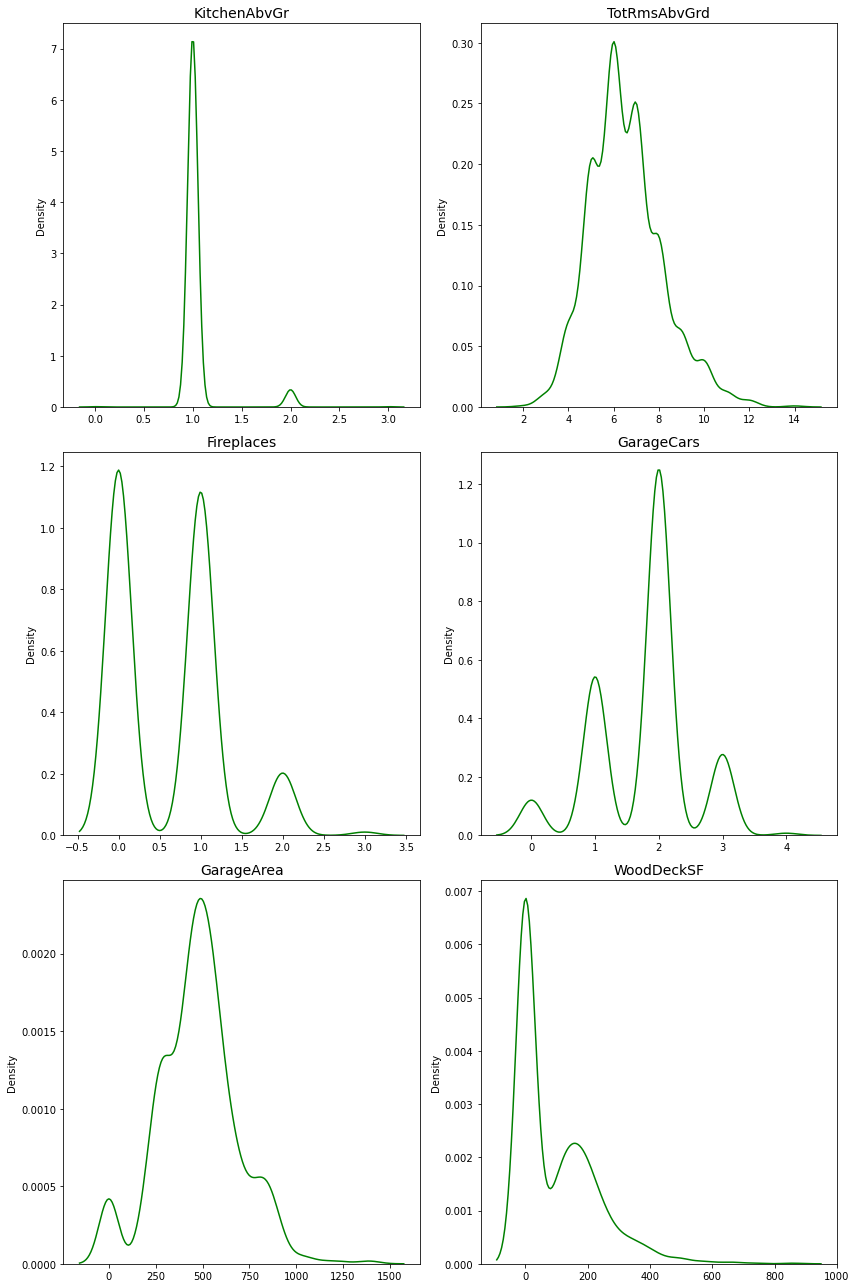

In [62]:
plt.figure(figsize=(12,18))
j=1
for i in cont[18:24]:
    plt.subplot(3,2,j)
    j+=1
    ax = sns.distplot(df_train[i], hist=False, color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Columns 'KitchenAbvGr', 'WoodDeckSF' are left skewed and bi-modal.
* Columns , 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea' are multimodal

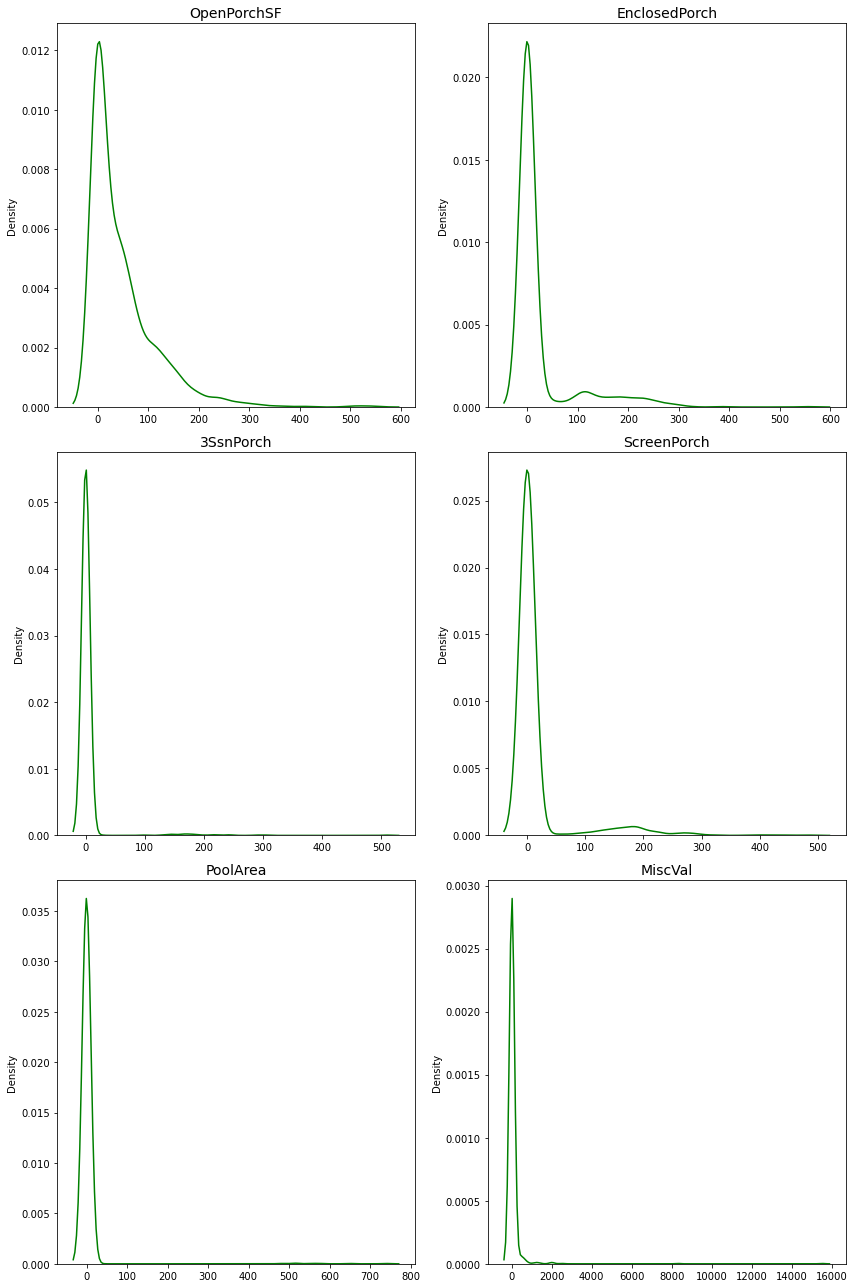

In [63]:
plt.figure(figsize=(12,18))
j=1
for i in cont[24:30]:
    plt.subplot(3,2,j)
    j+=1
    ax = sns.distplot(df_train[i], hist=False, color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Columns 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' are all extremely right skewed and unimodal.

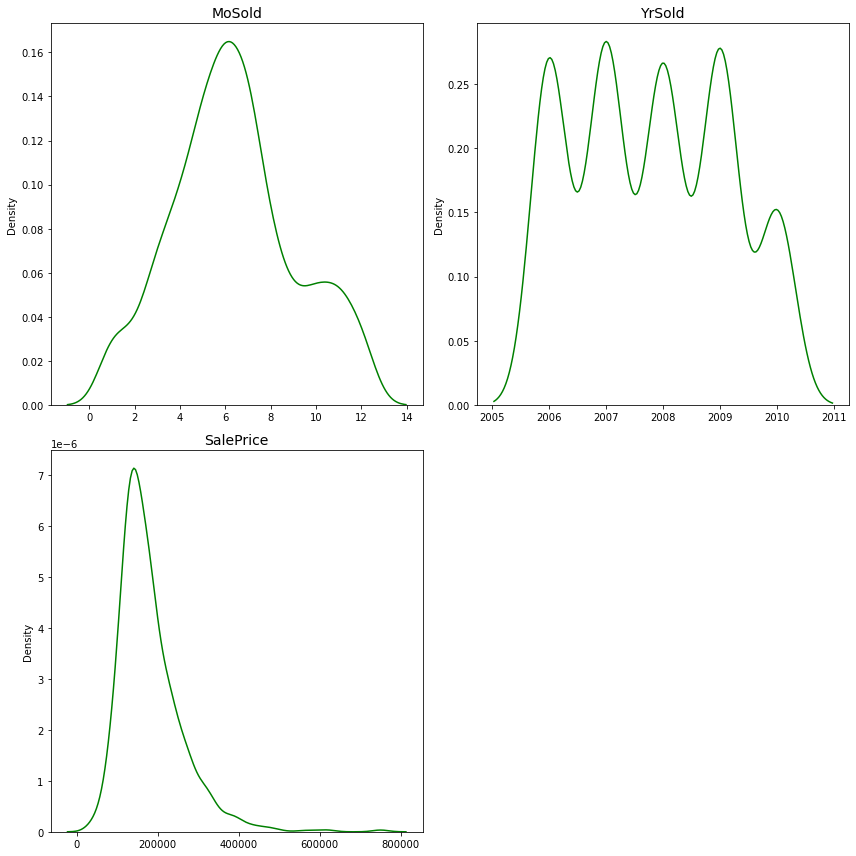

In [64]:
plt.figure(figsize=(12,12))
j=1
for i in cont[30:33]:
    plt.subplot(2,2,j)
    j+=1
    ax = sns.distplot(df_train[i], hist=False, color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Column 'YrSold' is multimodal, 'MoSold' is slightly bi-modal.
* Column 'SalePrice' is Slightly right skewed.

In [65]:
cat = ['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir',
       'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence',
       'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass',
       'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']

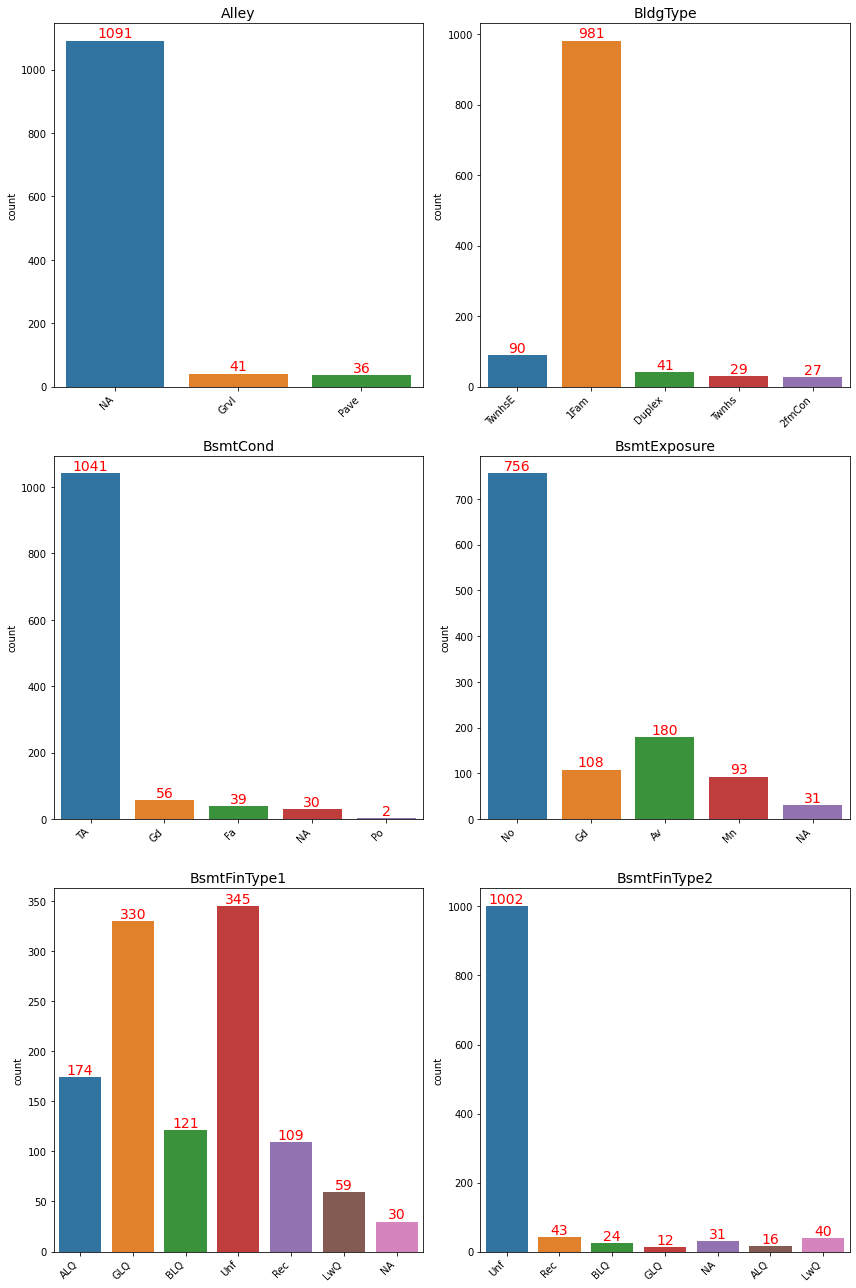

In [66]:
plt.figure(figsize=(12,18))
j=1
for i in cat[:6]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* Most commonly purchased type of building - Single Family detached
* Most basements are typical and have no exposure.
* Most basements are unfinished.
* Most houses do not contain an alley access.

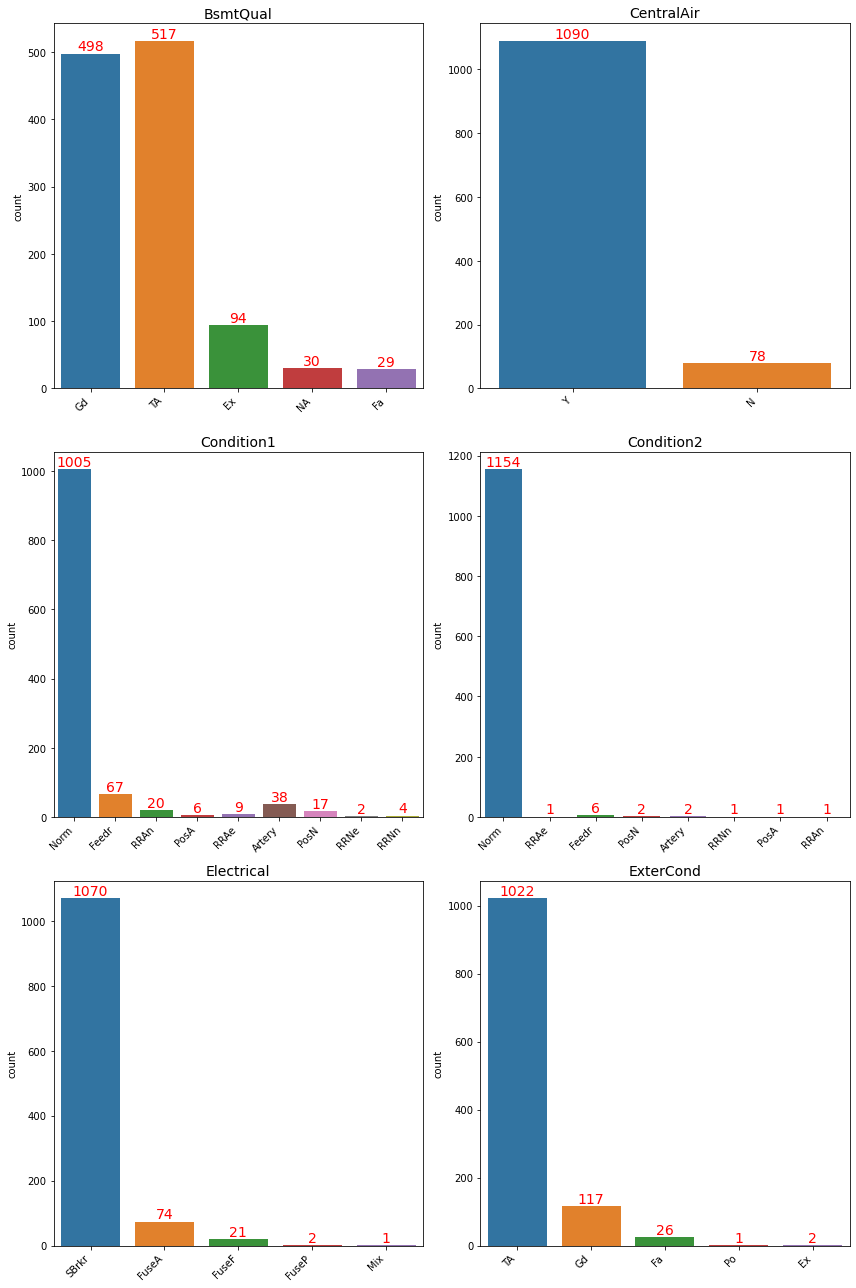

In [67]:
plt.figure(figsize=(12,18))
j=1
for i in cat[6:12]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* Majority of basements have height between 80-99 inches (Typical and Good), have proximity to normal conditions, have central air condition, use Standard Circuit breakers and typical/average exterior conditions.

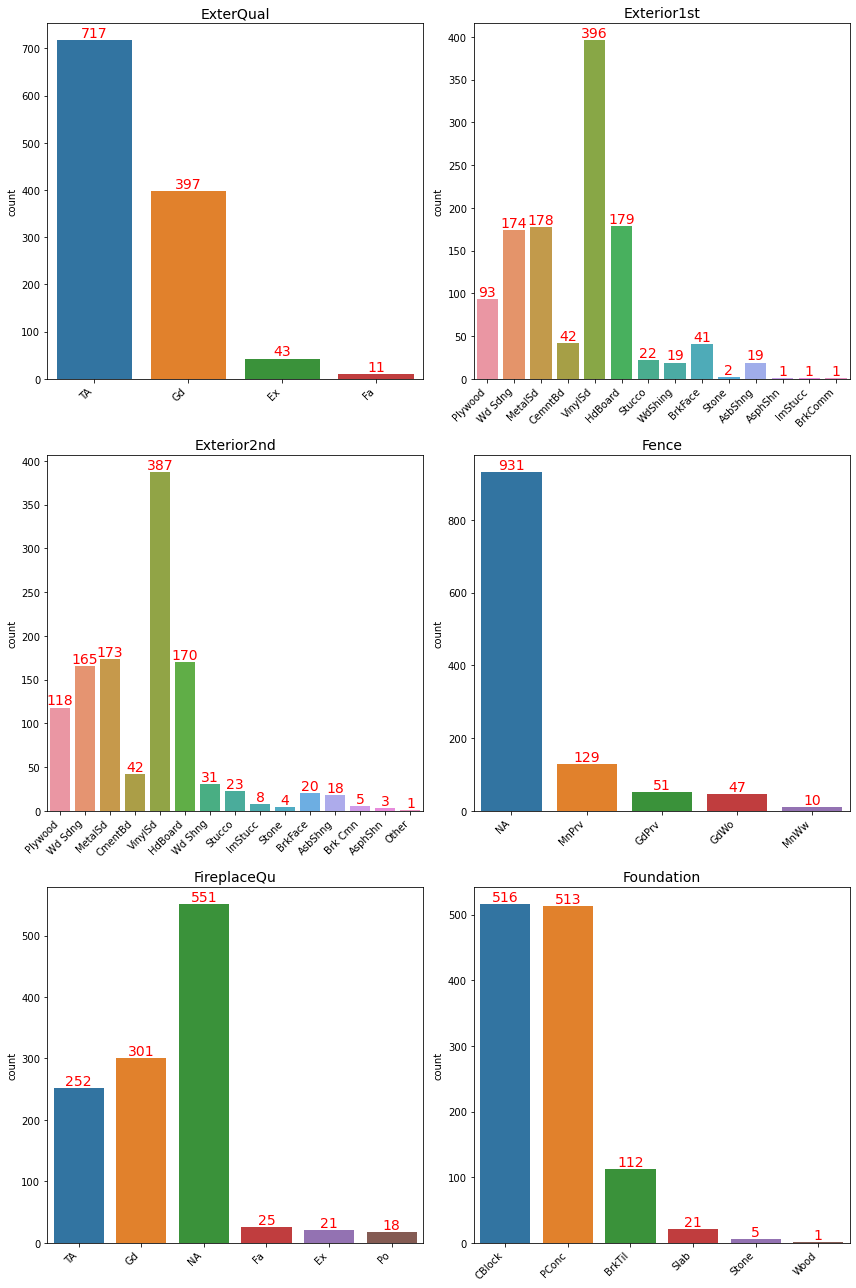

In [68]:
plt.figure(figsize=(12,18))
j=1
for i in cat[12:18]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* Majority of houses have typical/average exterior quality, have vinyl siding as exterior covering, have Cinder block/Poured Concrete as foundation and do not have a fireplace or fence.

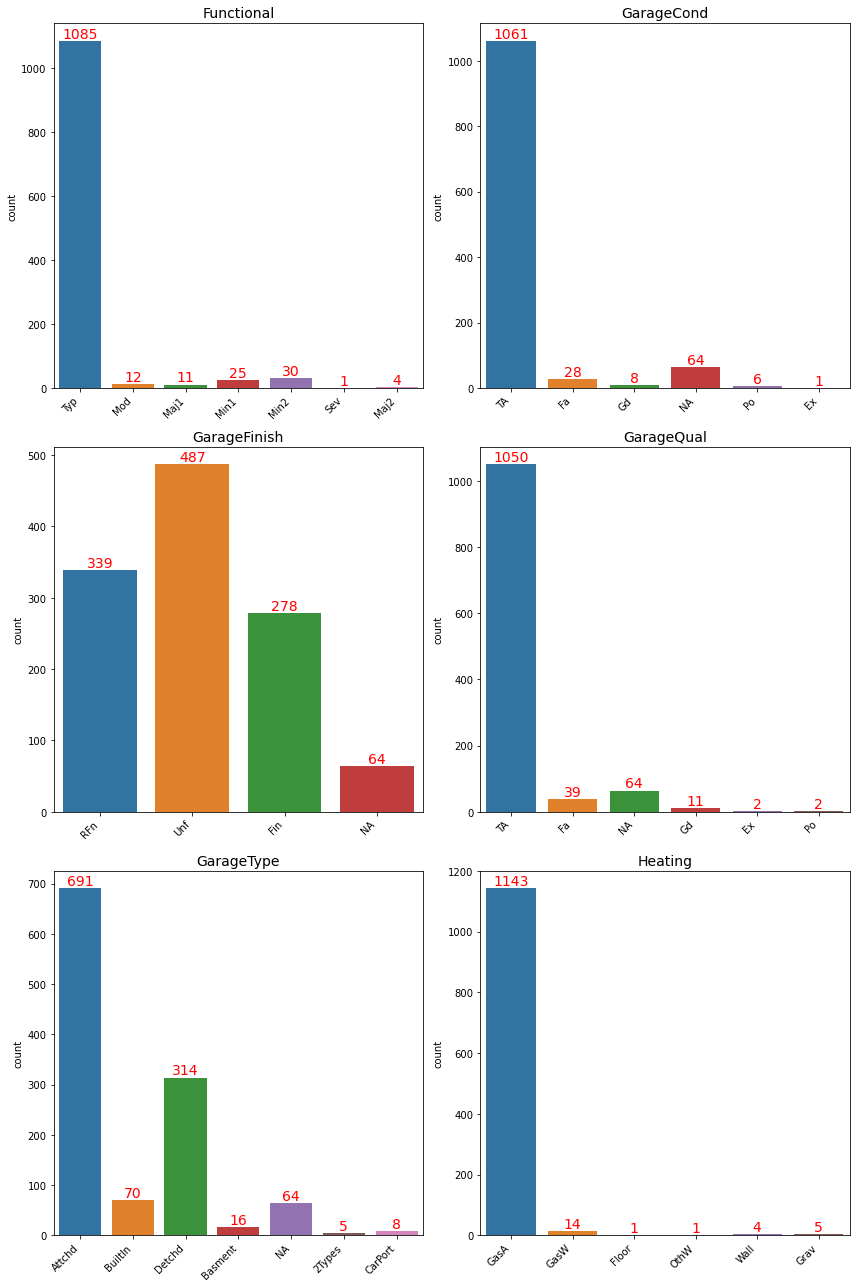

In [69]:
plt.figure(figsize=(12,18))
j=1
for i in cat[18:24]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* Majority of houses have typical functionalities and garage conditions. 
* Most garages are unfinished and attached to the house.
* Most houses have Gas forced warm air furnace.

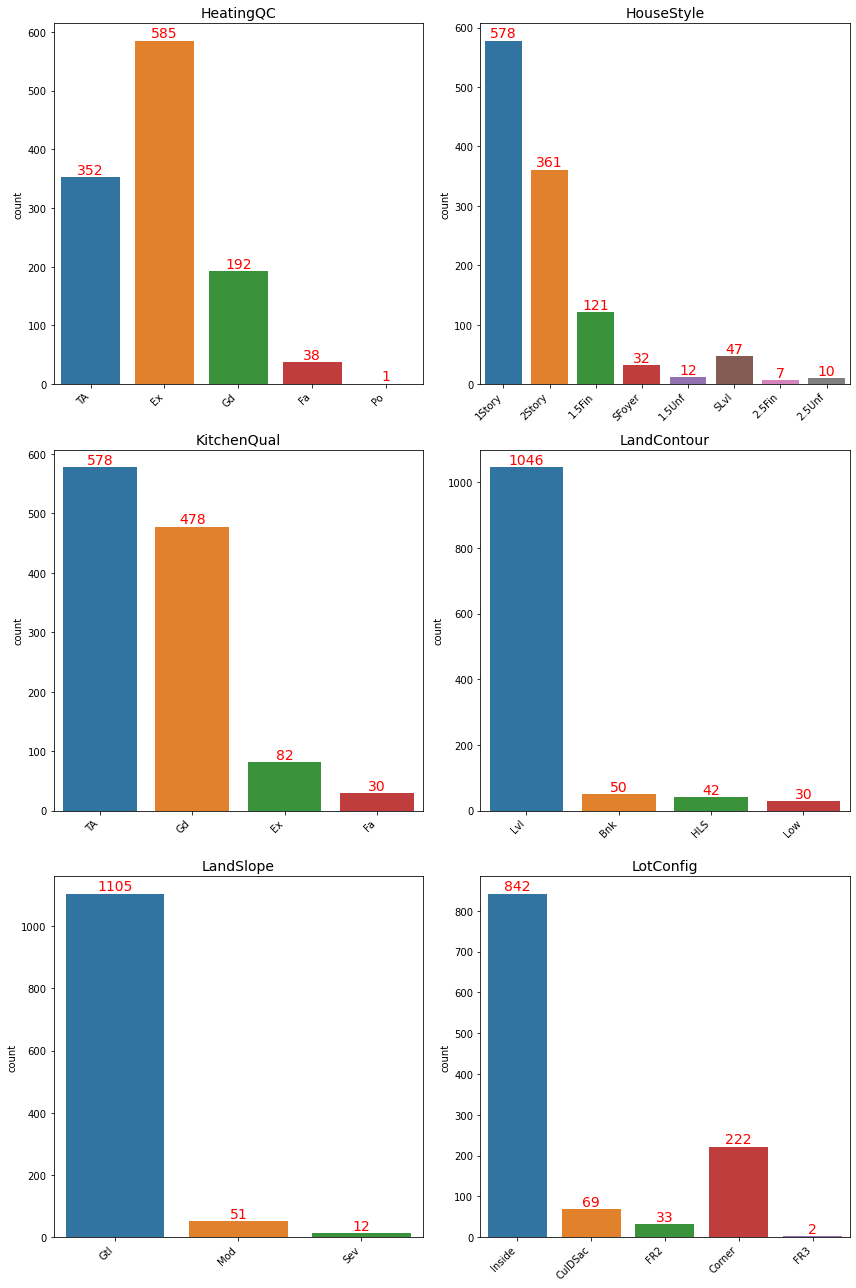

In [70]:
plt.figure(figsize=(12,18))
j=1
for i in cat[24:30]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* Majority of houses provide excellent heating quality, Good/Average Kitchen Quality.
* Majority of houses are one storey buldings.
* Majority of houses are built on flat/leveled properties with gentle slope.
* Majority of houses are located on inside lot.

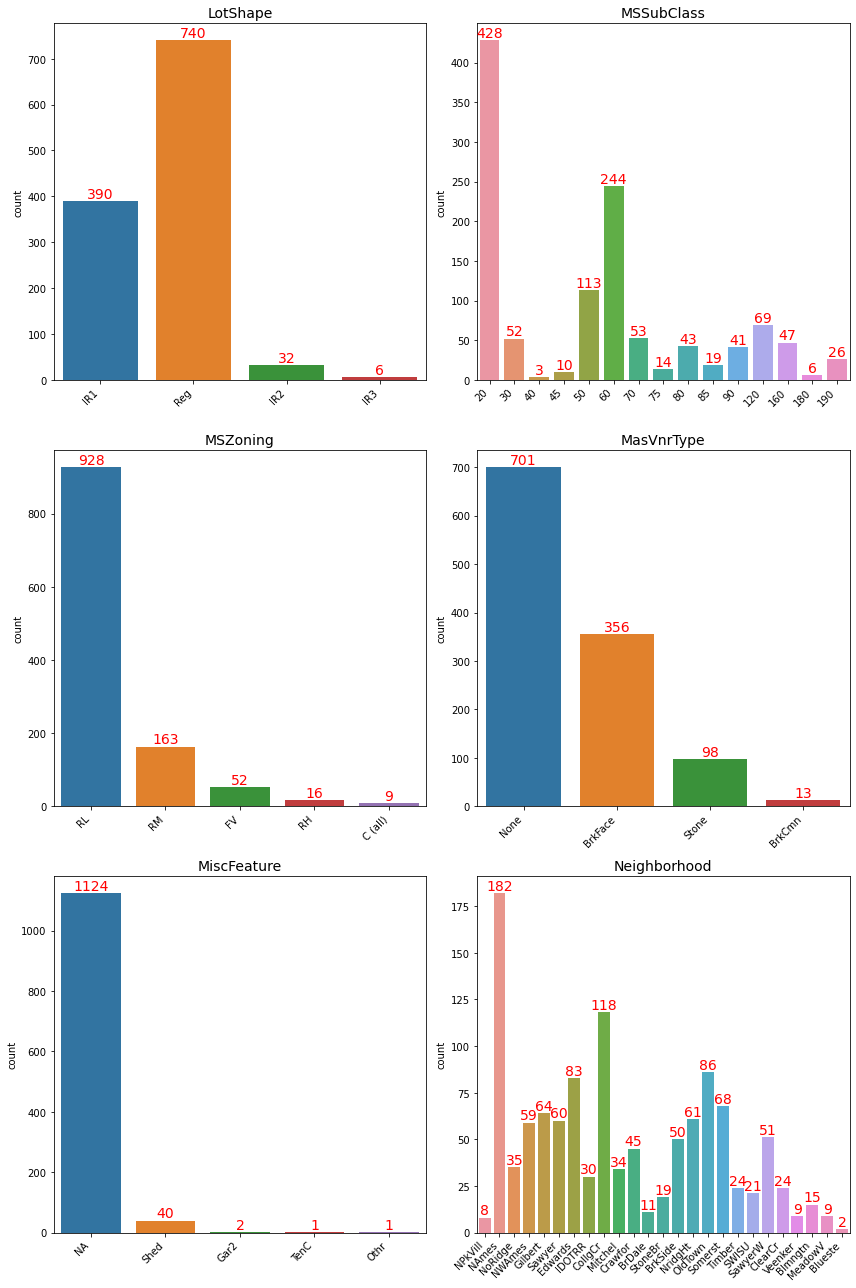

In [71]:
plt.figure(figsize=(12,18))
j=1
for i in cat[30:36]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* Majority of houses have a regular LotShape, are 1 storey built in 1946 and newer.
* Majority of houses are in a residential low density zone and have a brickface masonary veneer type.
* Majority of houses are in the neighborhood of North Ames.

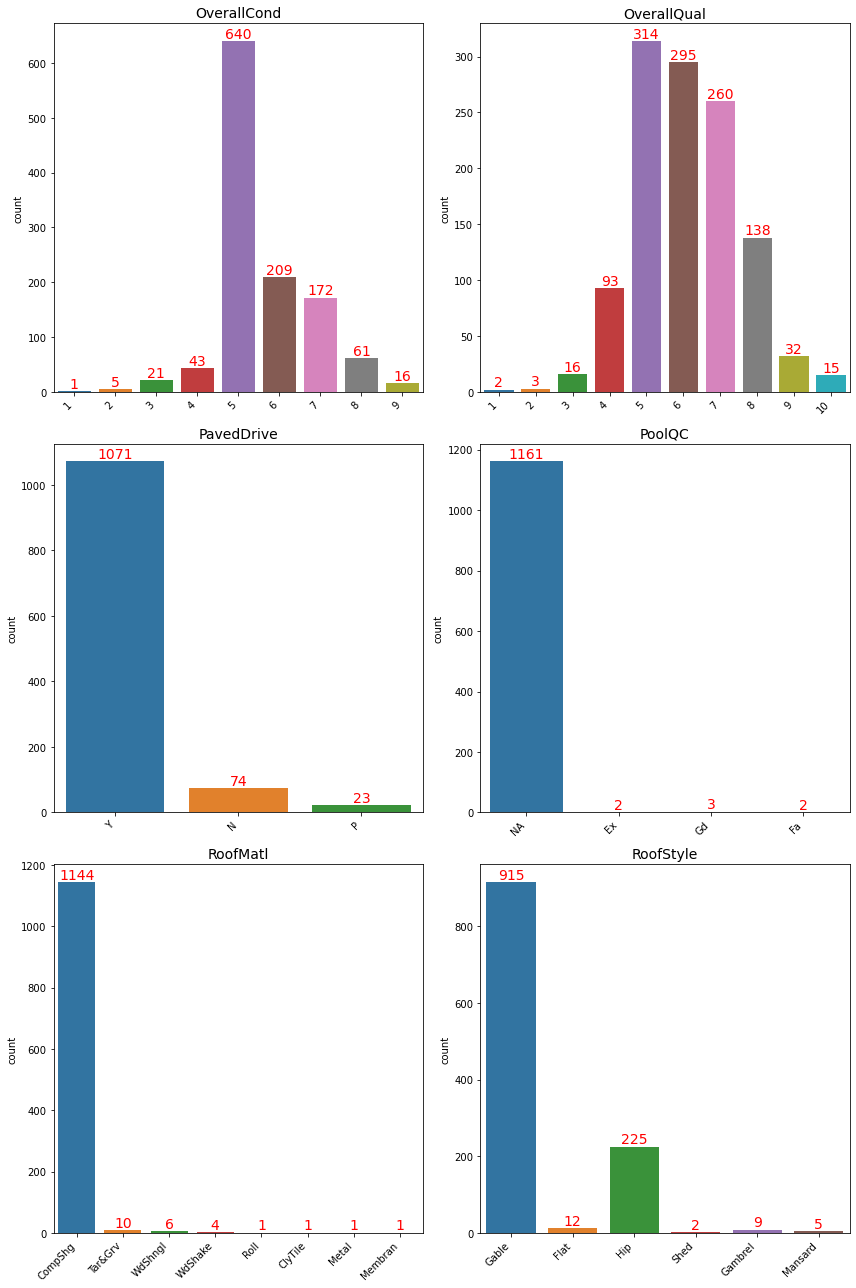

In [72]:
plt.figure(figsize=(12,18))
j=1
for i in cat[36:42]:
    plt.subplot(3,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* Majority of houses have an average rating for the overall condition, material and finish of the house.
* Majority of houses have a paved driveway, have Gable styled roof and use standard composite shingle as roof material.

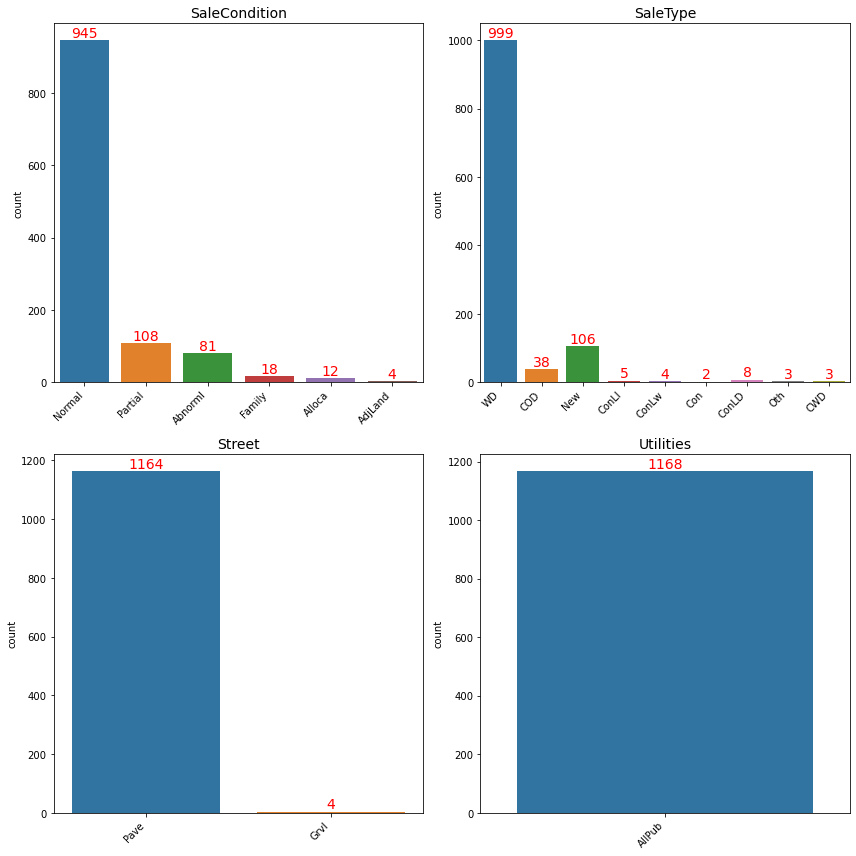

In [73]:
plt.figure(figsize=(12,12))
j=1
for i in cat[42:]:
    plt.subplot(2,2,j)
    j=j+1
    ax = sns.countplot(df_train[i])
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* Majority of houses were sold conventionally and under normal conditions.

### DELETING UNWANTED COLUMNS

In [74]:
def func(j):
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    df_grp_cat_saleprice = df_train[[j,'SalePrice']].groupby(j).mean().round(0)
    df_temp_count = pd.DataFrame(df_train[j].value_counts())
    ax = sns.scatterplot(x=j, y='SalePrice', data=df_train)
    plt.subplot(2,1,2)
    ax = sns.violinplot(x=j, y='SalePrice', data=df_train)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    print(pd.merge(df_grp_cat_saleprice, df_temp_count, how = 'inner', left_index = True, right_index = True).sort_values(by=['SalePrice'],ascending=False))

In [75]:
def func1(j):
    plt.figure(figsize=(12,6))
    ax = sns.regplot(x=j, y='SalePrice', data=df_train)
    print(df_train[[j,'SalePrice']].corr().loc[[j],['SalePrice']])
    plt.tight_layout()

#### Alley

      SalePrice  Alley
NA     184016.0   1091
Pave   168265.0     36
Grvl   125511.0     41


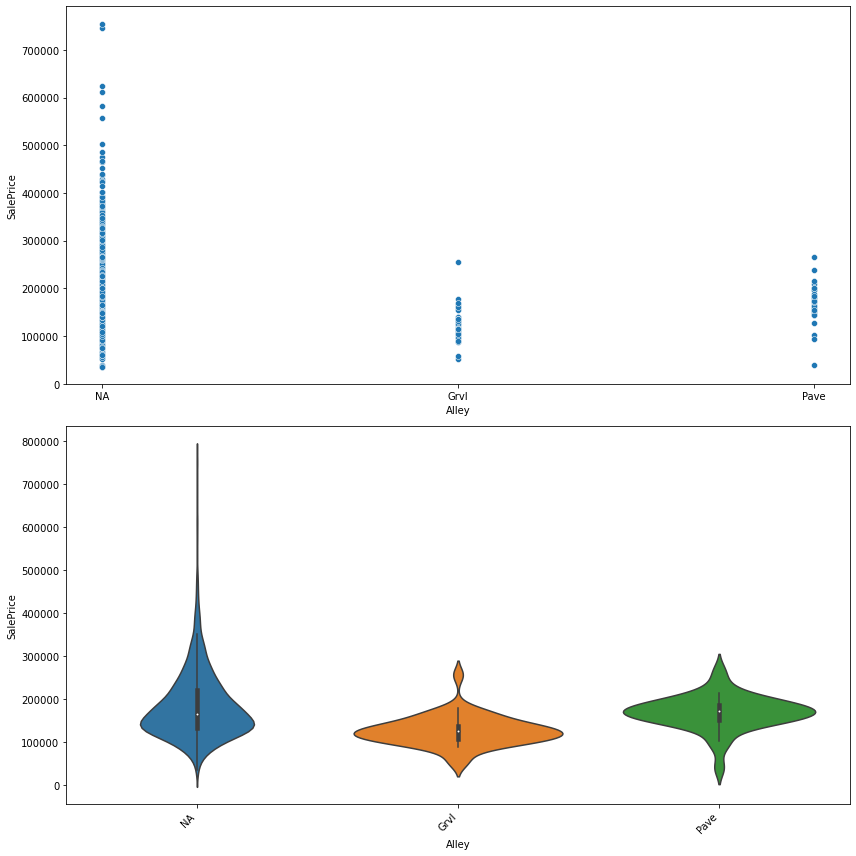

In [76]:
func('Alley')

* We can Delete the column alley as the prices of houses do not vary significantly based on Alley type and more than 90% houses do not contain no alley access.

#### BsmtFinType2

     SalePrice  BsmtFinType2
GLQ   194938.0            12
ALQ   194712.0            16
Unf   185077.0          1002
LwQ   168846.0            40
Rec   164477.0            43
BLQ   154816.0            24
NA    113578.0            31


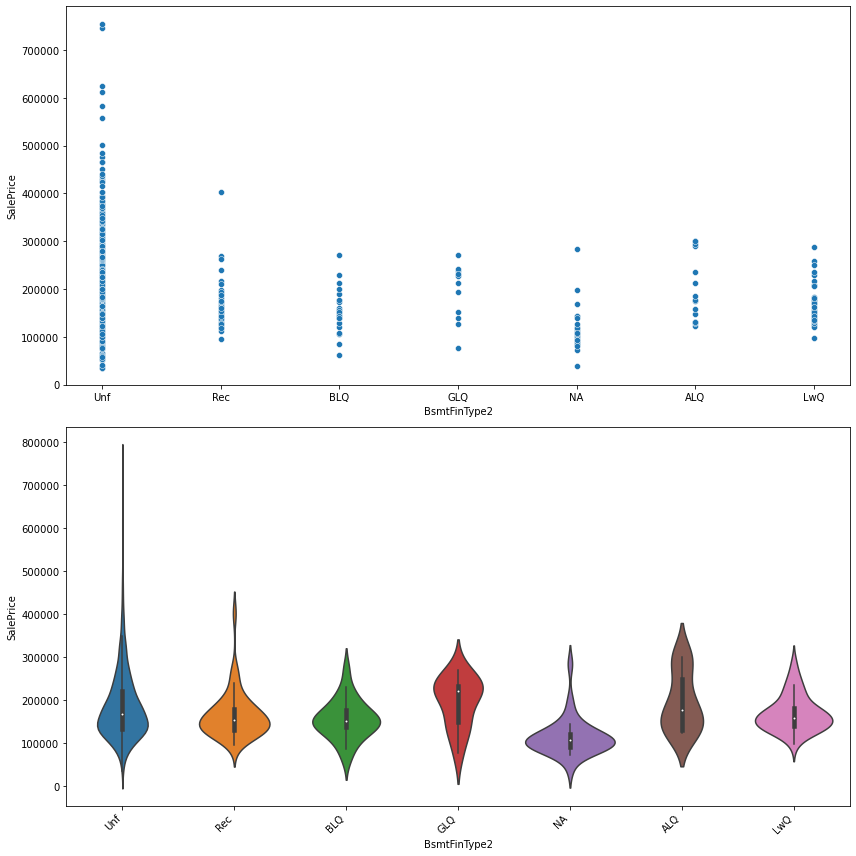

In [77]:
func('BsmtFinType2')

* There is  a slight increase in housing price if the basement finish area is of good or average quality but no significant difference in between them. Also more than 85% of these basements are unfinished(Meaning there are not multiple types in those houses), hence we drop this column 

#### Condition2

        SalePrice  Condition2
PosA     325000.0           1
PosN     284875.0           2
RRAe     190000.0           1
Norm     181697.0        1154
RRAn     136905.0           1
RRNn     125000.0           1
Feedr    121167.0           6
Artery   106500.0           2


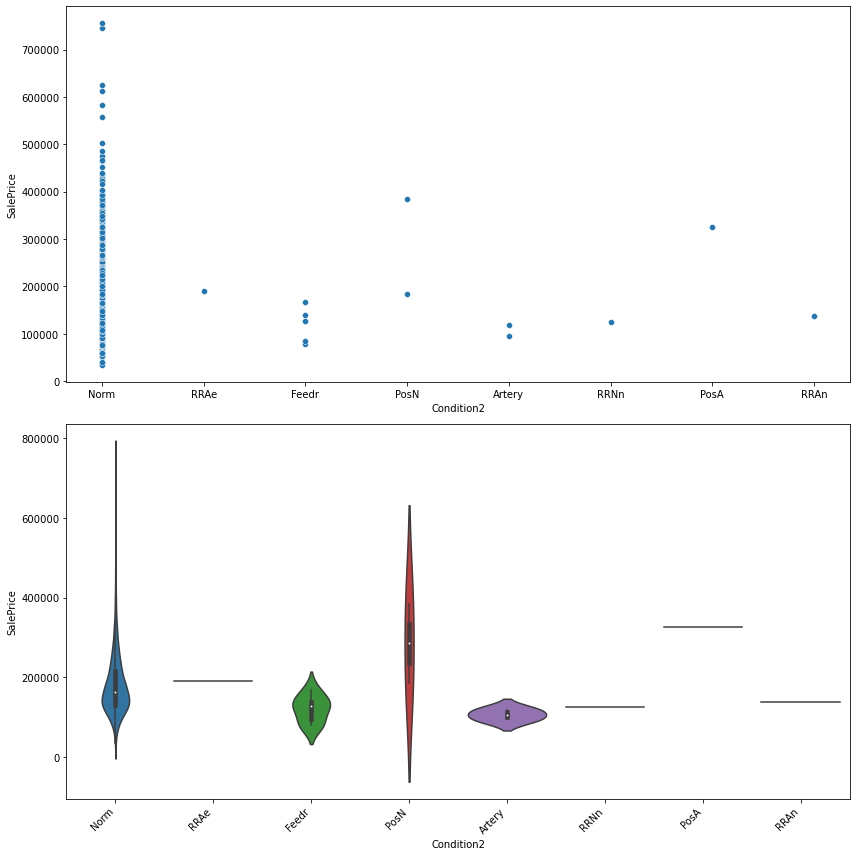

In [78]:
func('Condition2')

* More than 98% of houses have normal conditions and hence the column can be deleted.

#### MiscFeature

      SalePrice  MiscFeature
TenC   250000.0            1
NA     182542.0         1124
Gar2   170750.0            2
Shed   151599.0           40
Othr   133000.0            1


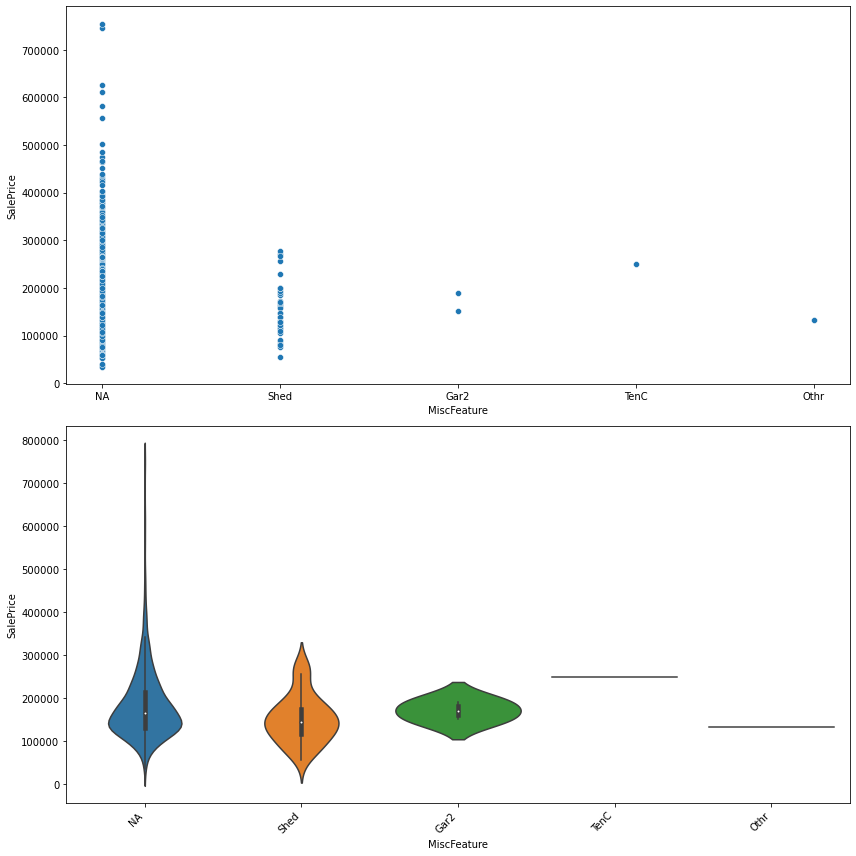

In [79]:
func('MiscFeature')

* Only one house contains a tennis court where there is a significant increase in price.
* More than 90% of the houses do not contain any Miscellaneous facilities and hence this column can be deleted.

#### Street

      SalePrice  Street
Pave   181684.0    1164
Grvl   121111.0       4


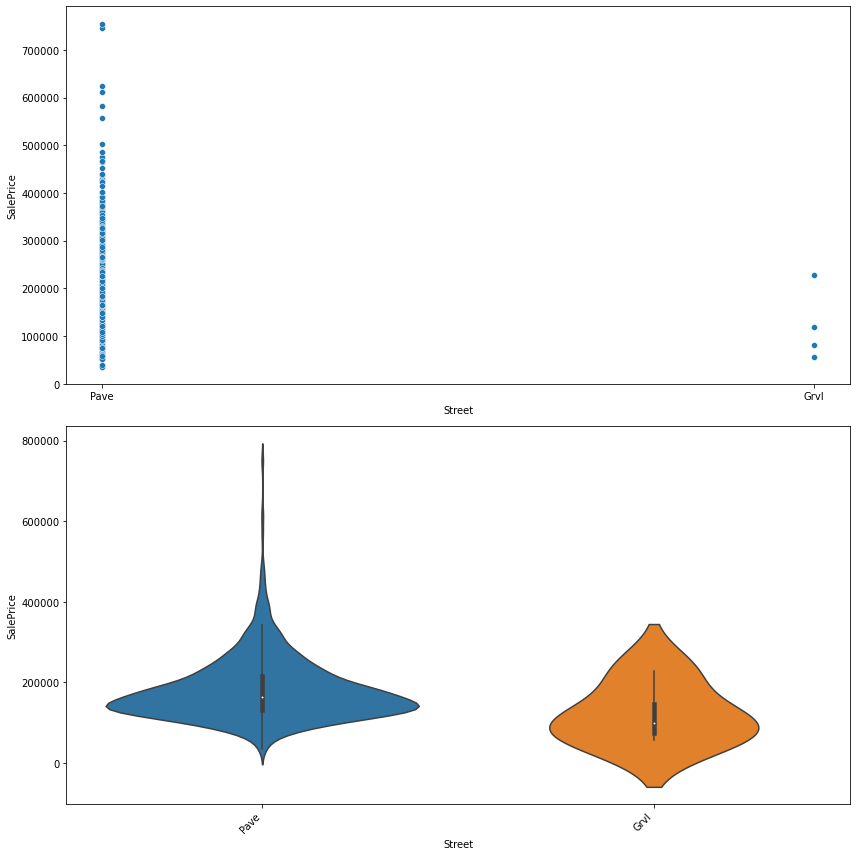

In [80]:
func('Street')

* More than 99% of the houses have paved streets and hence this column can be deleted.

#### Utilities

           SalePrice  Utilities
Utilities                      
AllPub      181477.0       1168


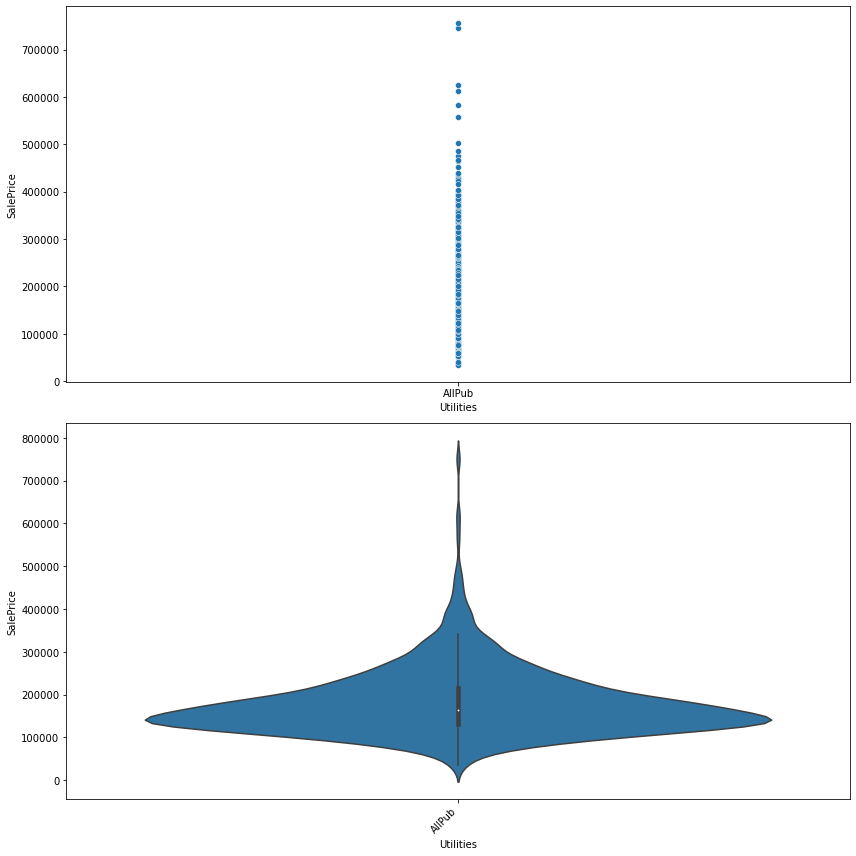

In [81]:
func('Utilities')

* The Column contains a single value and hence can be removed.

#### BsmtFinSF2

            SalePrice
BsmtFinSF2  -0.010151


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL         48.0     4928   Pave    NA      IR1   
2      793          60       RL         92.0     9920   Pave    NA      IR1   
3      110          20       RL        105.0    11751   Pave    NA      IR1   
4      422          20       RL         79.0    16635   Pave    NA      IR1   
5     1197          60       RL         58.0    14054   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1163   289          20       RL         79.0     9819   Pave    NA      IR1   
1164   554          20       RL         67.0     8777   Pave    NA      Reg   
1165   196         160       RL         24.0     2280   Pave    NA      Reg   
1166    31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167   617          60       RL         84.0     7861   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
5          Norm     1Fam     2Story            7            5       2006   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
5             2006     Gable  CompShg     VinylSd     VinylSd       None   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4          126.0        Gd        TA     CBlock       Gd       TA   

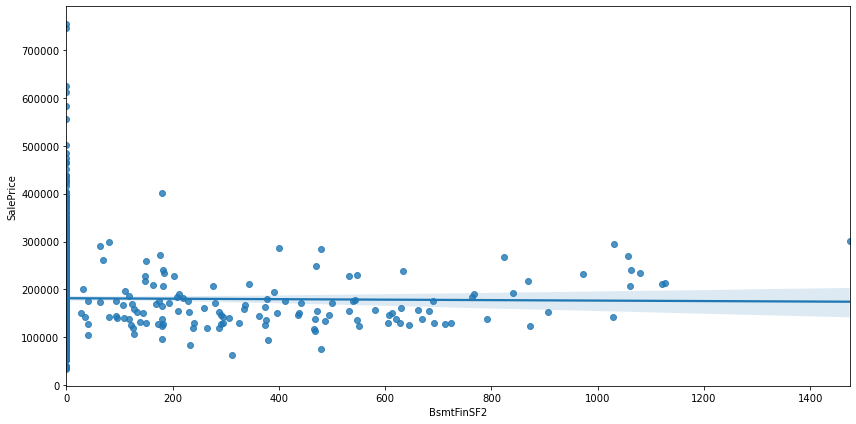

In [82]:
func1('BsmtFinSF2')
df_train[df_train['BsmtFinSF2']==0]

* The column 'BsmtFinSF2' and 'SalePrice' have very weak correlation and also more than 85% of the values in the column are 0, therefore we can delete the column

#### BsmtFullBath

              SalePrice  BsmtFullBath
BsmtFullBath                         
2              205919.0            13
1              202043.0           468
3              179000.0             1
0              166987.0           686
----------------------------------------------------------------------------------------------------
              SalePrice
BsmtFullBath   0.212924


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL         48.0     4928   Pave    NA      IR1   
3      110          20       RL        105.0    11751   Pave    NA      IR1   
4      422          20       RL         79.0    16635   Pave    NA      IR1   
5     1197          60       RL         58.0    14054   Pave    NA      IR1   
9      576          50       RL         80.0     8480   Pave    NA      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1161  1301          60       RL         84.0    10762   Pave    NA      IR1   
1163   289          20       RL         79.0     9819   Pave    NA      IR1   
1164   554          20       RL         67.0     8777   Pave    NA      Reg   
1165   196         160       RL         24.0     2280   Pave    NA      Reg   
1166    31          70  C (all)         50.0     8500   Pave  Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
9            Lvl    AllPub    Inside       Gtl        NAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1161         Lvl    AllPub   CulDSac       Gtl      Gilbert       Norm   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
5          Norm     1Fam     2Story            7            5       2006   
9          Norm     1Fam     1.5Fin            5            5       1947   
...         ...      ...        ...          ...          ...        ...   
1161       Norm     1Fam     2Story            7            5       1999   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
5             2006     Gable  CompShg     VinylSd     VinylSd       None   
9             1950     Gable  CompShg     MetalSd     MetalSd       None   
...            ...       ...      ...         ...         ...        ...   
1161          1999     Gable  CompShg     VinylSd     VinylSd       None   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4          126.0        Gd        TA     CBlock       Gd       TA   
5            0.0        Gd        TA      PConc       Gd       TA   

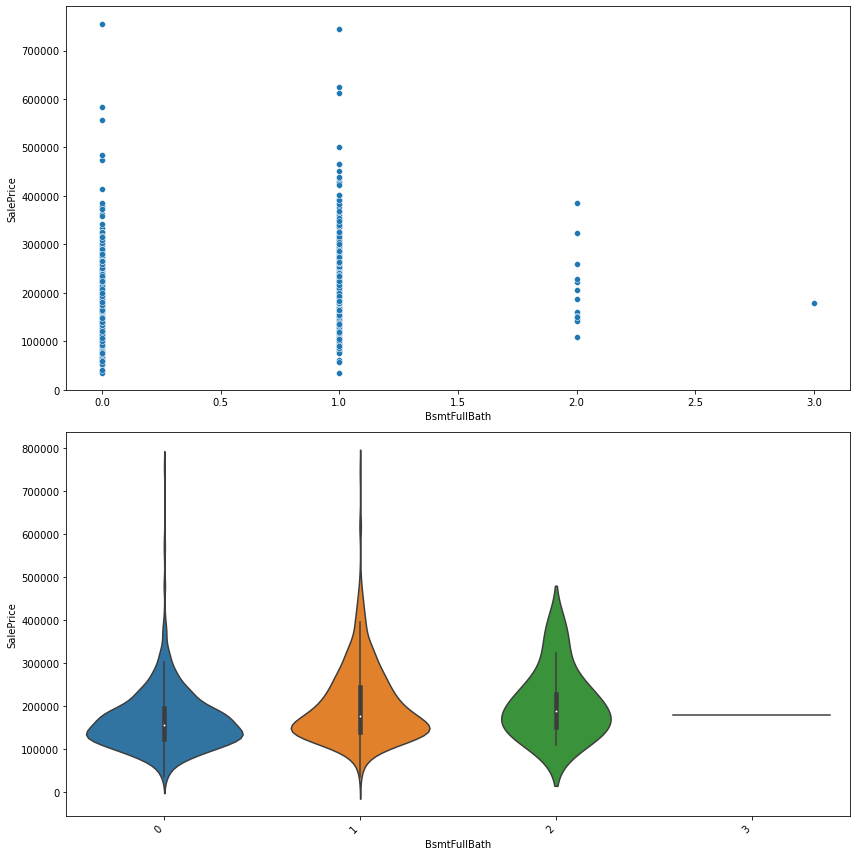

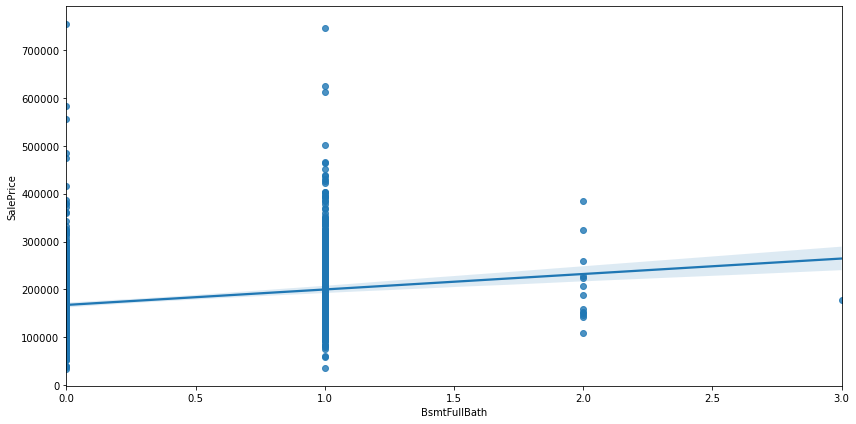

In [83]:
func('BsmtFullBath')
print('----------'*10)
func1('BsmtFullBath')
df_train[df_train['BsmtFullBath']==0]

* More than 55% of the column contains 0, but still the column has a slight positive correlation with the target variable and hence we can keep it.

#### BsmtHalfBath

              SalePrice  BsmtHalfBath
BsmtHalfBath                         
0              181659.0          1105
1              178850.0            61
2              160850.0             2
----------------------------------------------------------------------------------------------------
              SalePrice
BsmtHalfBath  -0.011109


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL         48.0     4928   Pave    NA      IR1   
1      889          20       RL         95.0    15865   Pave    NA      IR1   
2      793          60       RL         92.0     9920   Pave    NA      IR1   
3      110          20       RL        105.0    11751   Pave    NA      IR1   
5     1197          60       RL         58.0    14054   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1163   289          20       RL         79.0     9819   Pave    NA      IR1   
1164   554          20       RL         67.0     8777   Pave    NA      Reg   
1165   196         160       RL         24.0     2280   Pave    NA      Reg   
1166    31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167   617          60       RL         84.0     7861   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
5            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
5          Norm     1Fam     2Story            7            5       2006   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
5             2006     Gable  CompShg     VinylSd     VinylSd       None   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   

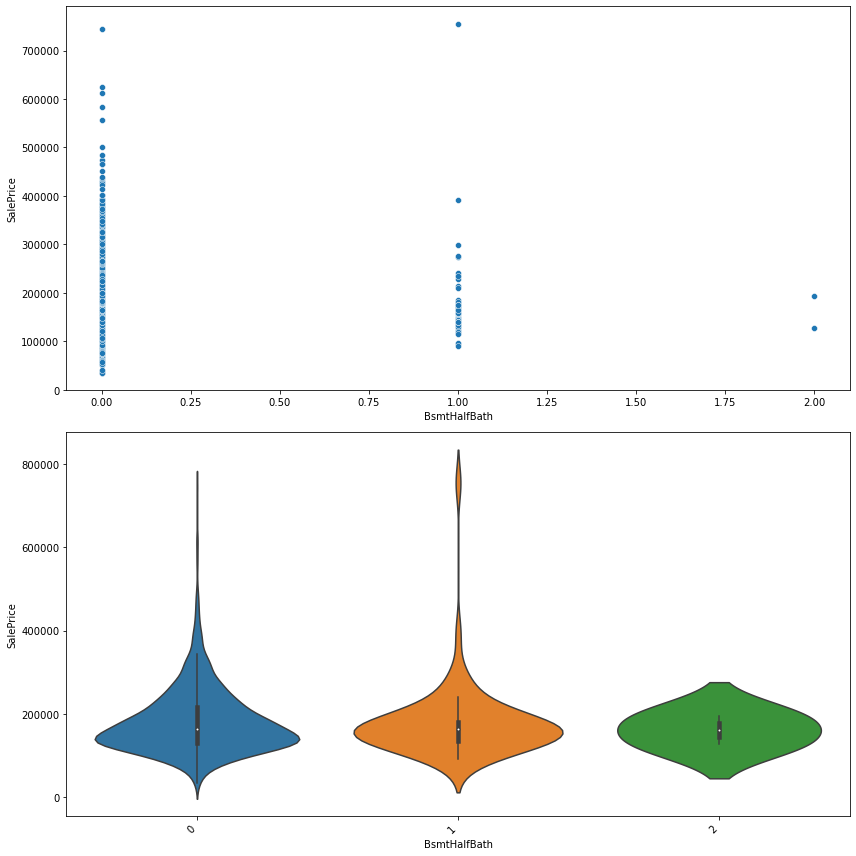

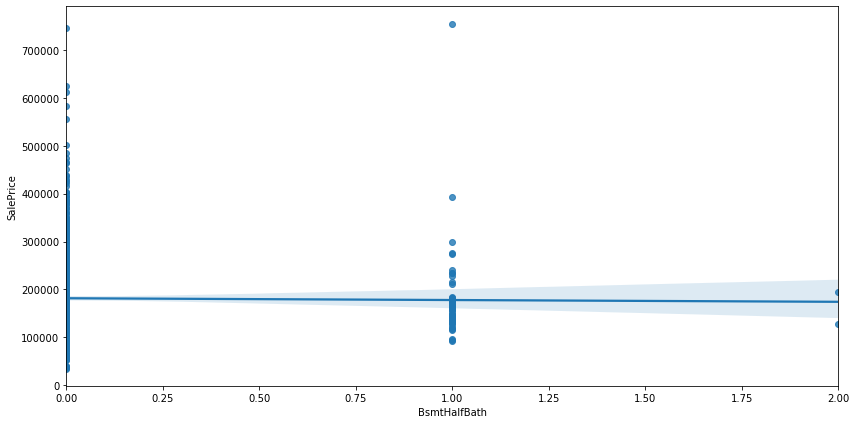

In [84]:
func('BsmtHalfBath')
print('----------'*10)
func1('BsmtHalfBath')
df_train[df_train['BsmtHalfBath']==0]

* The column 'BsmtHalfBath' is weakly correlated with the target variable and more than 90% of its values are 0. Hence, we can delete this column.

#### HalfBath

          SalePrice  HalfBath
HalfBath                     
1          214176.0       434
0          162161.0       724
2          160835.0        10
----------------------------------------------------------------------------------------------------
          SalePrice
HalfBath   0.295592


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL         48.0     4928   Pave    NA      IR1   
1      889          20       RL         95.0    15865   Pave    NA      IR1   
3      110          20       RL        105.0    11751   Pave    NA      IR1   
4      422          20       RL         79.0    16635   Pave    NA      IR1   
7     1041          20       RL         88.0    13125   Pave    NA      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1160   551         120       RL         53.0     4043   Pave    NA      Reg   
1162  1381          30       RL         45.0     8212   Pave  Grvl      Reg   
1163   289          20       RL         79.0     9819   Pave    NA      IR1   
1164   554          20       RL         67.0     8777   Pave    NA      Reg   
1166    31          70  C (all)         50.0     8500   Pave  Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
7            Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
...          ...       ...       ...       ...          ...        ...   
1160         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1162         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
7          Norm     1Fam     1Story            5            4       1957   
...         ...      ...        ...          ...          ...        ...   
1160       Norm   TwnhsE     1Story            6            6       1977   
1162       Norm     1Fam     1Story            3            3       1914   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1166       Norm     1Fam     2Story            4            4       1920   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
7             2000     Gable  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
...            ...       ...      ...         ...         ...        ...   
1160          1977     Gable  CompShg     Plywood     Plywood       None   
1162          1950     Gable  CompShg      Stucco      Stucco       None   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
3          480.0        TA        TA     CBlock       Gd       TA   
4          126.0        Gd        TA     CBlock       Gd       TA   

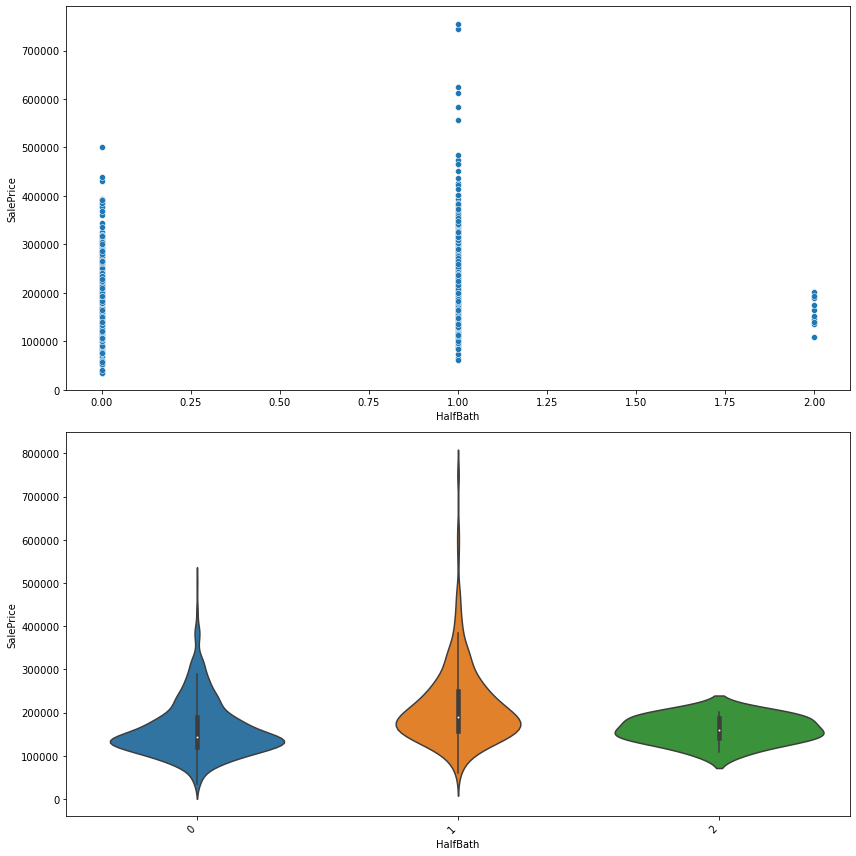

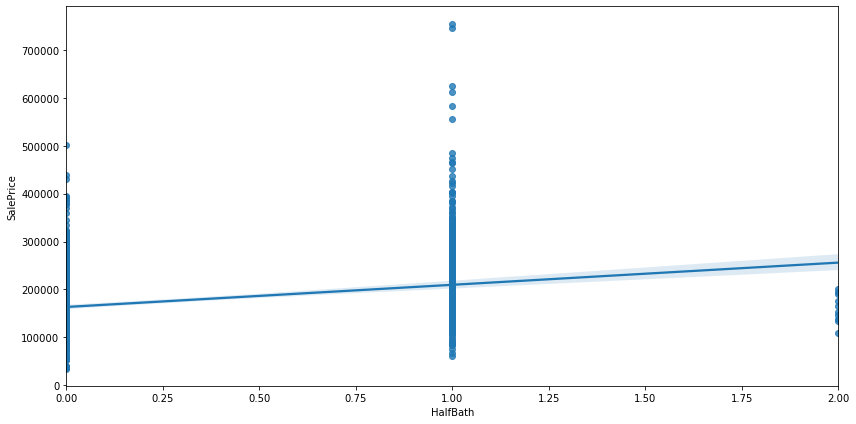

In [85]:
func('HalfBath')
print('----------'*10)
func1('HalfBath')
df_train[df_train['HalfBath']==0]

* More than 60% of the column contains 0, but still the column has a positive correlation with the target variable and hence we can keep it.

#### MiscVal

       SalePrice  MiscVal
2500    266500.0        1
1150    256000.0        1
2000    202450.0        4
350     200000.0        1
8300    190000.0        1
700     185817.0        3
480     185000.0        1
0       182438.0     1126
500     165414.0        7
1400    163000.0        1
1300    160000.0        1
15500   151500.0        1
400     143585.0       10
1200    122750.0        2
600     116467.0        3
800     110000.0        1
620      88000.0        1
560      81000.0        1
450      76500.0        1
54       55993.0        1
----------------------------------------------------------------------------------------------------
         SalePrice
MiscVal  -0.013071


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL         48.0     4928   Pave    NA      IR1   
1     889          20       RL         95.0    15865   Pave    NA      IR1   
2     793          60       RL         92.0     9920   Pave    NA      IR1   
3     110          20       RL        105.0    11751   Pave    NA      IR1   
4     422          20       RL         79.0    16635   Pave    NA      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL         79.0     9819   Pave    NA      IR1   
1164  554          20       RL         67.0     8777   Pave    NA      Reg   
1165  196         160       RL         24.0     2280   Pave    NA      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL         84.0     7861   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

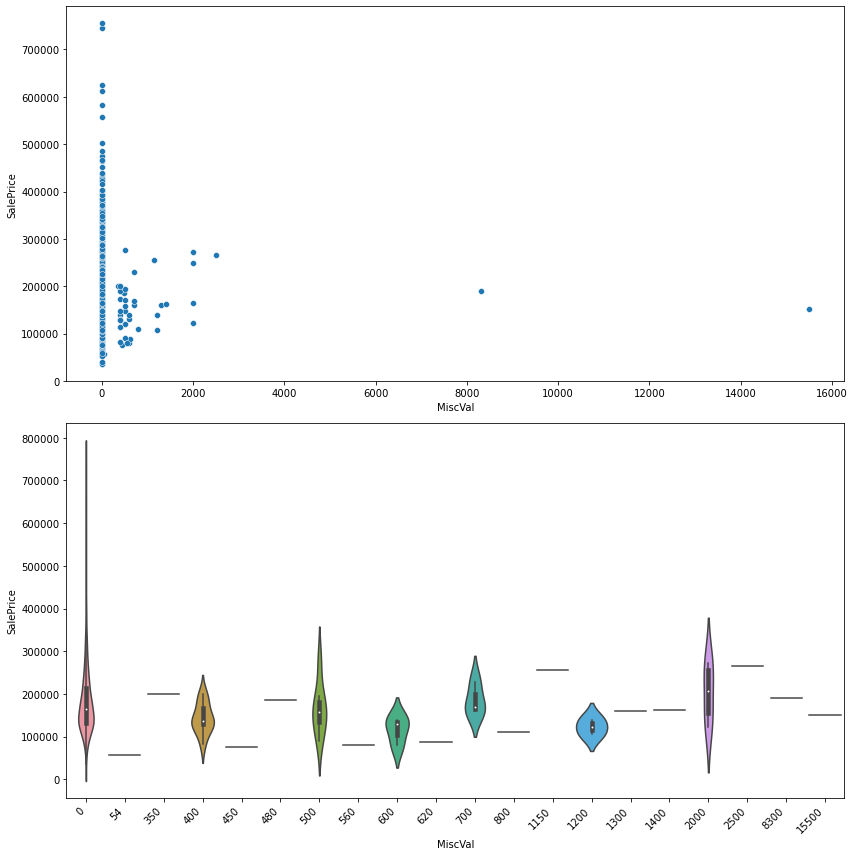

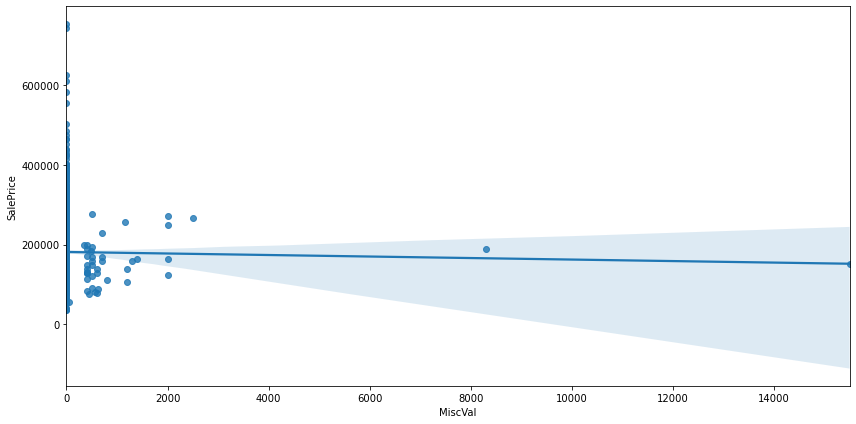

In [86]:
func('MiscVal')
print('----------'*10)
func1('MiscVal')
df_train[df_train['MiscVal']==0]

* The column 'MiscVal' is very weakly correlated with the target variable and more than 90% of its values are 0. Hence, we can delete this column.

#### PoolArea

     SalePrice  PoolArea
555   745000.0         1
738   274970.0         1
519   250000.0         1
512   235000.0         1
648   181000.0         1
0     180834.0      1161
576   171000.0         1
480   160000.0         1
----------------------------------------------------------------------------------------------------
          SalePrice
PoolArea    0.10328


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL         48.0     4928   Pave    NA      IR1   
1     889          20       RL         95.0    15865   Pave    NA      IR1   
2     793          60       RL         92.0     9920   Pave    NA      IR1   
3     110          20       RL        105.0    11751   Pave    NA      IR1   
4     422          20       RL         79.0    16635   Pave    NA      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL         79.0     9819   Pave    NA      IR1   
1164  554          20       RL         67.0     8777   Pave    NA      Reg   
1165  196         160       RL         24.0     2280   Pave    NA      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL         84.0     7861   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

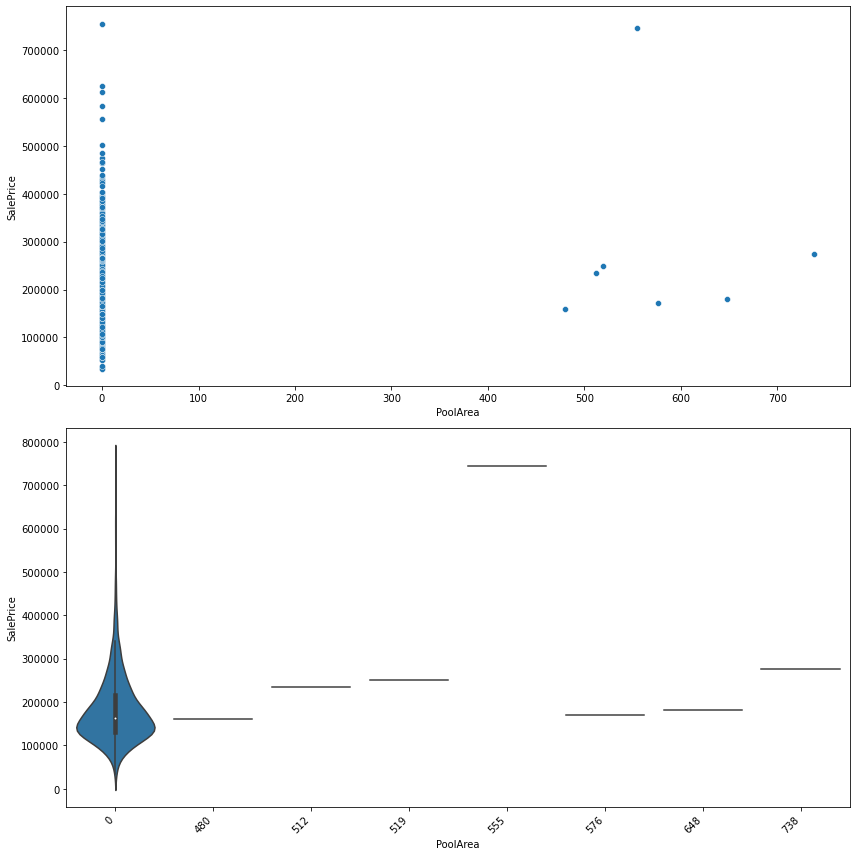

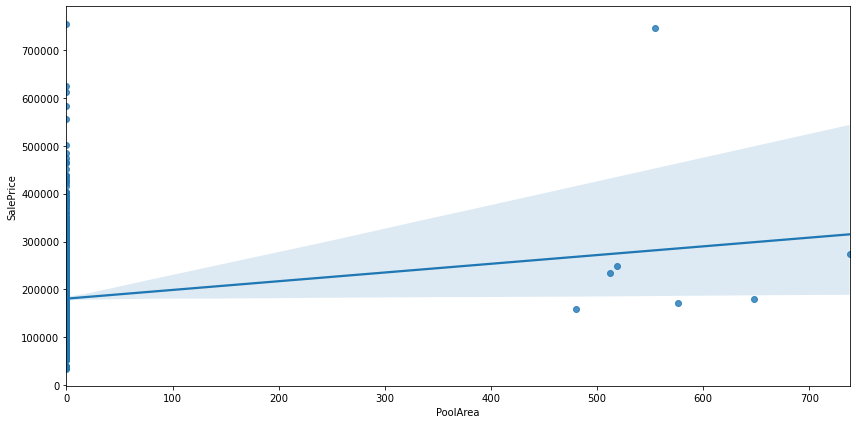

In [87]:
func('PoolArea')
print('----------'*10)
func1('PoolArea')
df_train[df_train['PoolArea']==0]

* The column 'PoolArea' is weakly correlated with the target variable and more than 99% of its values are 0. Hence, we can delete this column.

#### 3SsnPorch

     SalePrice  3SsnPorch
304   394617.0          1
153   392500.0          1
290   262500.0          1
168   238000.0          3
245   231500.0          1
196   228500.0          1
182   222000.0          1
144   211500.0          2
238   194500.0          1
216   184500.0          2
0     180862.0       1146
508   180500.0          1
130   180000.0          1
96    179900.0          1
23    169990.0          1
162   149500.0          1
140   135000.0          1
180   135000.0          2
----------------------------------------------------------------------------------------------------
           SalePrice
3SsnPorch   0.060119


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL         48.0     4928   Pave    NA      IR1   
1     889          20       RL         95.0    15865   Pave    NA      IR1   
2     793          60       RL         92.0     9920   Pave    NA      IR1   
3     110          20       RL        105.0    11751   Pave    NA      IR1   
4     422          20       RL         79.0    16635   Pave    NA      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL         79.0     9819   Pave    NA      IR1   
1164  554          20       RL         67.0     8777   Pave    NA      Reg   
1165  196         160       RL         24.0     2280   Pave    NA      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL         84.0     7861   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

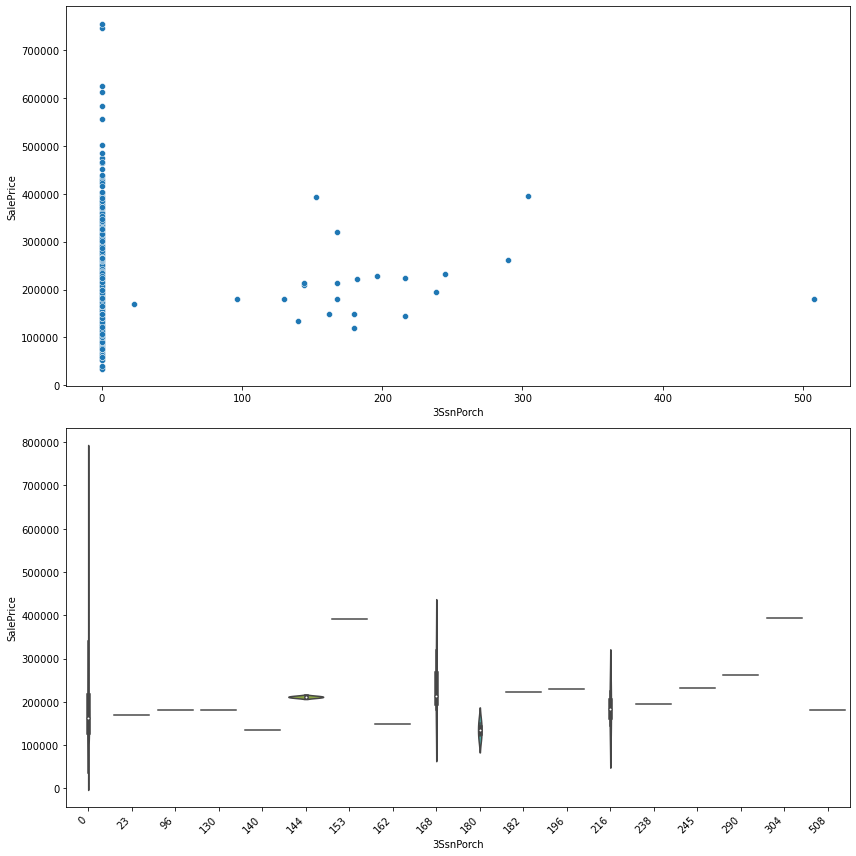

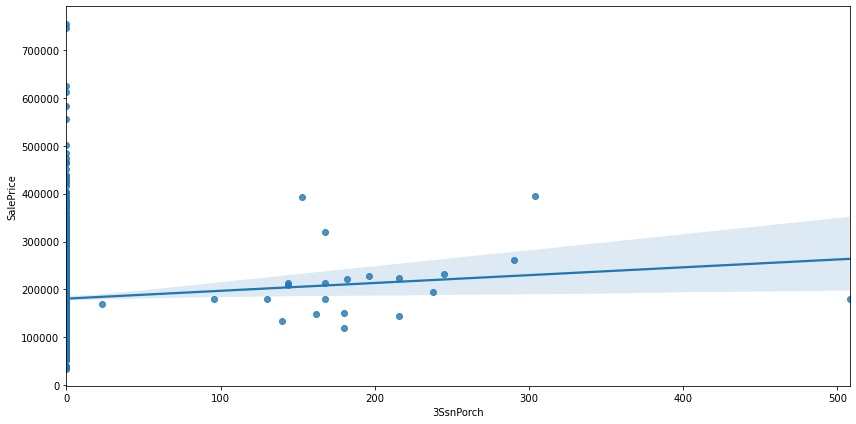

In [88]:
func('3SsnPorch')
print('----------'*10)
func1('3SsnPorch')
df_train[df_train['3SsnPorch']==0]

* The column '3SsnPorch' is very weakly correlated with the target variable and more than 98% of its values are 0. Hence, we can delete this column.

#### Heating

       SalePrice  Heating
GasA    182591.0     1143
GasW    167313.0       14
OthW    129500.0        1
Wall     92100.0        4
Floor    72500.0        1
Grav     70080.0        5


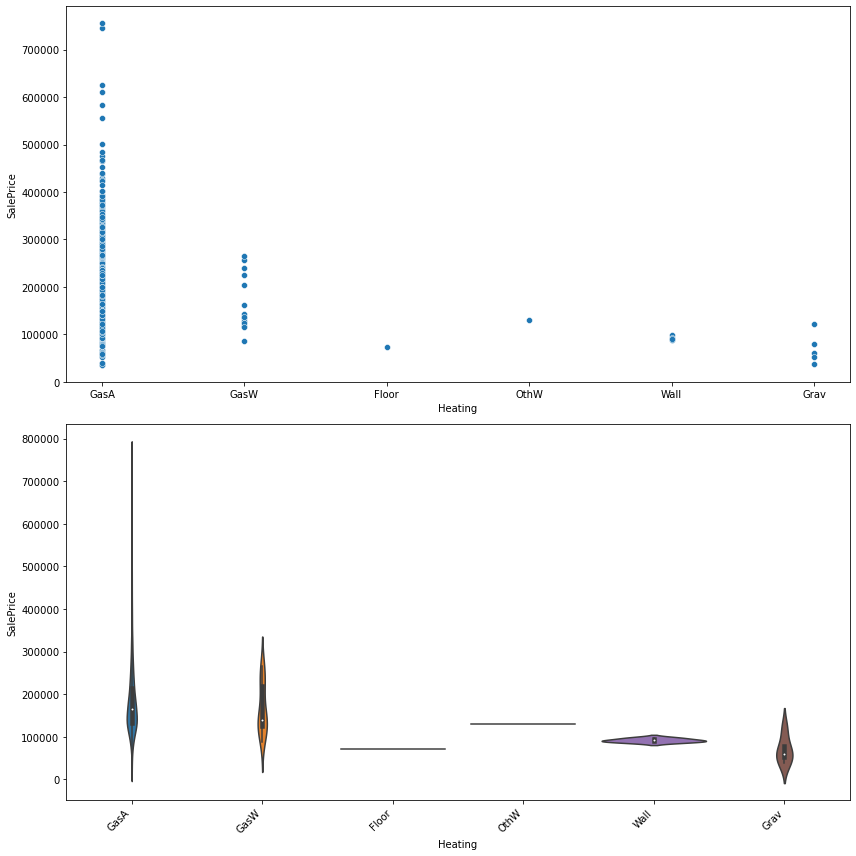

In [89]:
func('Heating')

* More than 95% of the values in the column are 'GasA', and there isn't a vast difference between categories and hrnce the column can be  deleted.

#### LandSlope

           SalePrice  LandSlope
LandSlope                      
Sev         190161.0         12
Mod         185353.0         51
Gtl         181204.0       1105


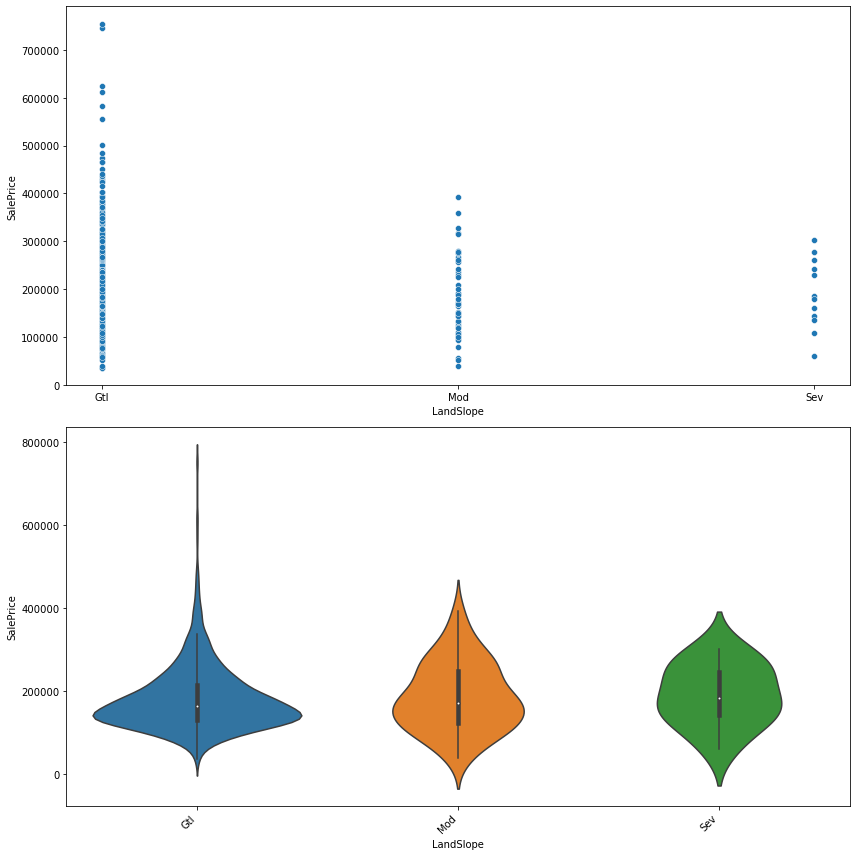

In [90]:
func('LandSlope')

* More than 94% of the values in the colmn'LandSlope' is 'Gtl' and there is no significant difference between the categories and hence it can be deleted.

#### Overallcond

   SalePrice  OverallCond
9   221444.0           16
5   203857.0          640
7   160519.0          172
8   160399.0           61
6   155388.0          209
2   141986.0            5
4   122653.0           43
3    97083.0           21
1    61000.0            1
----------------------------------------------------------------------------------------------------
             SalePrice
OverallCond  -0.065642


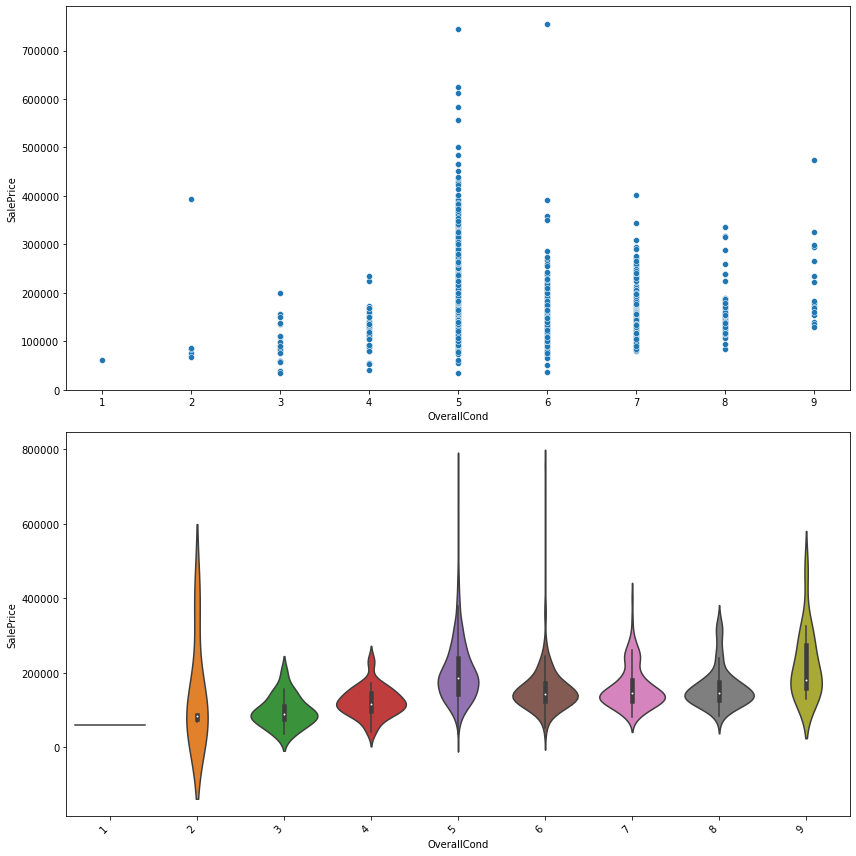

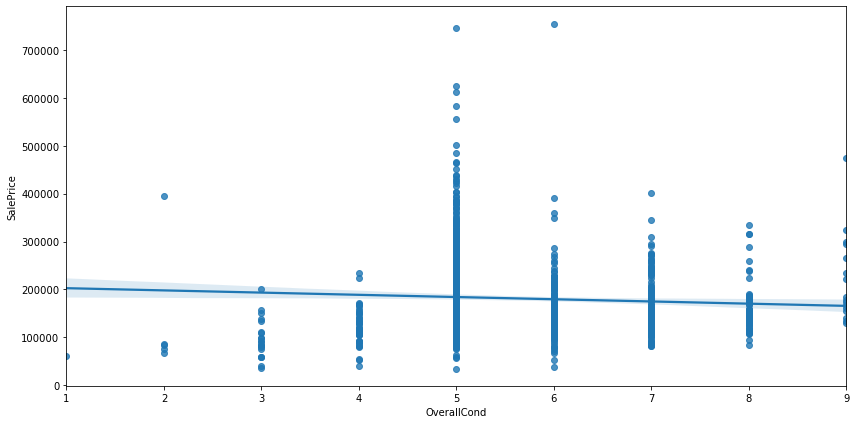

In [91]:
func('OverallCond')
print('----------'*10)
func1('OverallCond')

* The column 'OverallCond' is very weakly correlated with target variable and that higher rating does not necessarily mean higher prices defies logic and hence we can delete the column.

#### PoolQC

    SalePrice  PoolQC
Ex   490000.0       2
Fa   215500.0       2
Gd   201990.0       3
NA   180834.0    1161


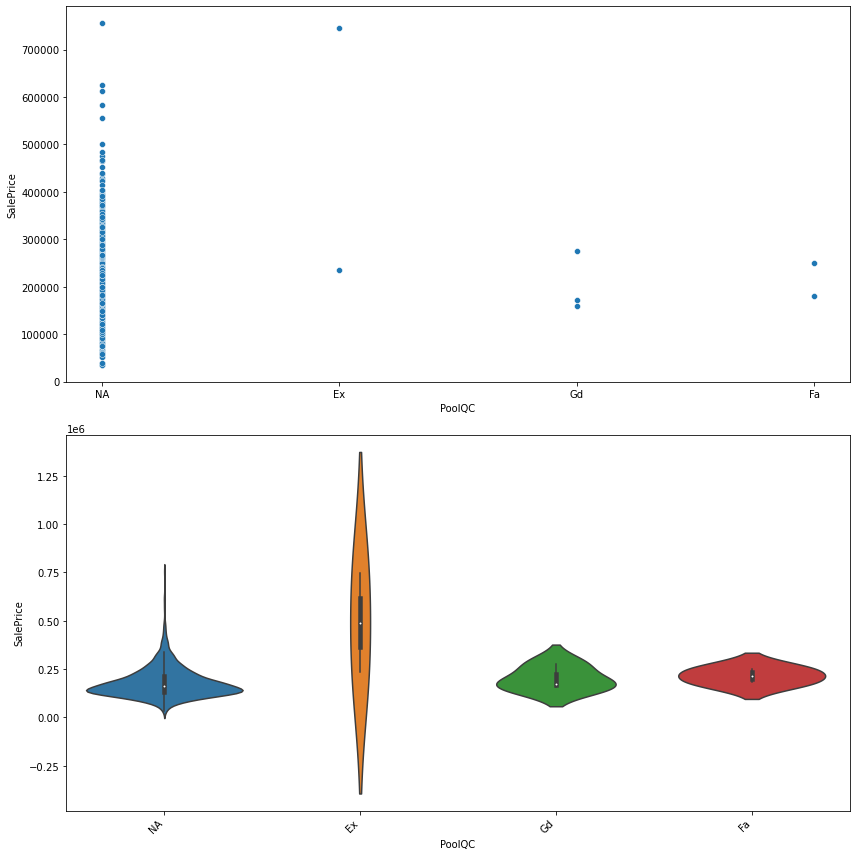

In [92]:
func('PoolQC')

* More than 98% houses do not have Swimming Pools so we can delete this column.

#### KitchenAbvGr

   SalePrice  KitchenAbvGr
1   183874.0          1114
2   132614.0            52
0   127500.0             1
3   106000.0             1
----------------------------------------------------------------------------------------------------
              SalePrice
KitchenAbvGr  -0.132108


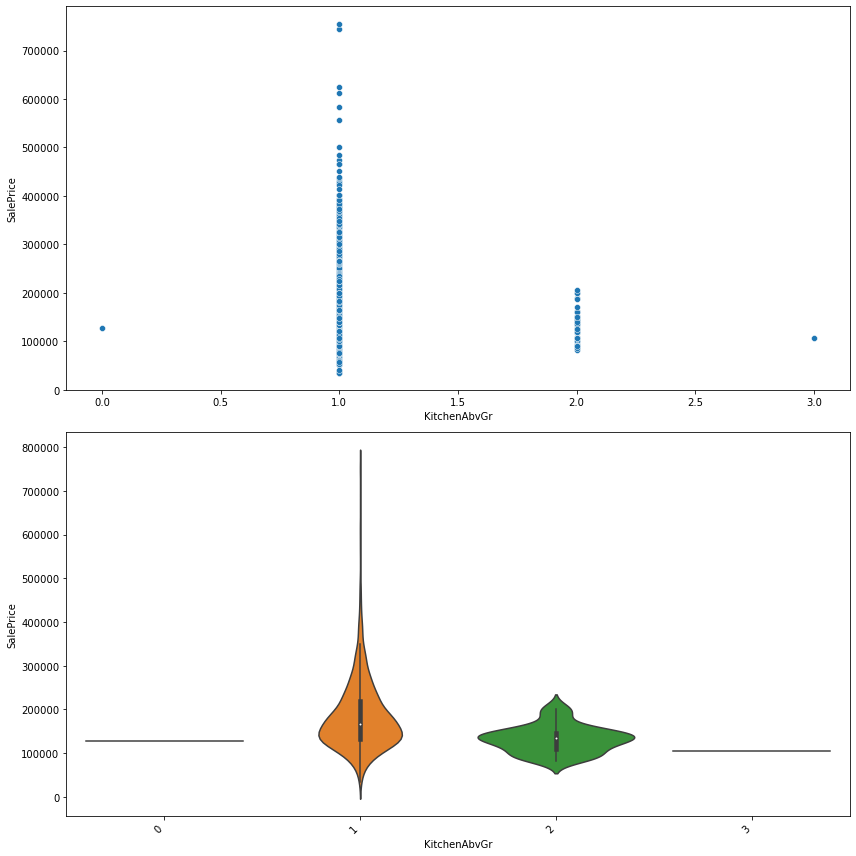

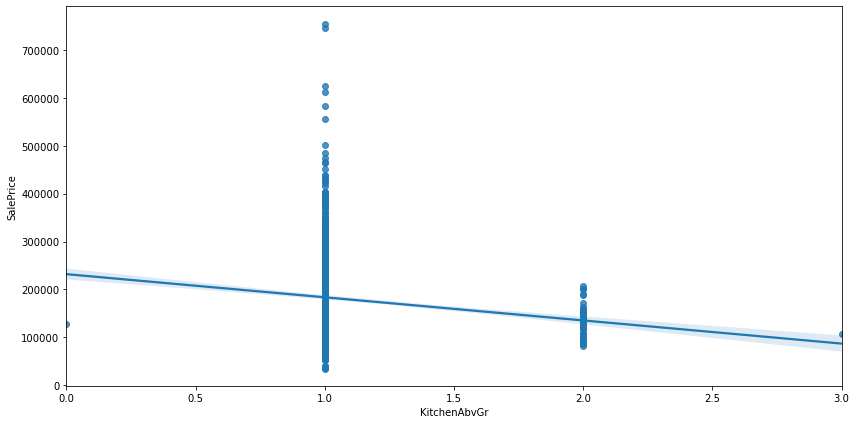

In [93]:
func('KitchenAbvGr')
print('----------'*10)
func1('KitchenAbvGr')

* The column has a weak correlation with the target varaible and more than 95% houses have only 1 kitchen, therefore this column can be deleted.

#### ScreenPorch

             SalePrice
ScreenPorch   0.100284


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL         48.0     4928   Pave    NA      IR1   
2      793          60       RL         92.0     9920   Pave    NA      IR1   
3      110          20       RL        105.0    11751   Pave    NA      IR1   
4      422          20       RL         79.0    16635   Pave    NA      IR1   
5     1197          60       RL         58.0    14054   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1163   289          20       RL         79.0     9819   Pave    NA      IR1   
1164   554          20       RL         67.0     8777   Pave    NA      Reg   
1165   196         160       RL         24.0     2280   Pave    NA      Reg   
1166    31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167   617          60       RL         84.0     7861   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
5          Norm     1Fam     2Story            7            5       2006   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
5             2006     Gable  CompShg     VinylSd     VinylSd       None   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4          126.0        Gd        TA     CBlock       Gd       TA   

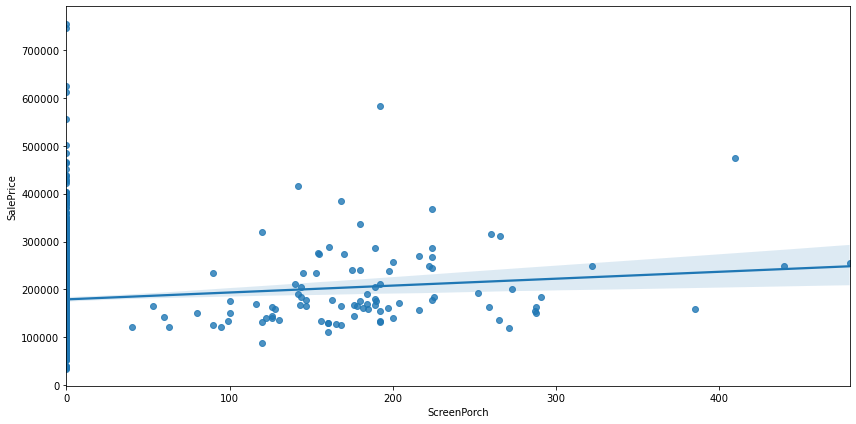

In [94]:
func1('ScreenPorch')
df_train[df_train['ScreenPorch']==0]

* The column 'ScreenPorch' has a weak correlation with the target variable and more than 90% of the values are 0. Hence the column can be deleted.

#### EnclosedPorch

               SalePrice
EnclosedPorch  -0.115004


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL         48.0     4928   Pave    NA      IR1   
1      889          20       RL         95.0    15865   Pave    NA      IR1   
2      793          60       RL         92.0     9920   Pave    NA      IR1   
3      110          20       RL        105.0    11751   Pave    NA      IR1   
4      422          20       RL         79.0    16635   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1161  1301          60       RL         84.0    10762   Pave    NA      IR1   
1163   289          20       RL         79.0     9819   Pave    NA      IR1   
1164   554          20       RL         67.0     8777   Pave    NA      Reg   
1165   196         160       RL         24.0     2280   Pave    NA      Reg   
1167   617          60       RL         84.0     7861   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1161         Lvl    AllPub   CulDSac       Gtl      Gilbert       Norm   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1161       Norm     1Fam     2Story            7            5       1999   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1161          1999     Gable  CompShg     VinylSd     VinylSd       None   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   

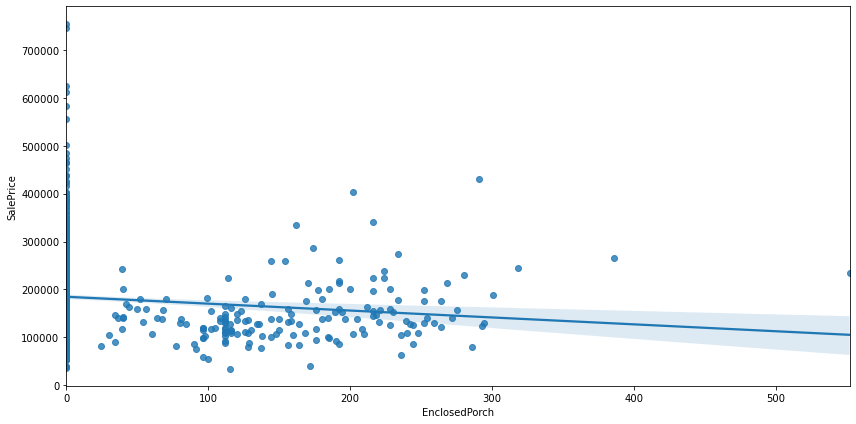

In [95]:
func1('EnclosedPorch')
df_train[df_train['EnclosedPorch']==0]

* More  than 85% values in the column are 0 and the column is also weakly correlated with the target variable so it can be deleted.

#### LowQualFinSF

              SalePrice
LowQualFinSF  -0.032381


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL         48.0     4928   Pave    NA      IR1   
1     889          20       RL         95.0    15865   Pave    NA      IR1   
2     793          60       RL         92.0     9920   Pave    NA      IR1   
3     110          20       RL        105.0    11751   Pave    NA      IR1   
4     422          20       RL         79.0    16635   Pave    NA      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL         79.0     9819   Pave    NA      IR1   
1164  554          20       RL         67.0     8777   Pave    NA      Reg   
1165  196         160       RL         24.0     2280   Pave    NA      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL         84.0     7861   Pave    NA      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

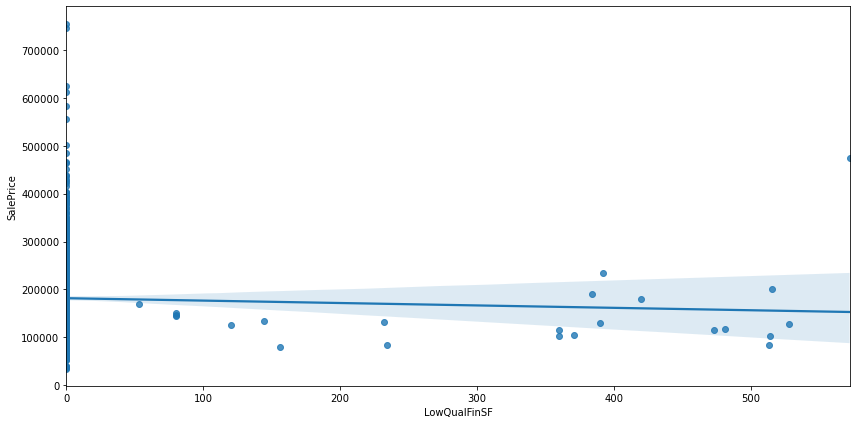

In [96]:
func1('LowQualFinSF')
df_train[df_train['LowQualFinSF']==0]

* More than 98% of the values in column 'LowQualFinSF' are 0s. IT also has a very weak correlation with the tarrget variable and hence it can be deleted.

In [97]:
rem = ['Id','Alley', 'BsmtFinType2', 'Condition2', 'MiscFeature', 'Street', 'Utilities', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'PoolArea', '3SsnPorch', 'Heating', 'OverallCond', 'LandSlope', 'PoolQC', 'KitchenAbvGr', 'ScreenPorch', 'EnclosedPorch', 'LowQualFinSF']

In [98]:
df_train.drop(rem,axis=1,inplace=True)
df_test.drop(rem,axis=1,inplace=True)

In [99]:
print(len(df_train.columns))
df_train.columns

60


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [100]:
print(len(df_test.columns))
df_test.columns

59


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

### FEATURE ENGINEERING

In [101]:
df_train['Remod'] = df_train.apply(lambda row: 'Y' if (row['YearRemodAdd']!=row['YearBuilt']) else 'N',axis=1)
df_test['Remod'] = df_test.apply(lambda row: 'Y' if (row['YearRemodAdd']!=row['YearBuilt']) else 'N',axis=1)

In [102]:
df_train['Remod'].value_counts()

N    598
Y    570
Name: Remod, dtype: int64

In [103]:
df_train['AgeOfHouse'] = df_train.apply(lambda row: row['YrSold']-row['YearBuilt'],axis=1)
df_test['AgeOfHouse'] = df_test.apply(lambda row: row['YrSold']-row['YearBuilt'],axis=1)

            SalePrice
AgeOfHouse  -0.515596


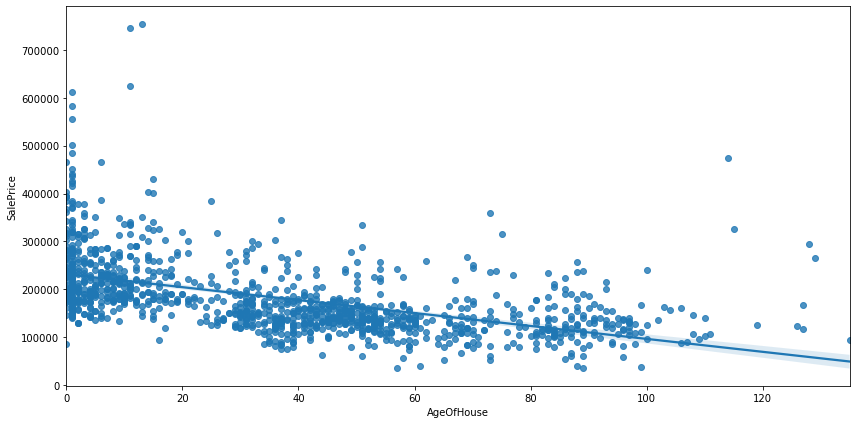

In [104]:
func1('AgeOfHouse')

In [105]:
df_train.drop(['YearBuilt','YrSold','MoSold','YearRemodAdd'],axis=1,inplace=True)
df_test.drop(['YearBuilt','YrSold','MoSold','YearRemodAdd'],axis=1,inplace=True)

In [106]:
print(len(df_train.columns))
df_train.columns

58


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'Fence', 'SaleType', 'SaleCondition',
       'SalePrice', 'Remod', 'AgeOfHouse'],
      dtype='object')

In [107]:
print(len(df_test.columns))
df_test.columns

57


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'Fence', 'SaleType', 'SaleCondition',
       'Remod', 'AgeOfHouse'],
      dtype='object')

In [108]:
rem.extend(['YearBuilt','YrSold','MoSold','YearRemodAdd'])
rem

['Id',
 'Alley',
 'BsmtFinType2',
 'Condition2',
 'MiscFeature',
 'Street',
 'Utilities',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'PoolArea',
 '3SsnPorch',
 'Heating',
 'OverallCond',
 'LandSlope',
 'PoolQC',
 'KitchenAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'LowQualFinSF',
 'YearBuilt',
 'YrSold',
 'MoSold',
 'YearRemodAdd']

In [109]:
for i in rem:
    if i in cont:
        cont.remove(i)
    elif i in cat:
        cat.remove(i)
cont.append('AgeOfHouse')
cont

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'AgeOfHouse']

In [110]:
cat

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LotConfig',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'OverallQual',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType']

### OUTLIER REMOVAL

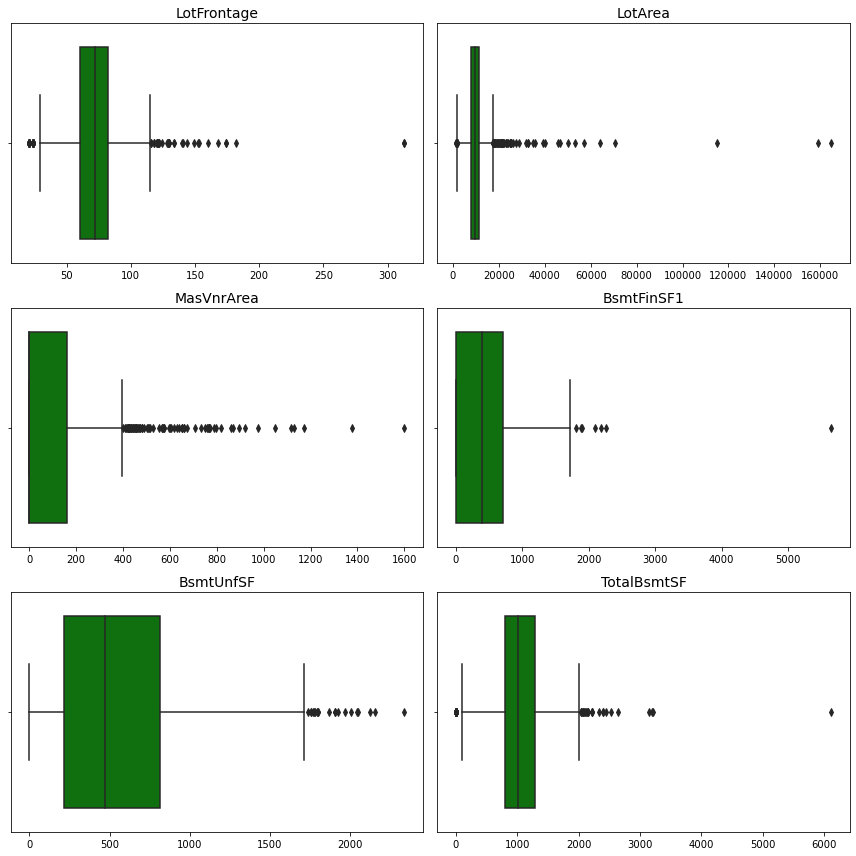

In [111]:
plt.figure(figsize=(12,12))
j=1
for i in cont[:6]:
    plt.subplot(3,2,j)
    j+=1
    ax = sns.boxplot(df_train[i], color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Columns 'LotArea', 'MasVnrArea', 'BsmtFinSF1' and 'BsmtUnfSF' contain higher outliers.
* Columns 'LotFrontage' and 'TotalBsmtSF' contain both higher and lower outliers.

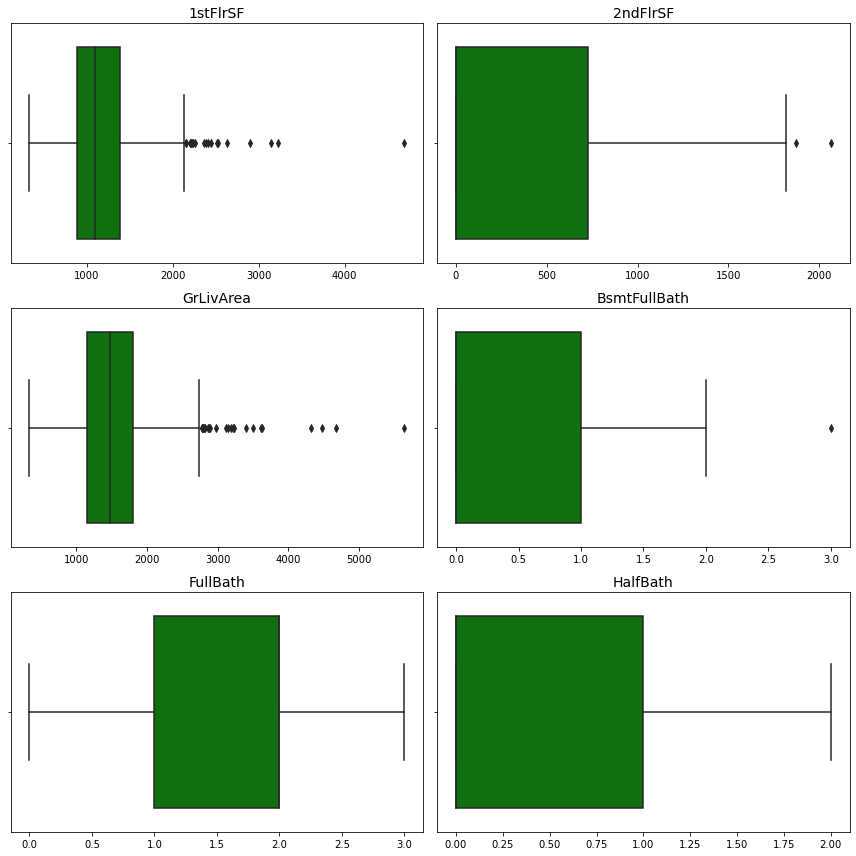

In [112]:
plt.figure(figsize=(12,12))
j=1
for i in cont[6:12]:
    plt.subplot(3,2,j)
    j+=1
    ax = sns.boxplot(df_train[i], color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Columns '1stFlrSF' and 'GrLivArea'contain lot of higher outliers.
* Columns 'FullBath' and 'HalfBath' do not contain any outliers.
* Columns '2ndFlrSF' and 'BsmtFullBath' contain very litttle higher outliers.

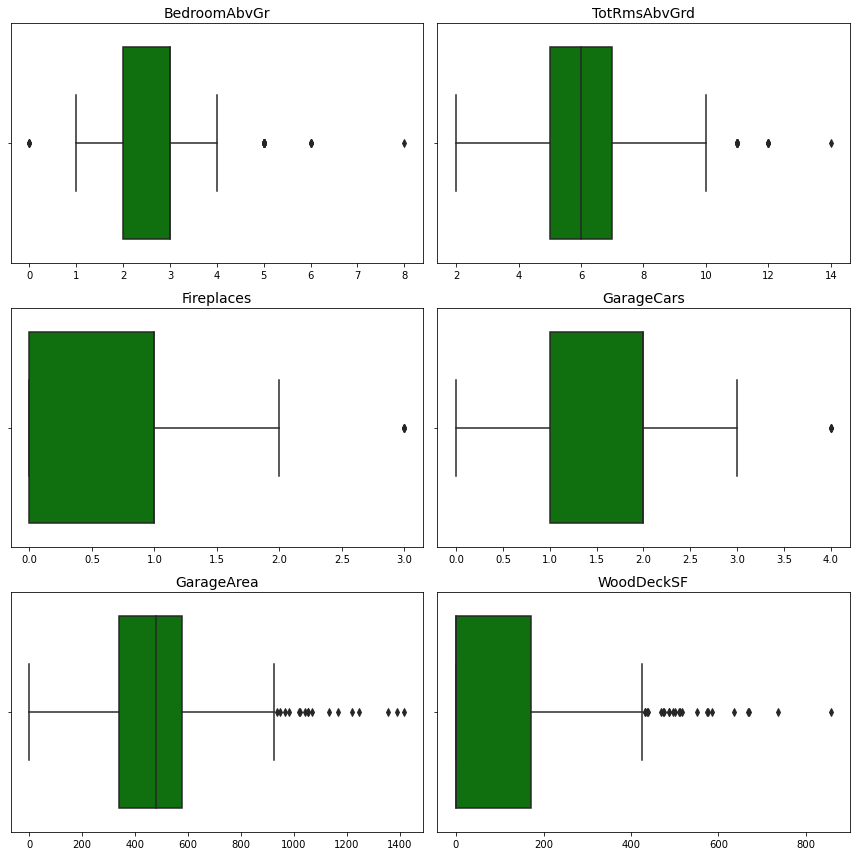

In [113]:
plt.figure(figsize=(12,12))
j=1
for i in cont[12:18]:
    plt.subplot(3,2,j)
    j+=1
    ax = sns.boxplot(df_train[i], color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Columns 'GarageArea' and 'WoodDeckSF contain lots of higher outliers.
* Columns 'TotalRoomsAbvGrd', 'Fireplaces' and 'GarageCarrs' contain very few higher outliers while column 'BedroomAbvGr' contains lower outliers as well.


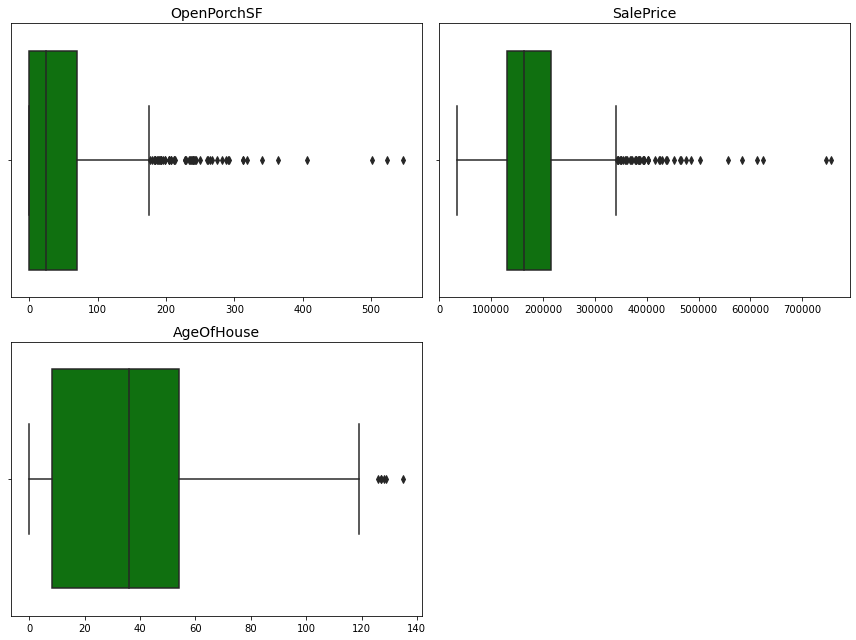

In [114]:
plt.figure(figsize=(12,9))
j=1
for i in cont[18:]:
    plt.subplot(2,2,j)
    j+=1
    ax = sns.boxplot(df_train[i], color ='green')
    ax.set_title(i, fontsize=14)
    ax.set_xlabel('')
plt.tight_layout()

* Both the columns 'OpenPorchSF' and 'SalePrice' contain lots of higher outliers while the column 'AgeOfHouse' contains very little higher outliers.

In [115]:
temp_df = df_train[cont]
threshold = 4

In [116]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
np.where(z>threshold)

(array([  23,   51,  113,  119,  119,  140,  141,  141,  152,  191,  232,
         241,  243,  245,  300,  305,  305,  309,  356,  361,  361,  361,
         361,  423,  434,  449,  592,  592,  592,  592,  592,  592,  592,
         608,  614,  614,  626,  689,  691,  691,  691,  697,  707,  711,
         713,  720,  746,  758,  762,  772,  775,  800,  839,  839,  858,
         914,  956,  980, 1038, 1047, 1053, 1082, 1120, 1123, 1123, 1142],
       dtype=int64),
 array([18, 18,  1,  1, 17,  2,  8, 19, 17,  0,  2, 19,  5,  1, 19,  5,  6,
        17,  1,  5,  6,  8, 18, 19,  2, 18,  0,  1,  3,  5,  6,  8, 16,  2,
        12, 13, 18,  1,  2,  8, 19,  2, 17, 18, 18,  2, 18,  0,  2, 16,  9,
         0,  2, 19,  2, 19, 18, 16,  1,  2,  0,  1,  0,  1, 17,  6],
       dtype=int64))

In [117]:
df_new = df_train[(z<threshold).all(axis=1)]
df_new

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0            120       RL         48.0     4928      IR1         Lvl   
1             20       RL         95.0    15865      IR1         Lvl   
2             60       RL         92.0     9920      IR1         Lvl   
3             20       RL        105.0    11751      IR1         Lvl   
4             20       RL         79.0    16635      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1163          20       RL         79.0     9819      IR1         Lvl   
1164          20       RL         67.0     8777      Reg         Lvl   
1165         160       RL         24.0     2280      Reg         Lvl   
1166          70  C (all)         50.0     8500      Reg         Lvl   
1167          60       RL         84.0     7861      IR1         Lvl   

     LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Inside      NPkVill       Norm   TwnhsE     1Story            6   
1       Inside        NAmes       Norm     1Fam     1Story            8   
2      CulDSac      NoRidge       Norm     1Fam     2Story            7   
3       Inside       NWAmes       Norm     1Fam     1Story            6   
4          FR2       NWAmes       Norm     1Fam     1Story            6   
...        ...          ...        ...      ...        ...          ...   
1163    Inside       Sawyer       Norm     1Fam     1Story            5   
1164    Inside      Edwards      Feedr     1Fam     1Story            4   
1165       FR2      NPkVill       Norm    Twnhs     2Story            6   
1166    Inside       IDOTRR      Feedr     1Fam     2Story            4   
1167    Inside      Gilbert       Norm     1Fam     2Story            6   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     Plywood     Plywood       None         0.0   
1         Flat  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0   
2        Gable  CompShg     MetalSd     MetalSd       None         0.0   
3          Hip  CompShg     Plywood     Plywood    BrkFace       480.0   
4        Gable  CompShg     CemntBd     CmentBd      Stone       126.0   
...        ...      ...         ...         ...        ...         ...   
1163     Gable  CompShg     MetalSd     MetalSd    BrkFace        31.0   
1164     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1165     Gable  CompShg     Plywood     Brk Cmn       None         0.0   
1166   Gambrel  CompShg     BrkFace     BrkFace       None         0.0   
1167     Gable  CompShg     VinylSd     VinylSd       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           TA        TA     CBlock       Gd       TA           No   
1           Gd        Gd      PConc       TA       Gd           Gd   
2           Gd        TA      PConc       Gd       TA           Av   
3           TA        TA     CBlock       Gd       TA           No   
4           Gd        TA     CBlock       Gd       TA           No   
...        ...       ...        ...      ...      ...          ...   
1163        TA        Gd     CBlock       TA       TA           No   
1164        TA        TA     CBlock       NA       NA           NA   
1165        TA        TA     CBlock       Gd       TA           No   
1166        TA        Fa     BrkTil       TA       TA           No   
1167        Gd        TA      PConc       Gd       TA           No   

     BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir  \
0             ALQ         120        958         1078        TA          Y   
1             ALQ         351       1043         2217        Ex          Y   
2             GLQ         862        255         1117        Ex          Y   
3             BLQ         705       1139         1844        Ex          Y   
4             ALQ        1246        356         1602        Gd          Y   
...           ...         ...        ...  

In [118]:
#Percentage of data lost
((len(df_train)-len(df_new))/len(df_train))*100

4.195205479452055

### BI-VARIATE ANALYSIS

In [119]:
cat = list((set(df_new.columns) - set(cont)))
len(cat)
cat

['CentralAir',
 'Exterior2nd',
 'FireplaceQu',
 'MSSubClass',
 'HouseStyle',
 'Fence',
 'RoofStyle',
 'Functional',
 'GarageType',
 'Neighborhood',
 'HeatingQC',
 'GarageFinish',
 'MasVnrType',
 'MSZoning',
 'KitchenQual',
 'Exterior1st',
 'SaleCondition',
 'PavedDrive',
 'ExterCond',
 'Remod',
 'Condition1',
 'BsmtCond',
 'OverallQual',
 'LotShape',
 'SaleType',
 'RoofMatl',
 'GarageCond',
 'BldgType',
 'BsmtExposure',
 'ExterQual',
 'GarageQual',
 'Foundation',
 'LotConfig',
 'BsmtFinType1',
 'LandContour',
 'BsmtQual',
 'Electrical']

In [120]:
def func(j):
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    df_grp_cat_saleprice = df_new[[j,'SalePrice']].groupby(j).mean().round(0)
    df_temp_count = pd.DataFrame(df_new[j].value_counts())
    ax = sns.scatterplot(x=j, y='SalePrice', data=df_new)
    plt.subplot(2,1,2)
    ax = sns.violinplot(x=j, y='SalePrice', data=df_new)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    print(pd.merge(df_grp_cat_saleprice, df_temp_count, how = 'inner', left_index = True, right_index = True).sort_values(by=['SalePrice'],ascending=False))

   SalePrice  CentralAir
Y   180803.0        1043
N   108792.0          76


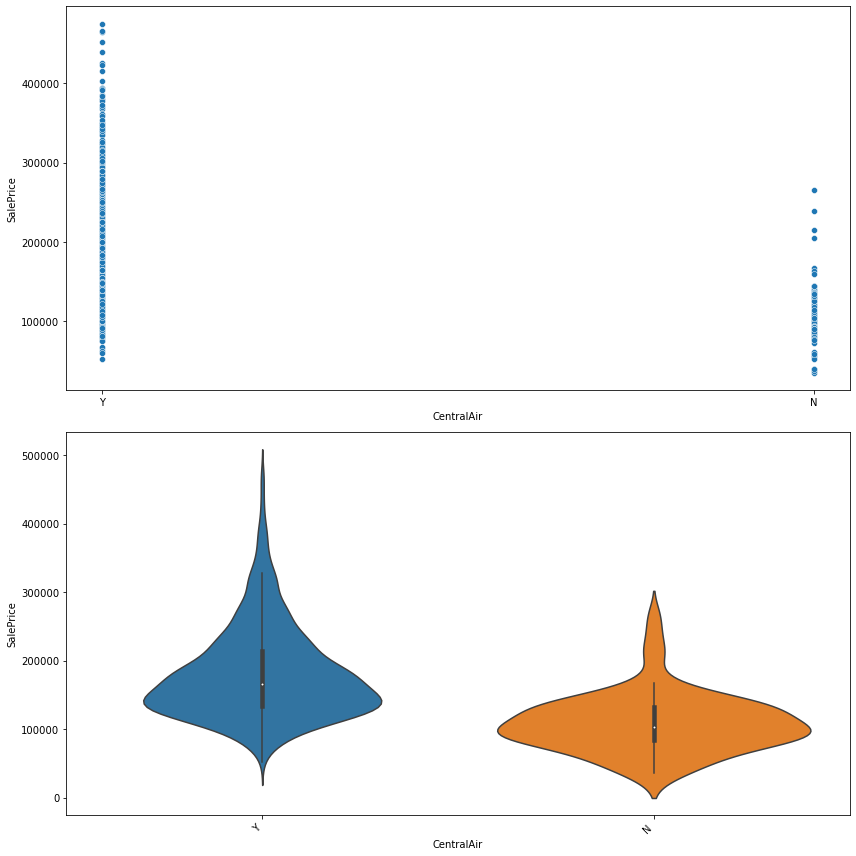

In [121]:
func(cat[0])

         SalePrice  Exterior2nd
Other     319000.0            1
CmentBd   235040.0           38
VinylSd   209510.0          371
ImStucc   206386.0            7
BrkFace   182392.0           19
Stone     174406.0            4
Plywood   165985.0          111
HdBoard   160825.0          165
Wd Sdng   149912.0          156
Wd Shng   149038.0           30
Stucco    148835.0           21
MetalSd   148154.0          170
AsphShn   138000.0            3
Brk Cmn   131300.0            5
AsbShng   114373.0           18


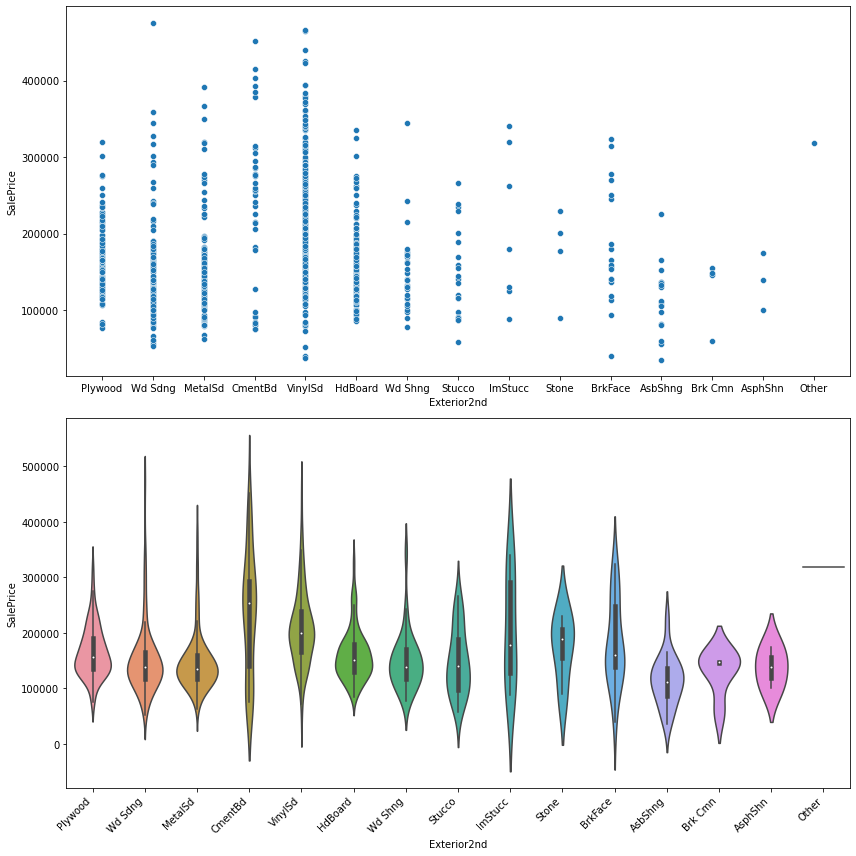

In [122]:
func(cat[1])

    SalePrice  FireplaceQu
Ex   320854.0           17
Gd   213516.0          280
TA   202563.0          236
Fa   165806.0           24
NA   142381.0          544
Po   131488.0           18


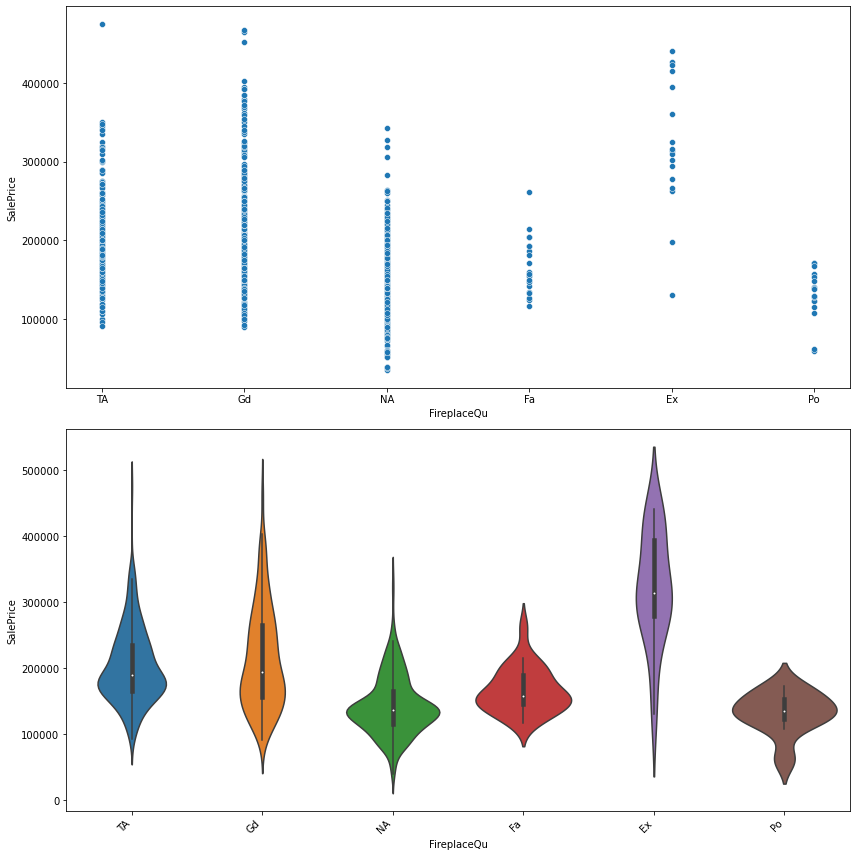

In [123]:
func(cat[2])

     SalePrice  MSSubClass
60    228788.0         227
120   207705.0          69
75    183182.0          11
20    178420.0         410
80    171885.0          42
70    168188.0          52
40    157500.0           3
85    147800.0          19
160   136244.0          45
50    135304.0         111
90    132743.0          40
190   126998.0          23
45    111960.0          10
180   102750.0           6
30     99007.0          51


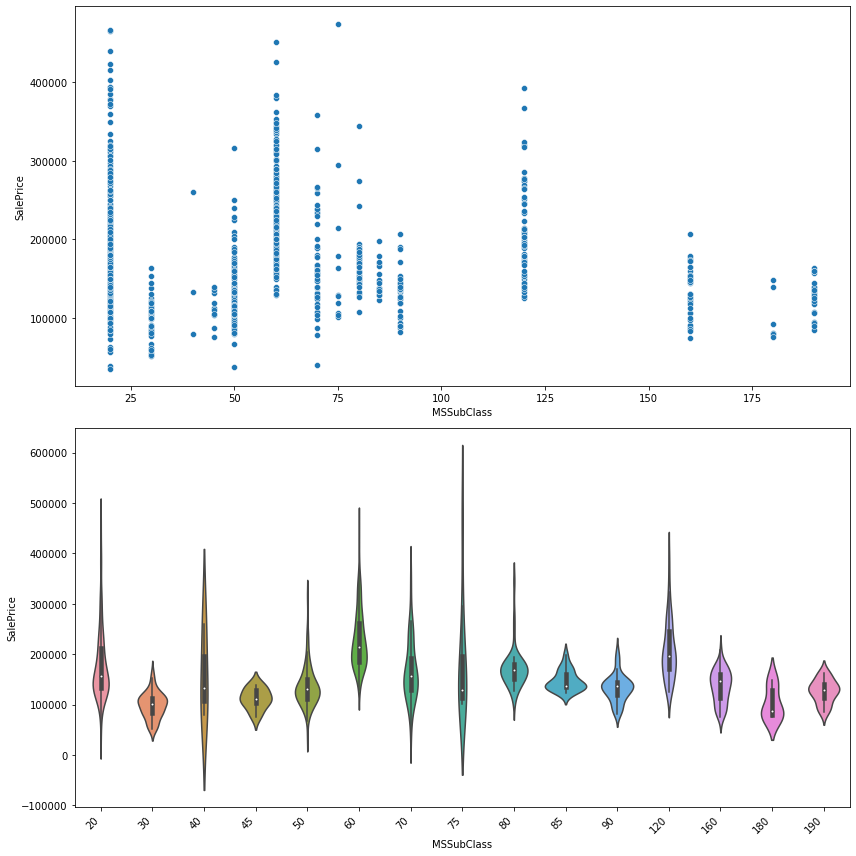

In [124]:
func(cat[3])

        SalePrice  HouseStyle
2.5Fin   227167.0           6
2Story   202303.0         340
1Story   172357.0         557
SLvl     170362.0          46
SFoyer   137508.0          32
2.5Unf   137362.0           8
1.5Fin   135612.0         118
1.5Unf   113217.0          12


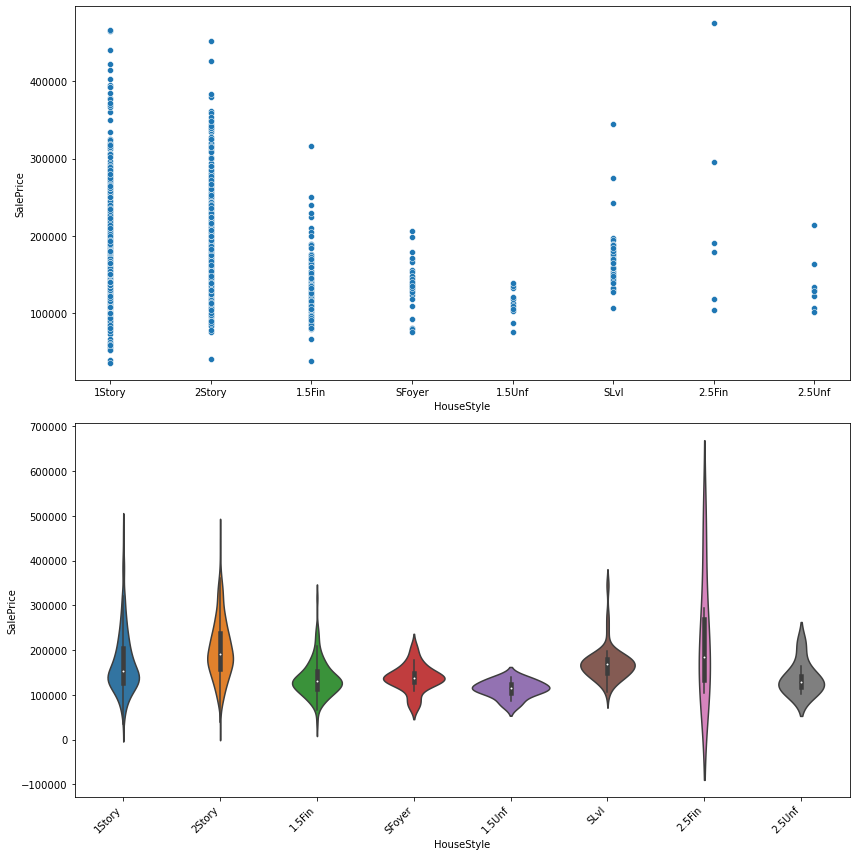

In [125]:
func(cat[4])

       SalePrice  Fence
NA      182414.0    888
GdPrv   180509.0     49
MnPrv   145895.0    127
GdWo    136245.0     45
MnWw    135715.0     10


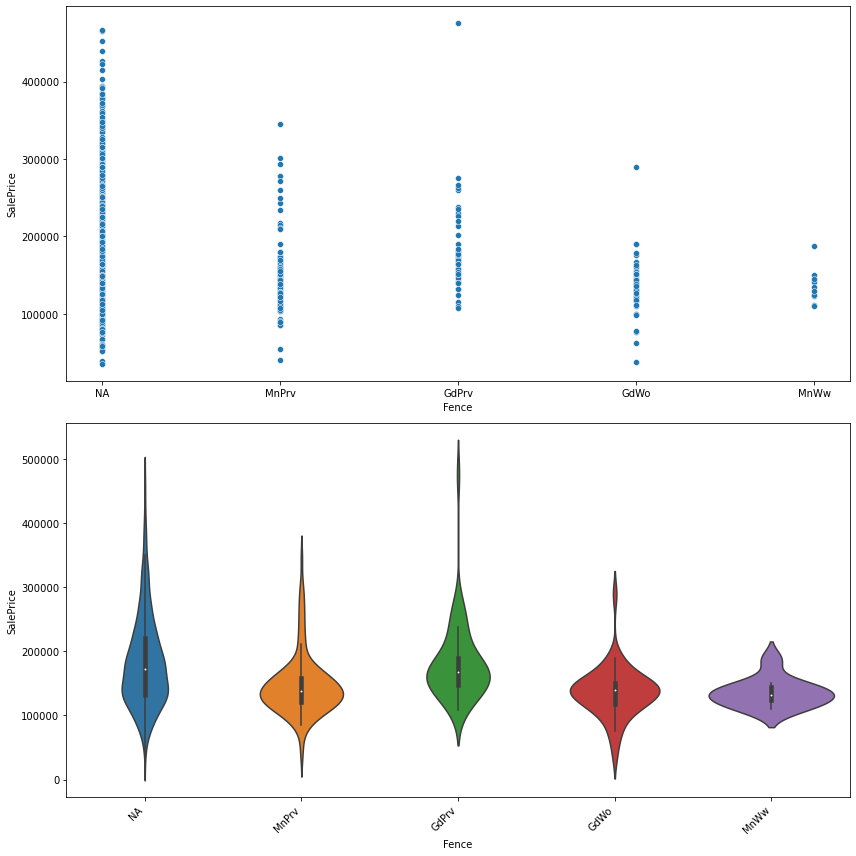

In [126]:
func(cat[5])

         SalePrice  RoofStyle
Shed      225000.0          2
Hip       197543.0        204
Flat      195097.0         10
Mansard   194796.0          5
Gable     170827.0        889
Gambrel   145111.0          9


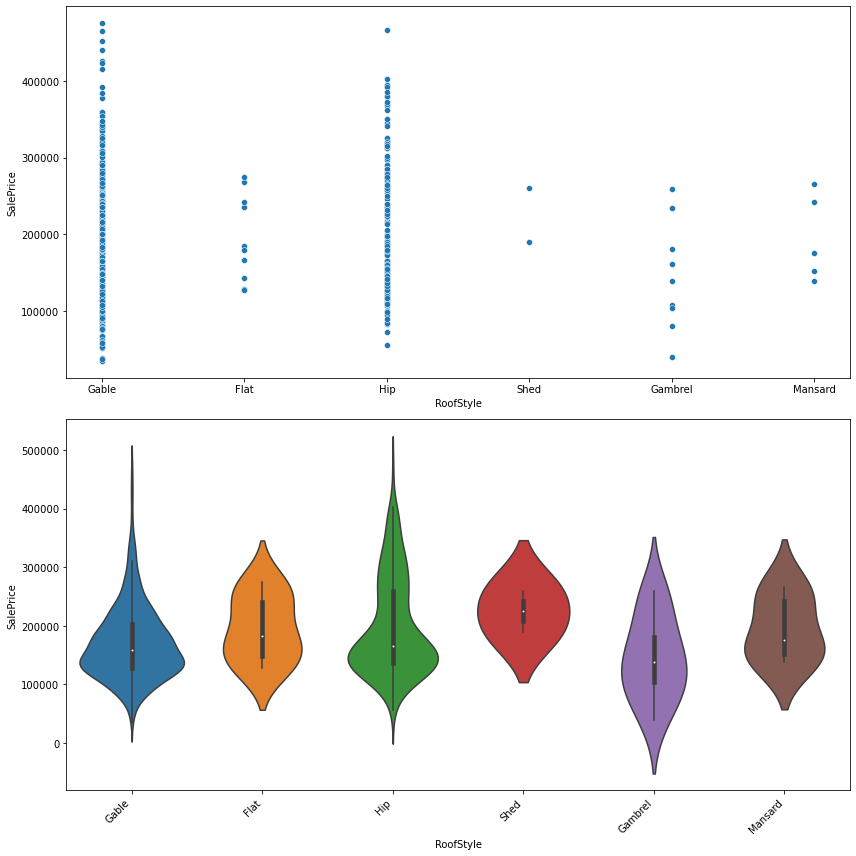

In [127]:
func(cat[6])

      SalePrice  Functional
Typ    178455.0        1039
Maj1   151443.0          11
Min1   147815.0          23
Min2   146842.0          30
Mod    135173.0          11
Sev    129000.0           1
Maj2    86000.0           4


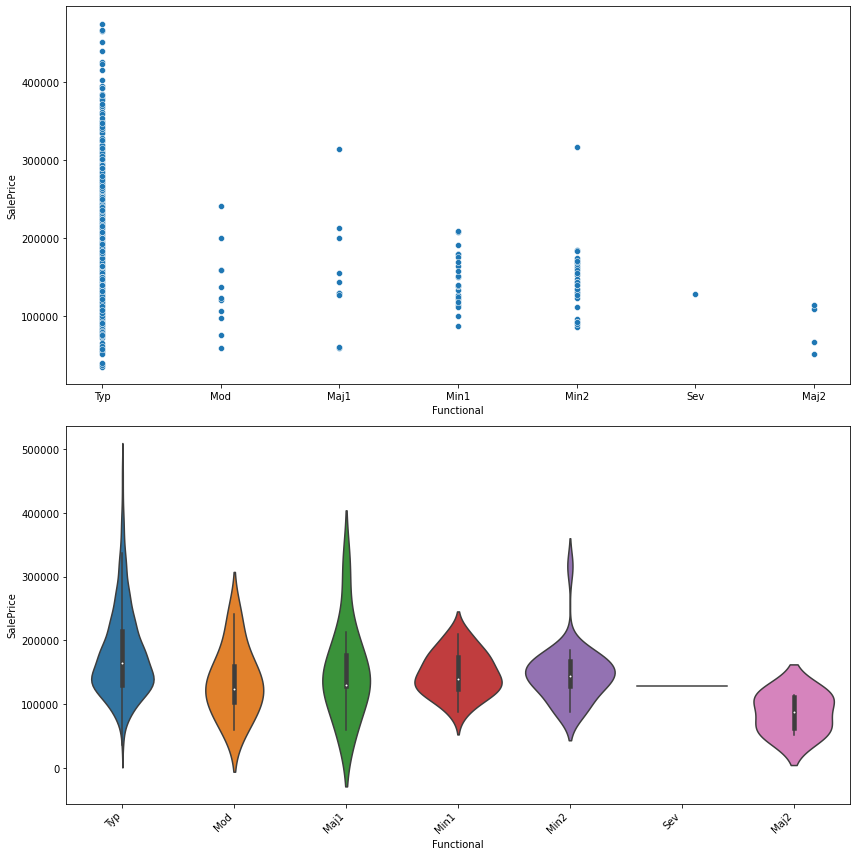

In [128]:
func(cat[7])

         SalePrice  GarageType
BuiltIn   240116.0          63
Attchd    197572.0         662
Basment   160709.0          16
2Types    138250.0           4
Detchd    133753.0         305
CarPort   109957.0           8
NA        100441.0          61


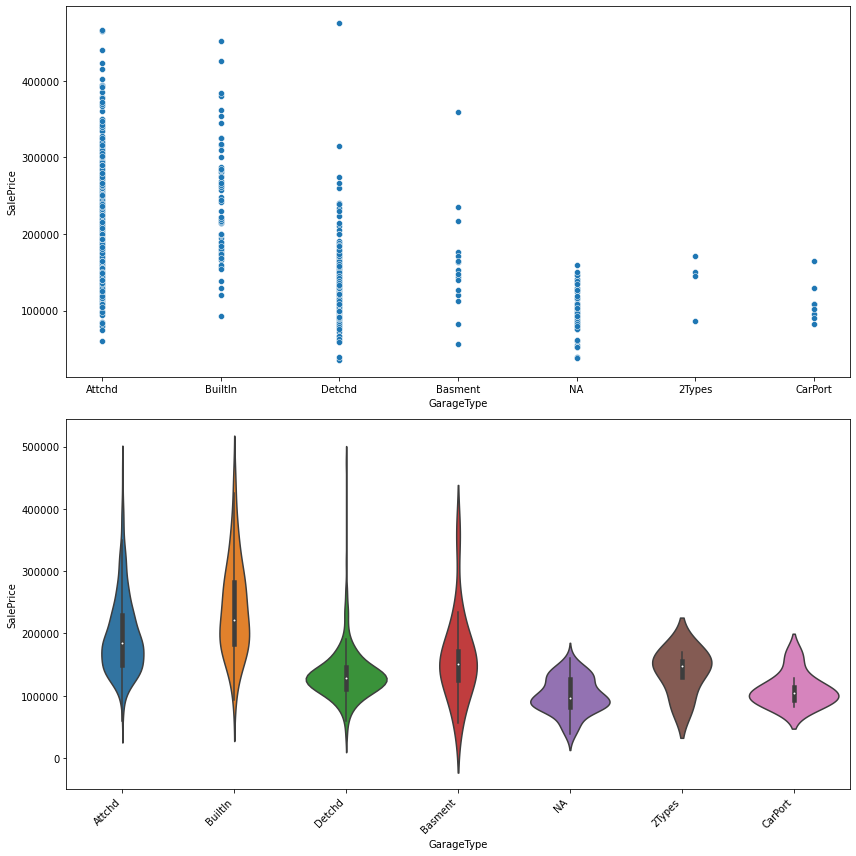

In [129]:
func(cat[8])

         SalePrice  Neighborhood
NridgHt   296763.0            54
NoRidge   293146.0            27
StoneBr   274315.0            17
Timber    242760.0            21
Veenker   229562.0             8
...            ...           ...
Edwards   126556.0            79
BrkSide   120782.0            49
BrDale    104082.0            11
IDOTRR    103613.0            29
MeadowV    88444.0             9

[25 rows x 2 columns]


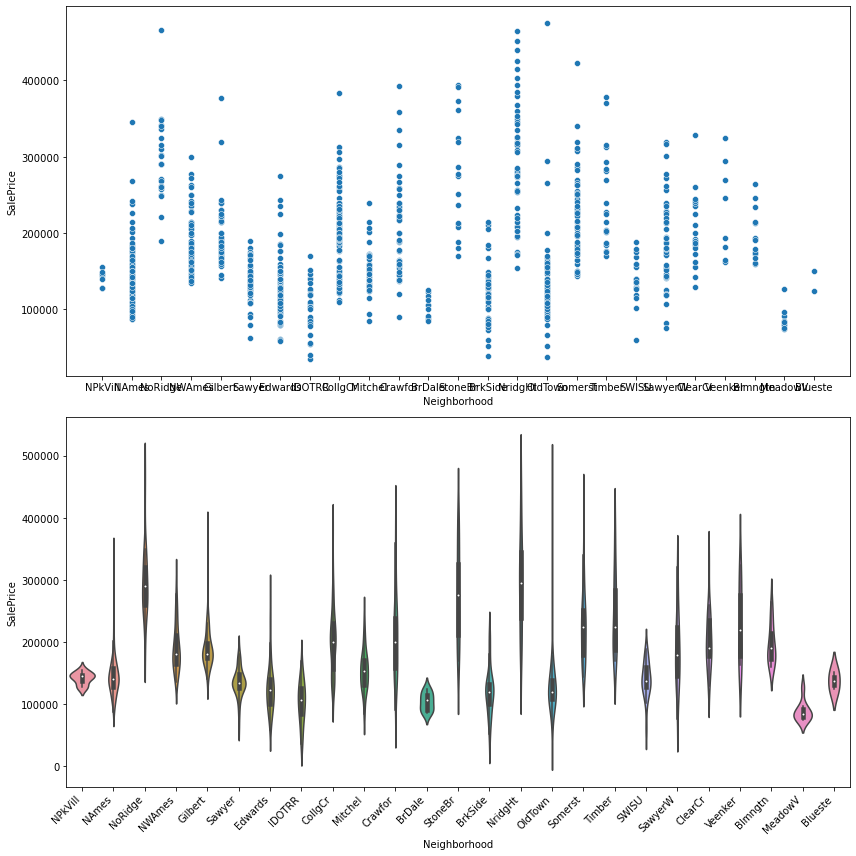

In [130]:
func(cat[9])

    SalePrice  HeatingQC
Ex   207553.0        553
Gd   155636.0        185
TA   141523.0        343
Fa   125572.0         37
Po    87000.0          1


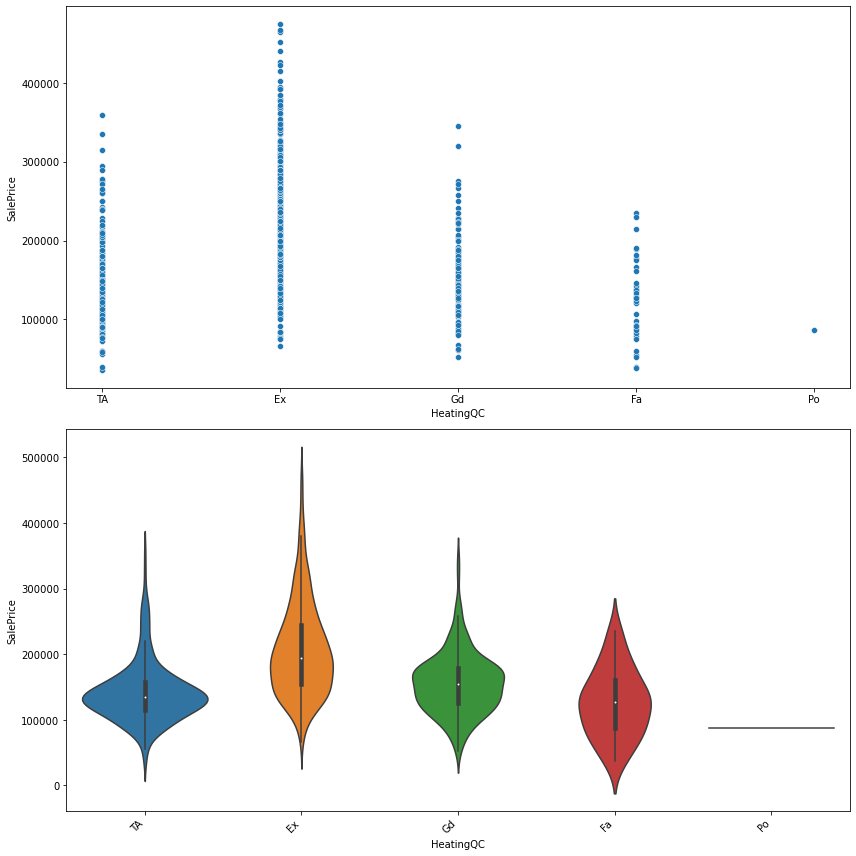

In [131]:
func(cat[10])

     SalePrice  GarageFinish
Fin   228283.0           254
RFn   198696.0           328
Unf   141937.0           476
NA    100441.0            61


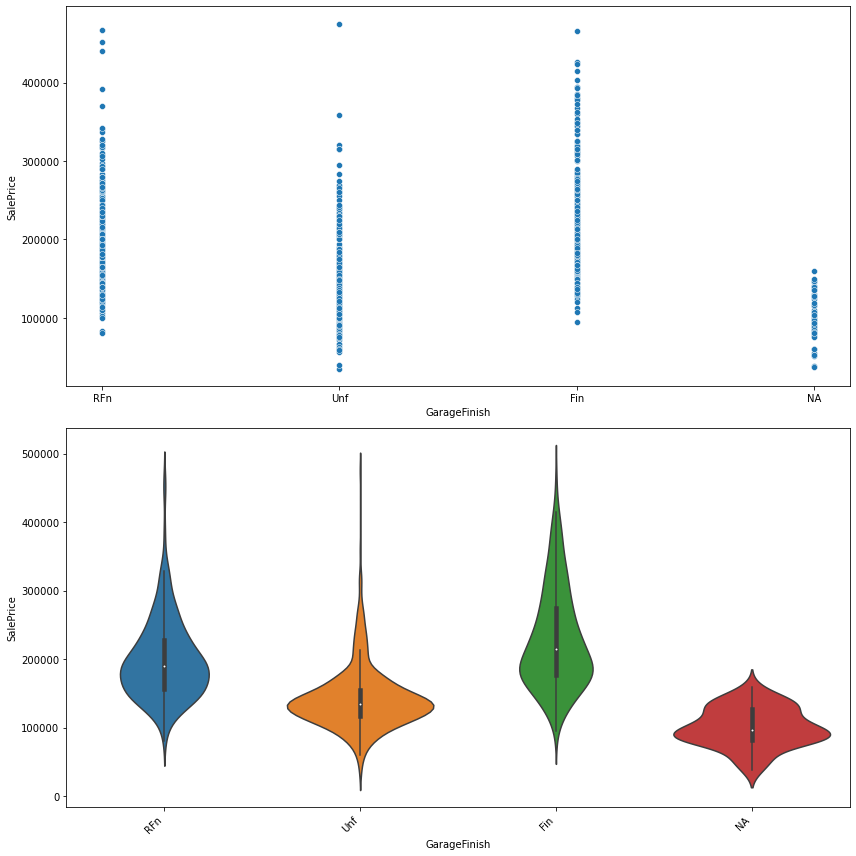

In [132]:
func(cat[11])

         SalePrice  MasVnrType
Stone     247935.0          89
BrkFace   199163.0         341
None      155533.0         677
BrkCmn    130739.0          12


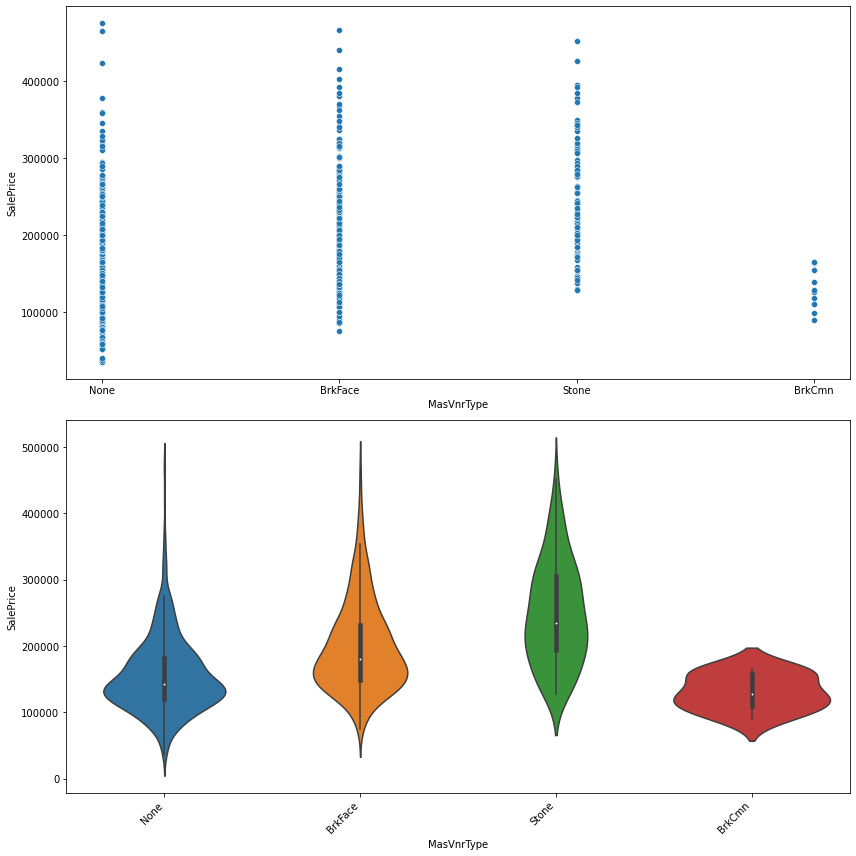

In [133]:
func(cat[12])

         SalePrice  MSZoning
FV        208373.0        48
RL        184687.0       888
RH        126996.0        15
RM        126841.0       160
C (all)    80248.0         8


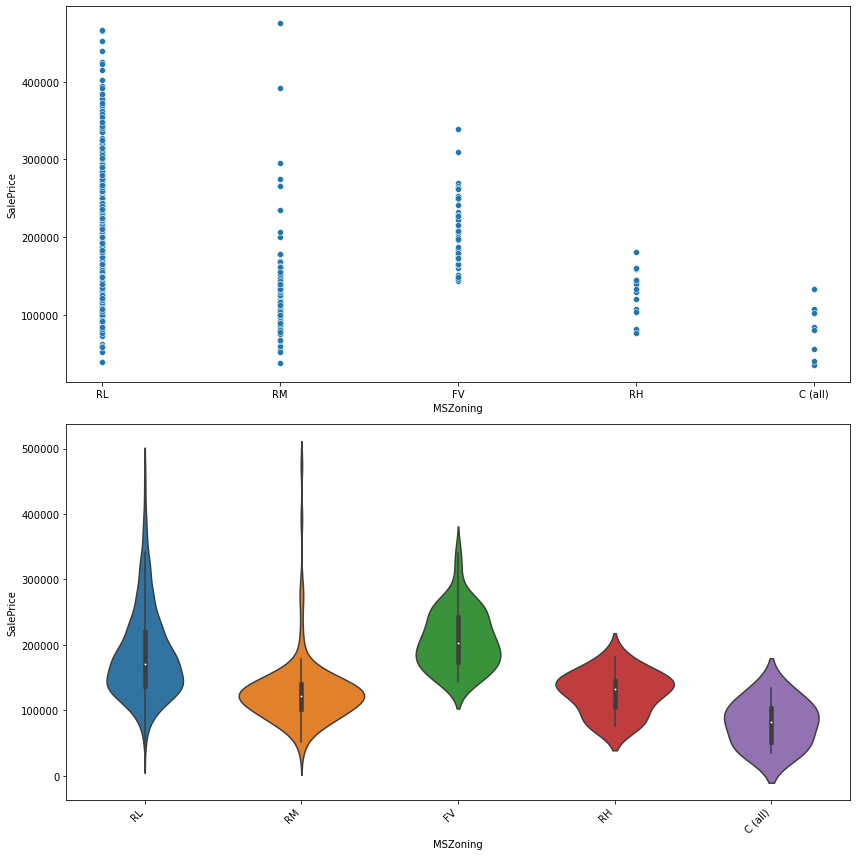

In [134]:
func(cat[13])

    SalePrice  KitchenQual
Ex   301686.0           68
Gd   206790.0          458
TA   139485.0          564
Fa   101753.0           29


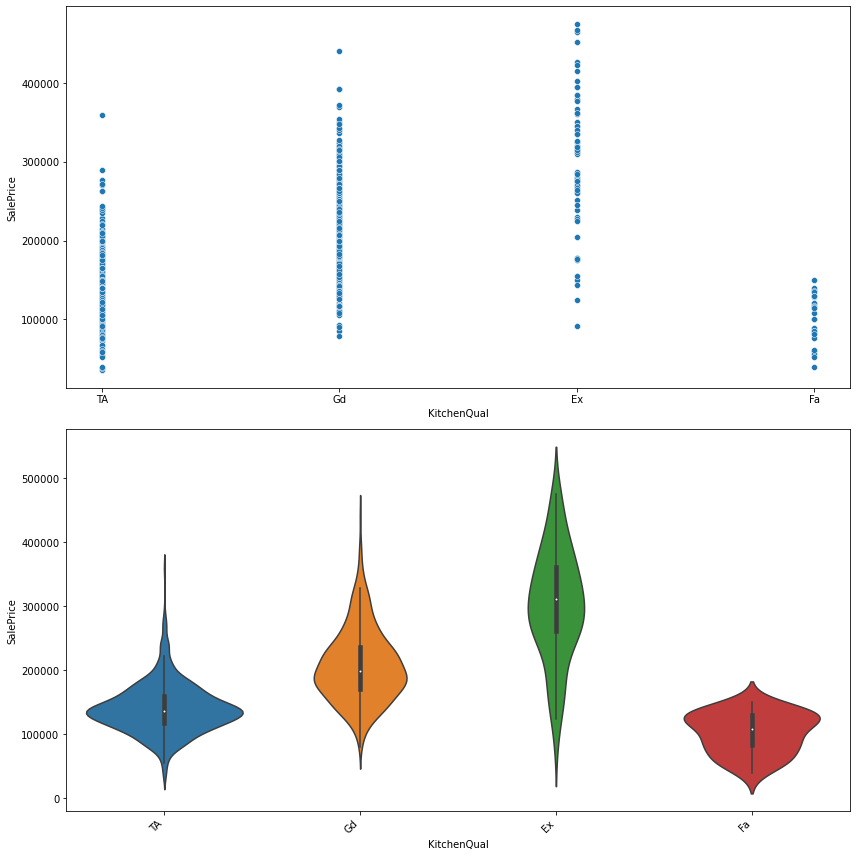

In [135]:
func(cat[14])

         SalePrice  Exterior1st
ImStucc   262000.0            1
Stone     230000.0            1
CemntBd   229501.0           38
VinylSd   209396.0          380
BrkFace   190976.0           39
Plywood   174460.0           86
HdBoard   157539.0          176
Stucco    156912.0           20
MetalSd   148092.0          175
Wd Sdng   146657.0          164
WdShing   142731.0           18
AsbShng   107774.0           19
AsphShn   100000.0            1
BrkComm    60000.0            1


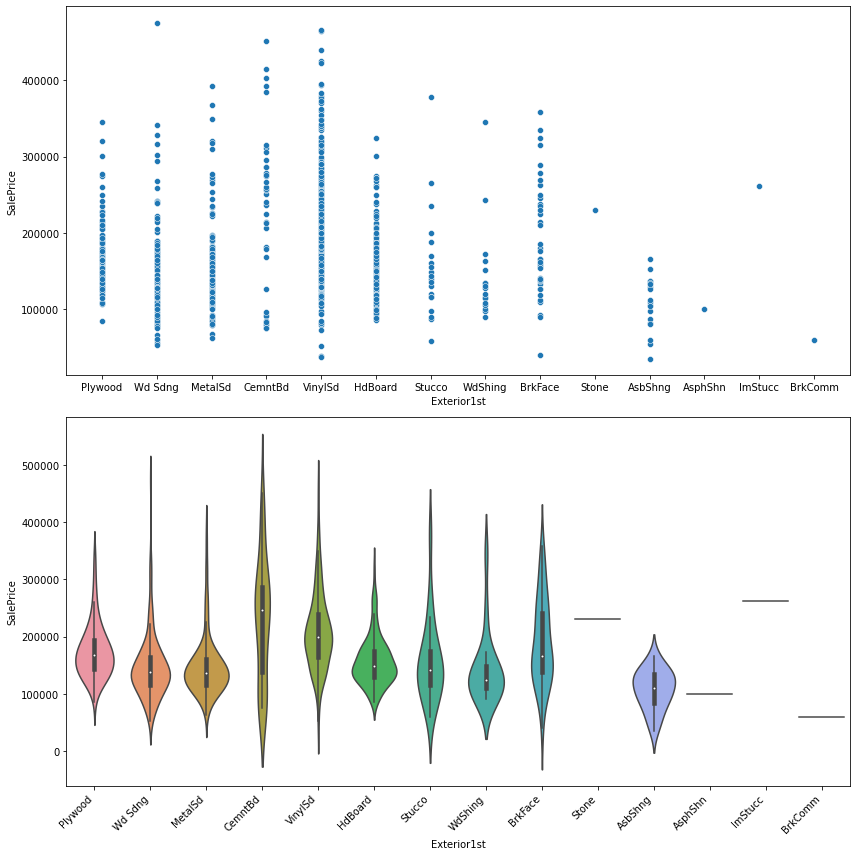

In [136]:
func(cat[15])

         SalePrice  SaleCondition
Partial   255297.0             97
Normal    171727.0            914
Alloca    166321.0             11
Family    142676.0             17
Abnorml   137515.0             76
AdjLand   104125.0              4


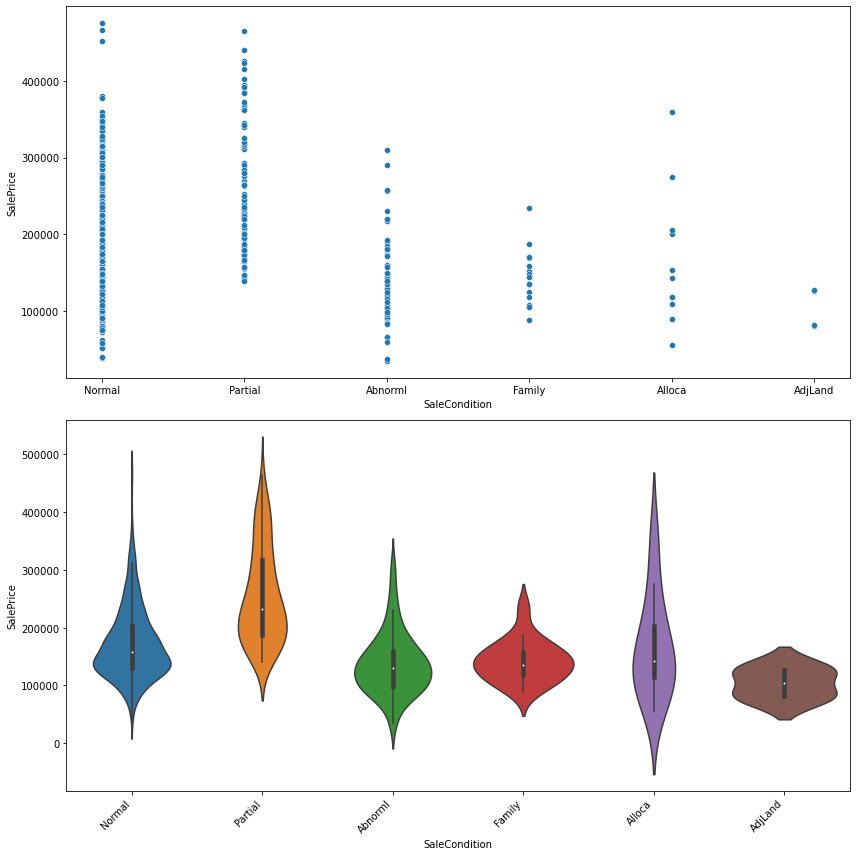

In [137]:
func(cat[16])

   SalePrice  PavedDrive
Y   181015.0        1026
P   133326.0          23
N   115104.0          70


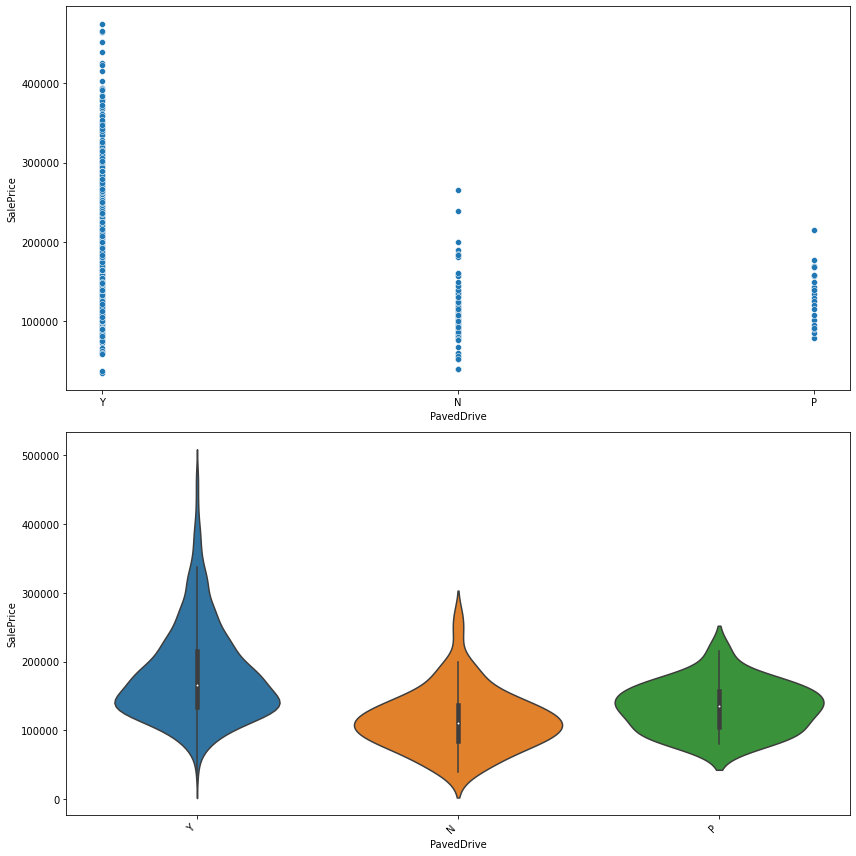

In [138]:
func(cat[17])

    SalePrice  ExterCond
TA   179106.0        979
Gd   165400.0        112
Ex   161000.0          1
Fa   105295.0         26
Po    76500.0          1


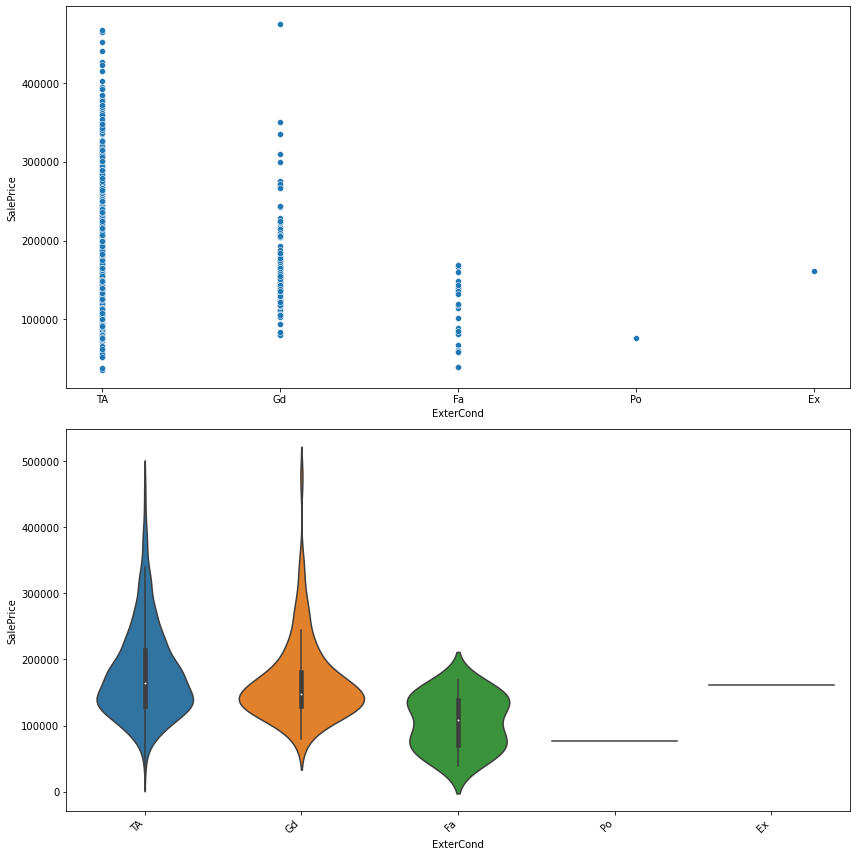

In [139]:
func(cat[18])

       SalePrice  Remod
Remod                  
N       180151.0    580
Y       171350.0    539


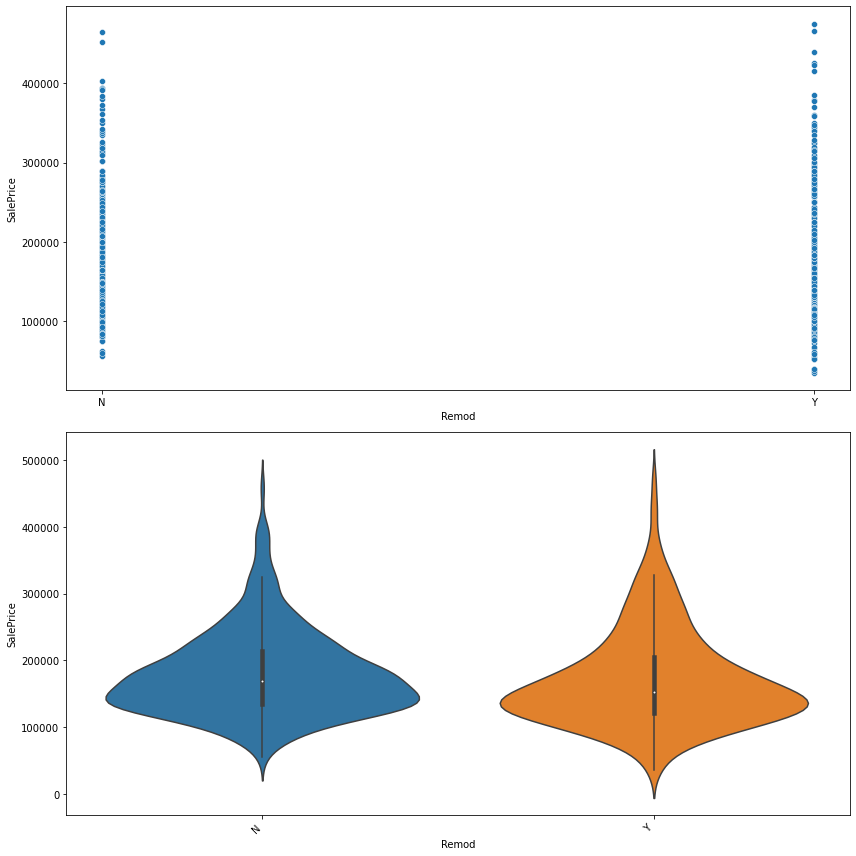

In [140]:
func(cat[19])

        SalePrice  Condition1
RRNn     238000.0           4
PosA     237000.0           5
PosN     221422.0          16
RRNe     190750.0           2
RRAn     190075.0          20
Norm     178630.0         962
Feedr    141655.0          65
RRAe     139044.0           9
Artery   130033.0          36


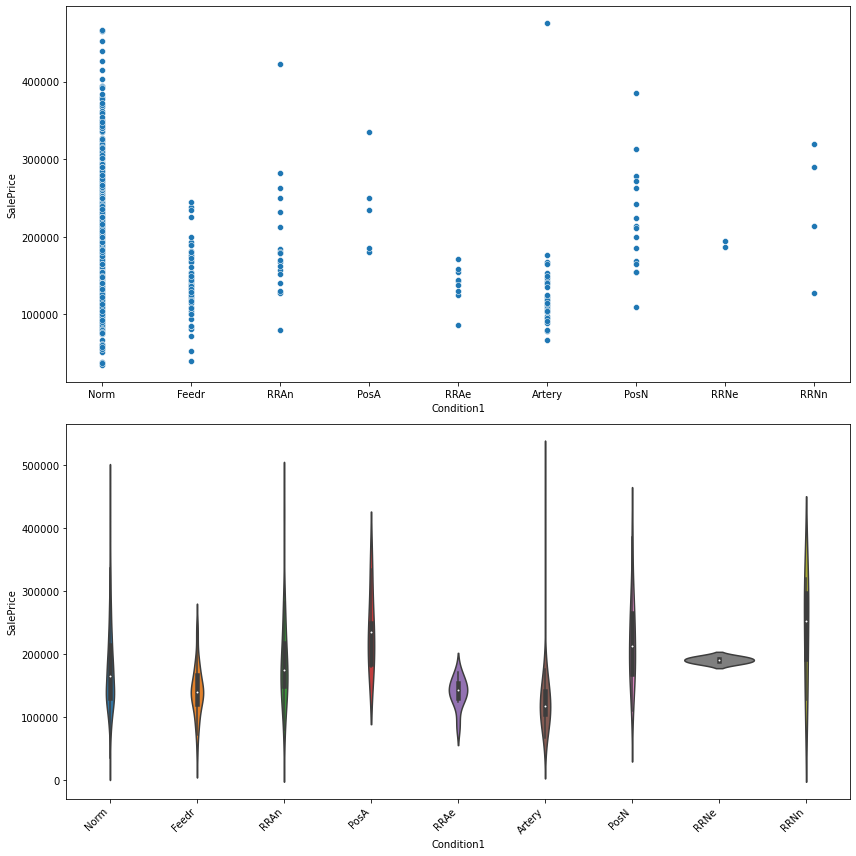

In [141]:
func(cat[20])

    SalePrice  BsmtCond
Gd   216210.0        53
TA   178212.0       996
Fa   118998.0        38
NA   107898.0        30
Po    64000.0         2


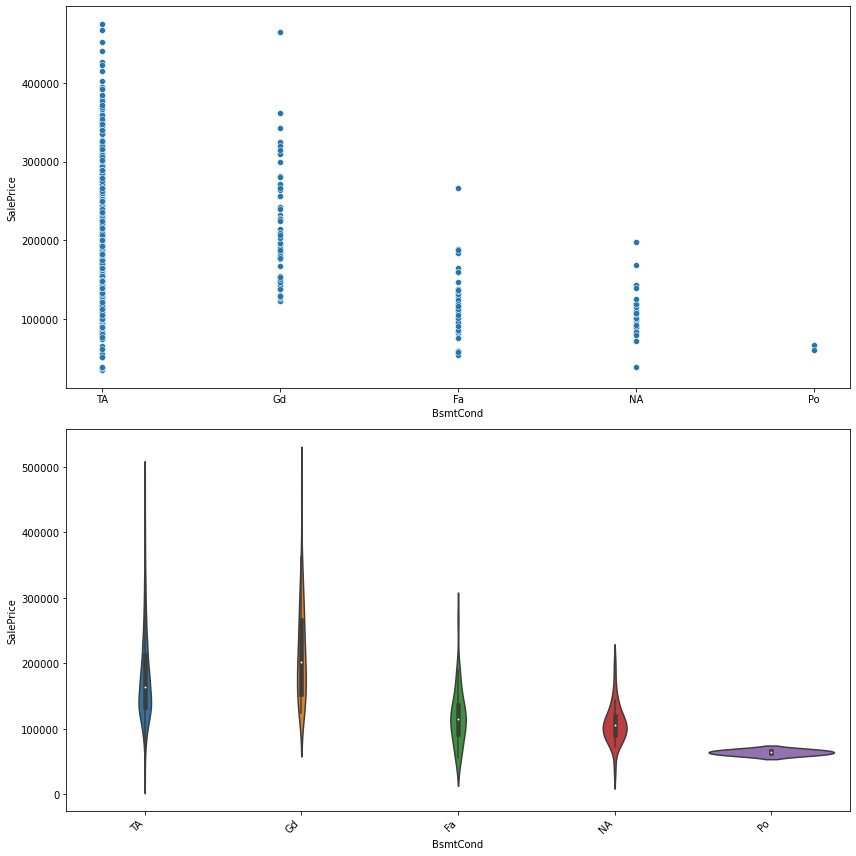

In [142]:
func(cat[21])

    SalePrice  OverallQual
10   422789.0            8
9    332477.0           24
8    269360.0          129
7    206536.0          252
6    161562.0          288
5    132357.0          307
4    109490.0           90
3     88498.0           16
2     51770.0            3
1     50150.0            2


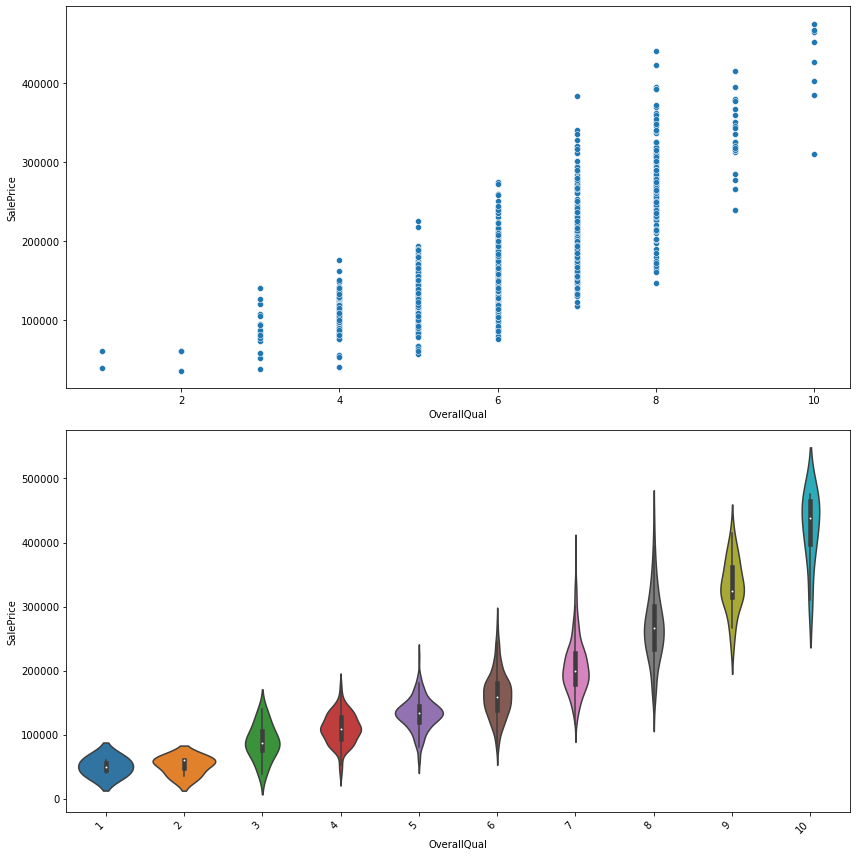

In [143]:
func(cat[22])

     SalePrice  LotShape
IR3   221000.0         3
IR2   215642.0        27
IR1   196275.0       368
Reg   163843.0       721


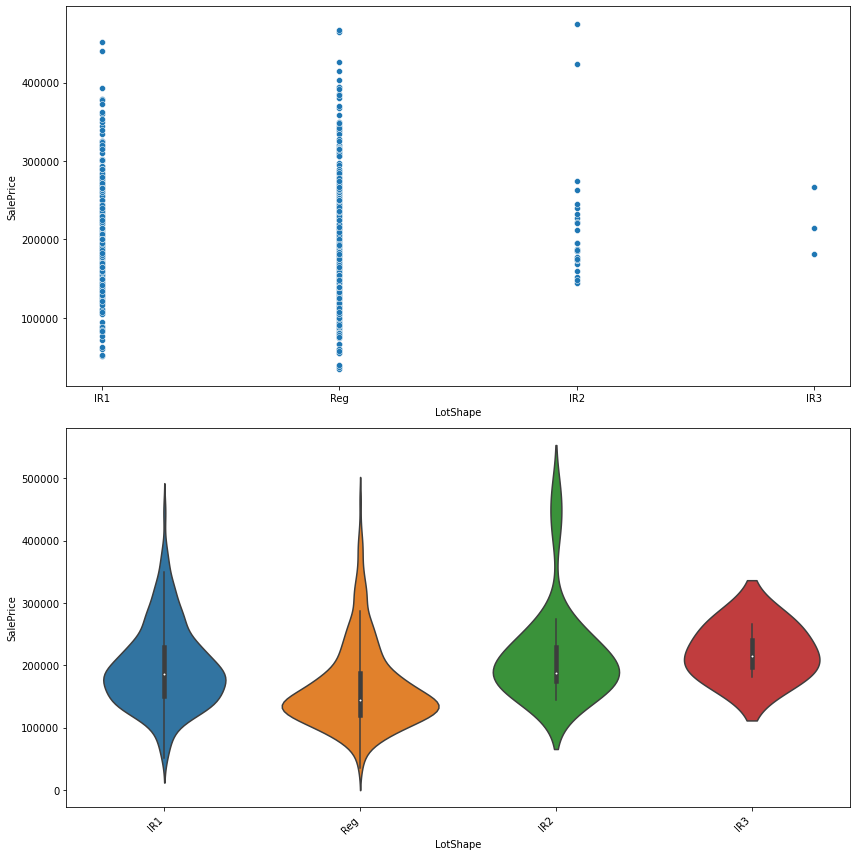

In [144]:
func(cat[23])

       SalePrice  SaleType
Con     269600.0         2
New     256691.0        95
ConLI   200390.0         5
CWD     171167.0         3
WD      169418.0       963
ConLD   146141.0         8
ConLw   143625.0         4
COD     143110.0        36
Oth     119850.0         3


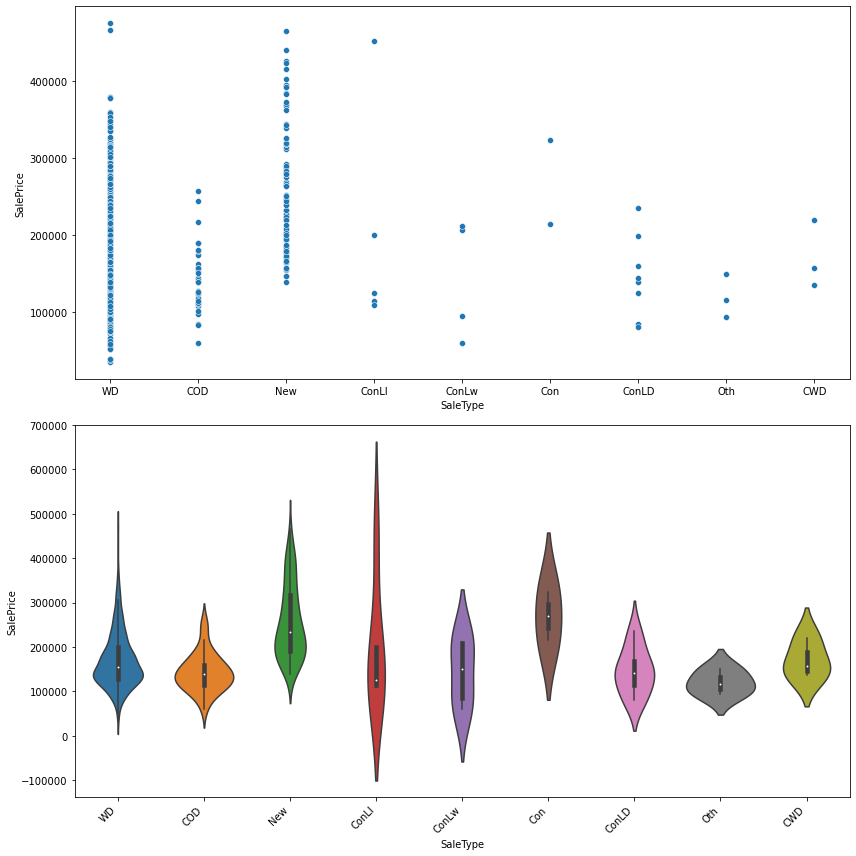

In [145]:
func(cat[24])

         SalePrice  RoofMatl
WdShngl   307167.0         3
WdShake   243333.0         3
Membran   241500.0         1
Tar&Grv   182434.0         8
Metal     180000.0         1
CompShg   175296.0      1102
Roll      137000.0         1


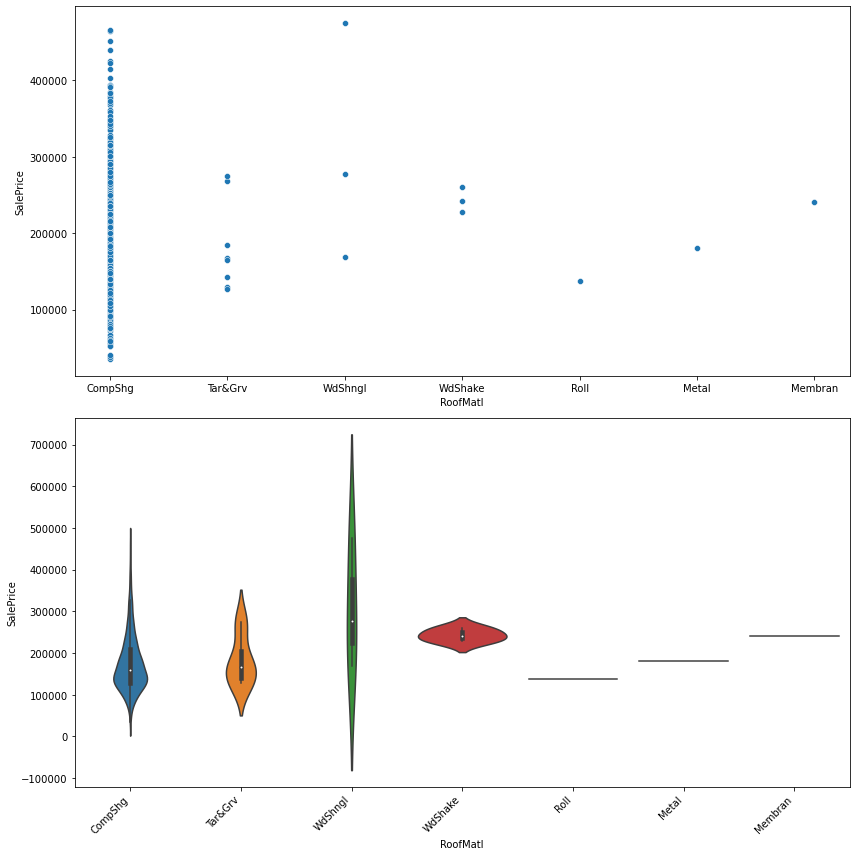

In [146]:
func(cat[25])

    SalePrice  GarageCond
TA   182537.0        1015
Gd   179921.0           8
Ex   120500.0           1
Fa   115032.0          28
Po   110500.0           6
NA   100441.0          61


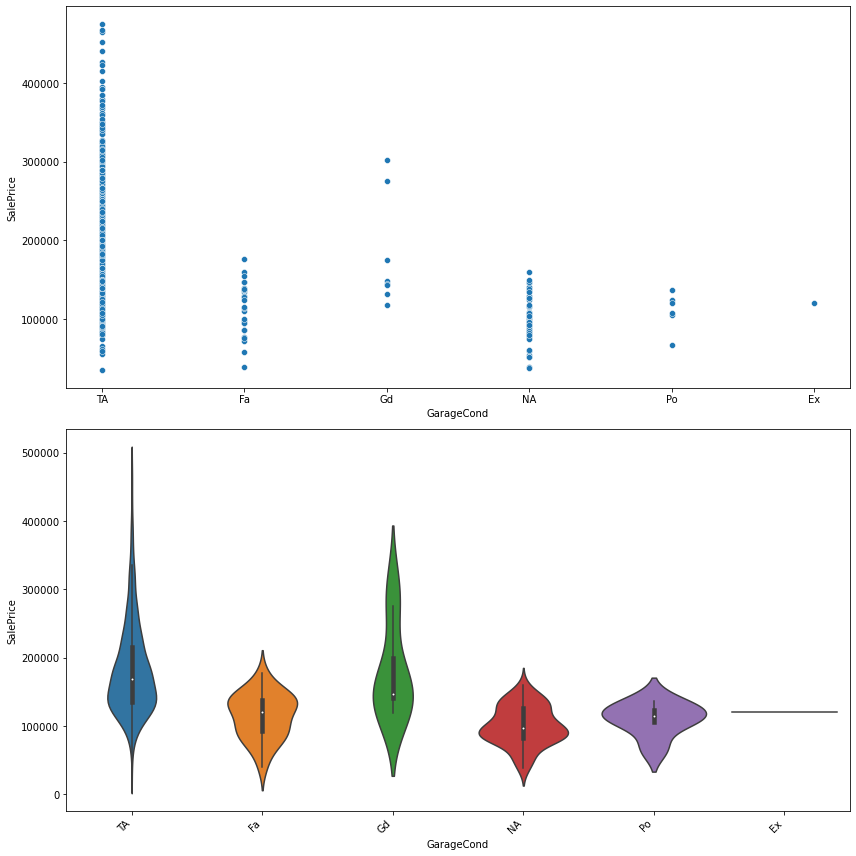

In [147]:
func(cat[26])

        SalePrice  BldgType
TwnhsE   186335.0        88
1Fam     179190.0       938
Twnhs    139438.0        29
Duplex   132743.0        40
2fmCon   125581.0        24


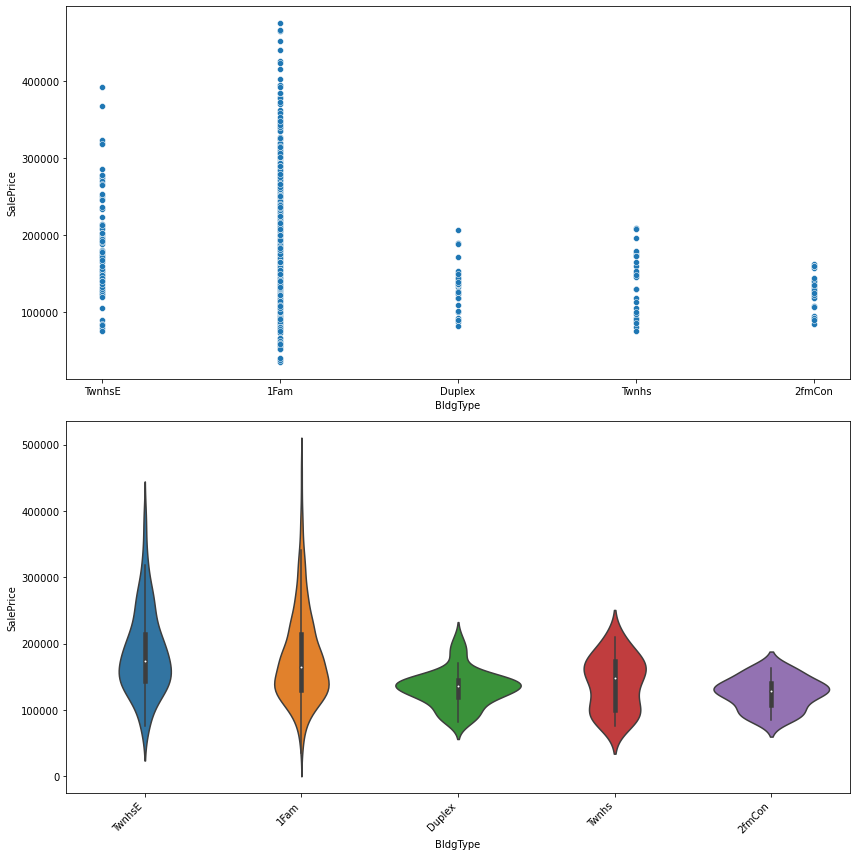

In [148]:
func(cat[27])

    SalePrice  BsmtExposure
Gd   232305.0            91
Av   198328.0           172
Mn   194553.0            92
No   164072.0           733
NA   110627.0            31


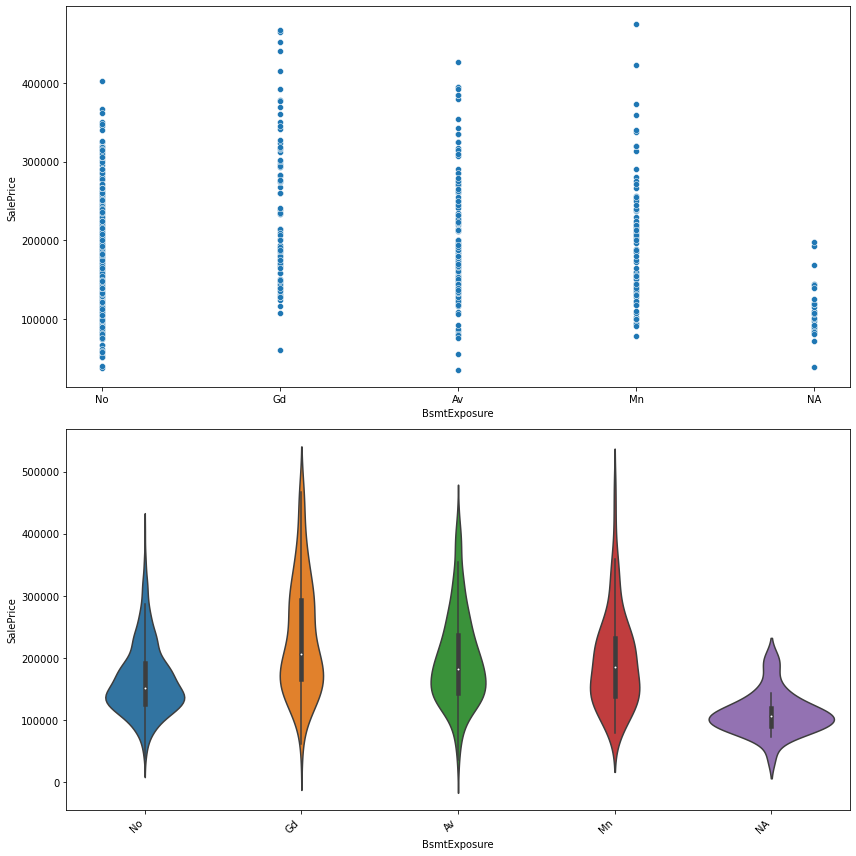

In [149]:
func(cat[28])

    SalePrice  ExterQual
Ex   334478.0         32
Gd   224784.0        377
TA   143767.0        700
Fa    76179.0         10


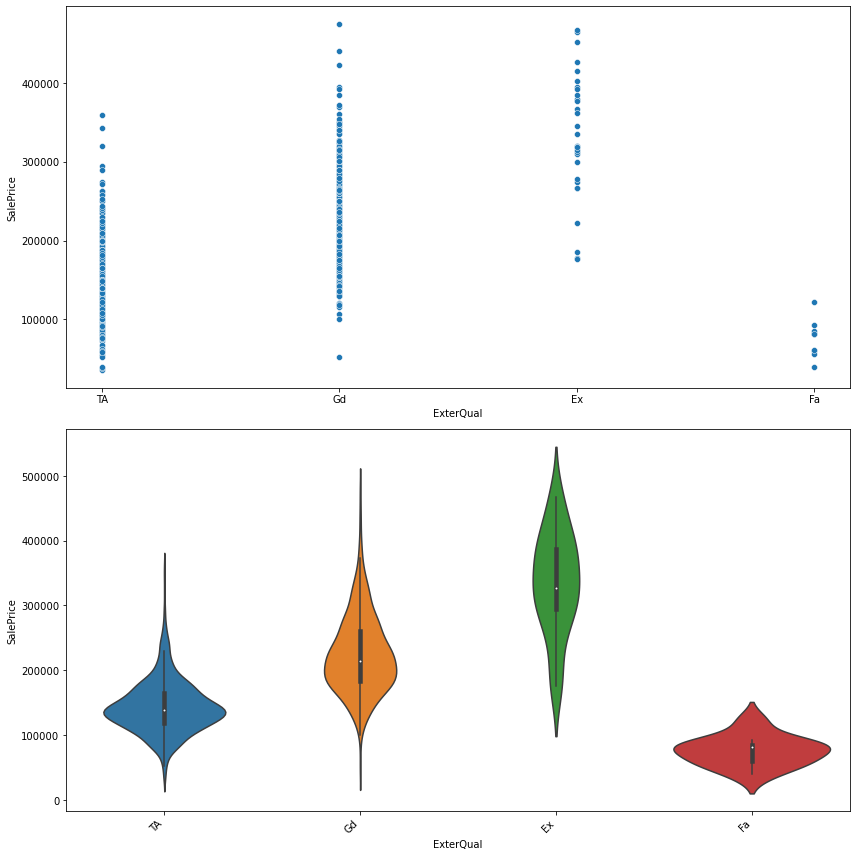

In [150]:
func(cat[29])

    SalePrice  GarageQual
Ex   297750.0           2
Gd   209305.0          10
TA   181925.0        1006
Fa   126570.0          38
Po   102000.0           2
NA   100441.0          61


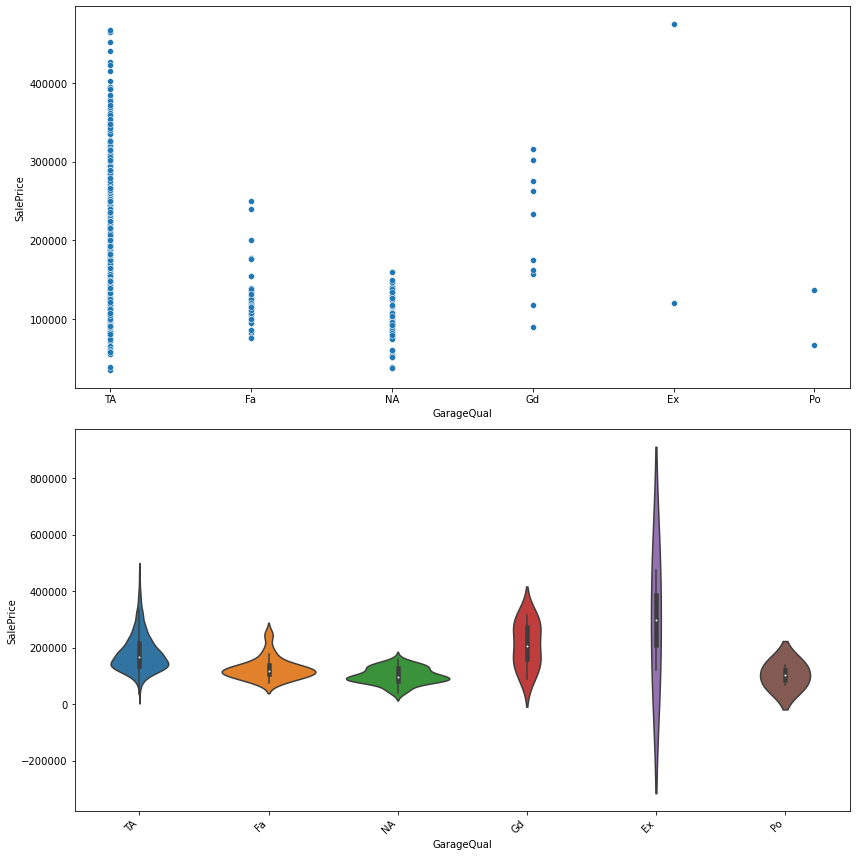

In [151]:
func(cat[30])

        SalePrice  Foundation
PConc    217062.0         486
Stone    177651.0           5
Wood     164000.0           1
CBlock   147430.0         497
BrkTil   134865.0         109
Slab     110846.0          21


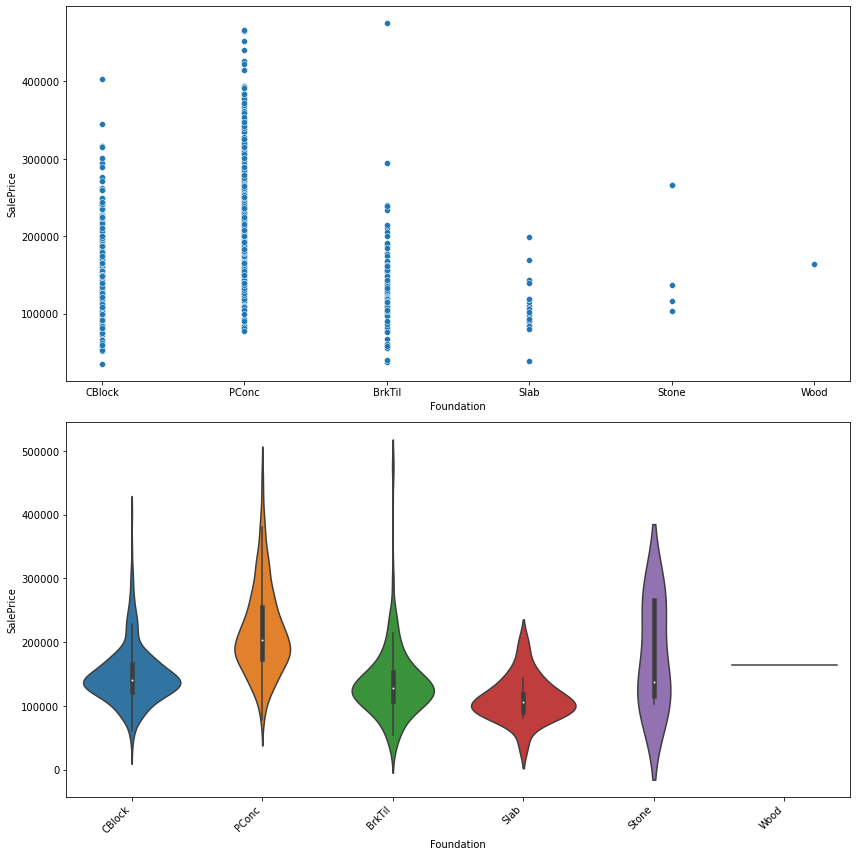

In [152]:
func(cat[31])

         SalePrice  LotConfig
FR3       221500.0          2
CulDSac   207394.0         62
Corner    174212.0        210
Inside    174029.0        812
FR2       171139.0         33


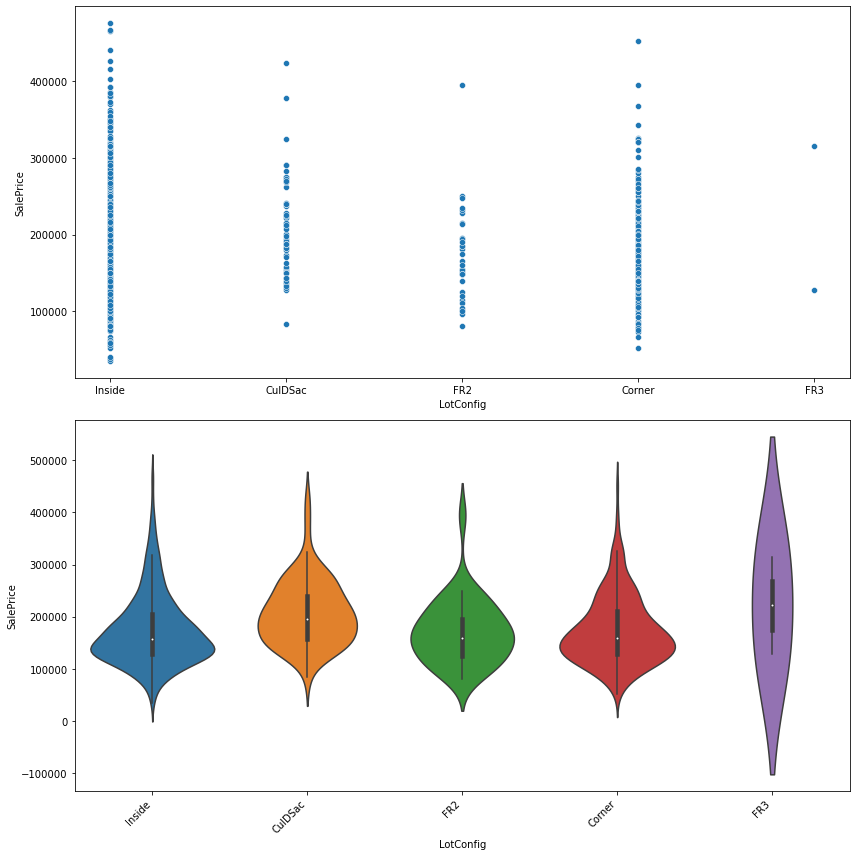

In [153]:
func(cat[32])

     SalePrice  BsmtFinType1
GLQ   225810.0           305
Unf   168497.0           338
ALQ   158759.0           168
BLQ   151023.0           116
LwQ   150071.0            57
Rec   143240.0           105
NA    107898.0            30


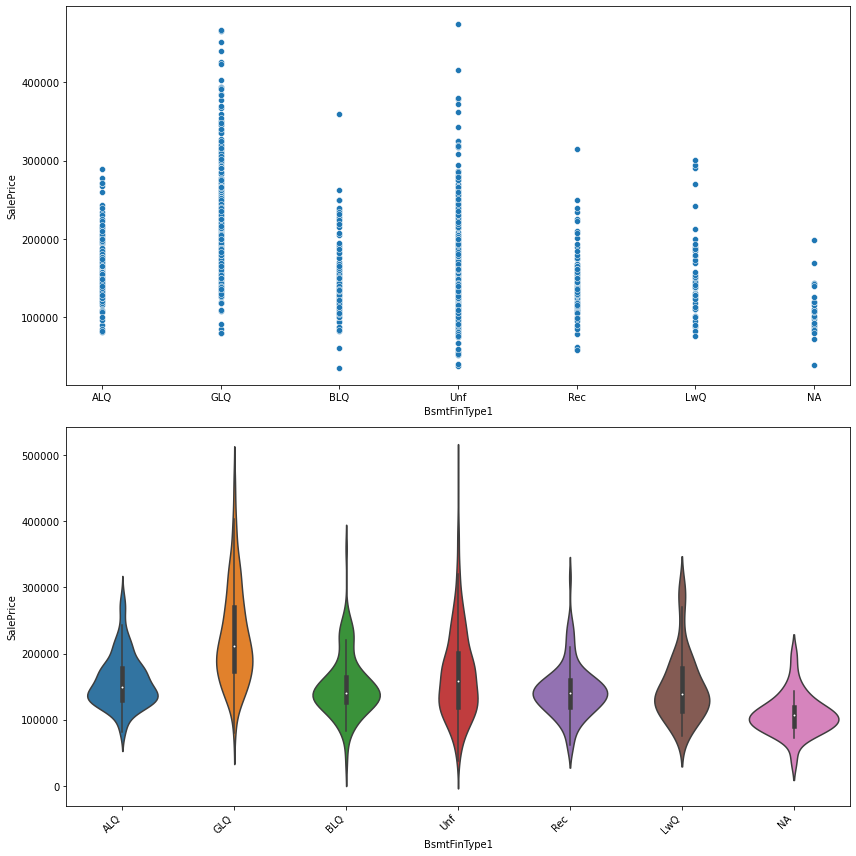

In [154]:
func(cat[33])

     SalePrice  LandContour
HLS   211667.0           39
Lvl   176062.0         1010
Low   173492.0           24
Bnk   143552.0           46


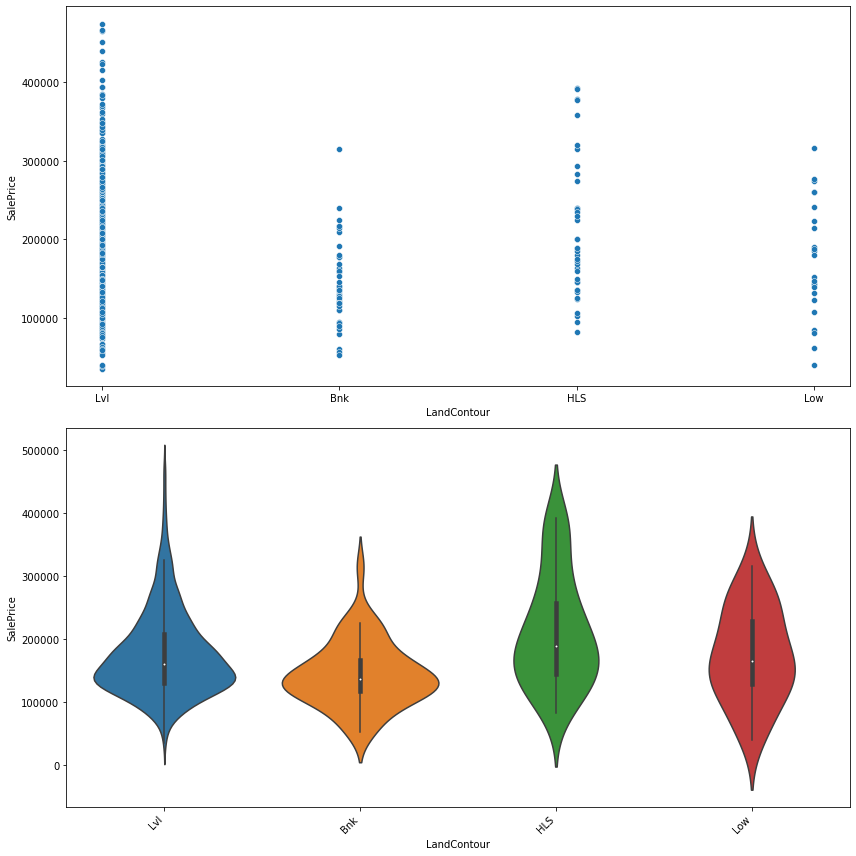

In [155]:
func(cat[34])

    SalePrice  BsmtQual
Ex   306506.0        79
Gd   199986.0       476
TA   139965.0       505
Fa   121349.0        29
NA   107898.0        30


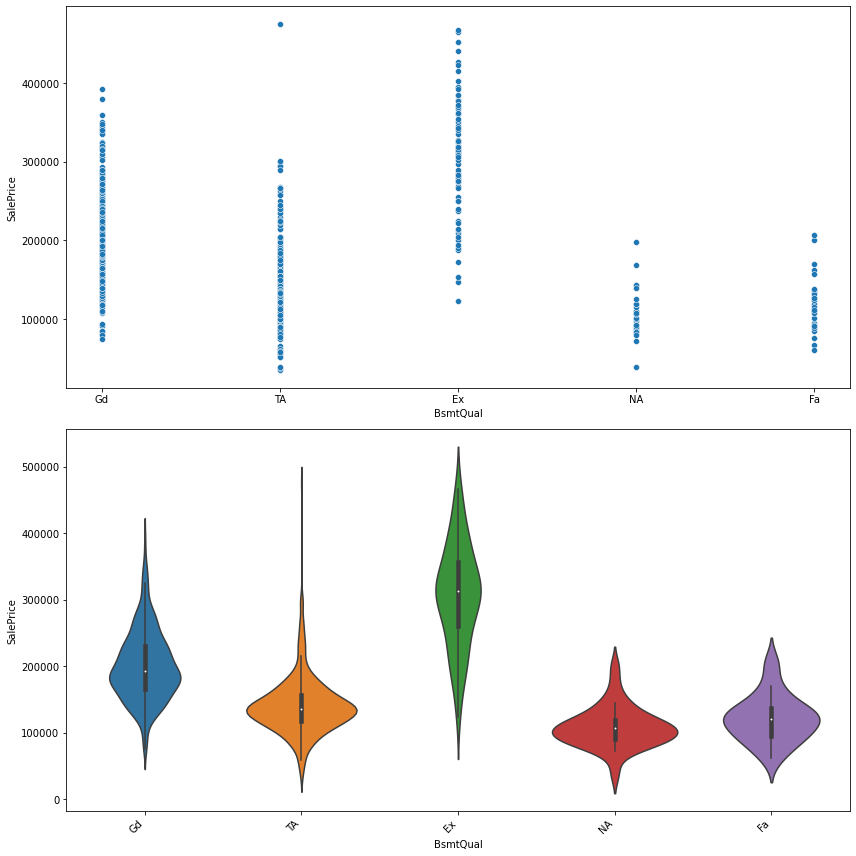

In [156]:
func(cat[35])

MAX   : 
        SalePrice  Electrical
SBrkr  181306.06        1023

MIN   : 
      SalePrice  Electrical
Mix    67000.0           1


FuseA      FuseF     FuseP      Mix      SBrkr
SalePrice   121962.96  109611.29  109500.0  67000.0  181306.06
Electrical      72.00      21.00       2.0      1.0    1023.00

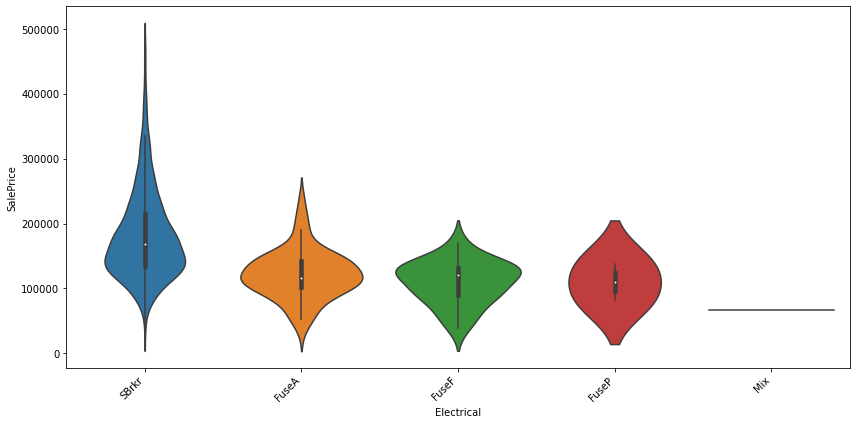

In [157]:
plt.figure(figsize=(12,6))
df_grp_cat_saleprice = df_new[[cat[36],'SalePrice']].groupby(cat[36]).mean().round(2)
df_temp_count = pd.DataFrame(df_new[cat[36]].value_counts())
ax = sns.violinplot(x=cat[36], y='SalePrice', data=df_new)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
df_neigh = pd.merge(df_grp_cat_saleprice, df_temp_count, how = 'inner', left_index = True, right_index = True)
# print(max())
print("MAX   : \n",df_neigh[df_neigh['SalePrice']==max(df_neigh['SalePrice'])])
print()
print("MIN   : \n",df_neigh[df_neigh['SalePrice']==min(df_neigh['SalePrice'])])
df_neigh.transpose()

### LABEL ENCODING

In [158]:
def rename_cat_cols(col_name):
    cats = list(df_new[col_name].unique())
    for i in cats:
        name = col_name+'_'+str(i)
        df_new[name] = df_new.apply(lambda row: 1 if (row[col_name]==i) else 0,axis=1)
        df_test[name] = df_test.apply(lambda row: 1 if (row[col_name]==i) else 0,axis=1)
#     df_new.drop(col_name,axis=1,inplace=True)
#     df_test.drop(col_name,axis=1,inplace=True)

In [159]:
for i in range(len(cat)):
    rename_cat_cols(cat[i])

In [160]:
df_new.drop(cat,axis=1,inplace=True)
df_test.drop(cat,axis=1,inplace=True)

In [161]:
df_new

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0            48.0     4928         0.0         120        958         1078   
1            95.0    15865         0.0         351       1043         2217   
2            92.0     9920         0.0         862        255         1117   
3           105.0    11751       480.0         705       1139         1844   
4            79.0    16635       126.0        1246        356         1602   
...           ...      ...         ...         ...        ...          ...   
1163         79.0     9819        31.0         450        432          882   
1164         67.0     8777         0.0           0          0            0   
1165         24.0     2280         0.0         566        289          855   
1166         50.0     8500         0.0           0        649          649   
1167         84.0     7861         0.0         457        326          783   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0          958         0        958             0         2         0   
1         2217         0       2217             1         2         0   
2         1127       886       2013             1         2         1   
3         1844         0       1844             0         2         0   
4         1602         0       1602             0         2         0   
...        ...       ...        ...           ...       ...       ...   
1163       900         0        900             0         1         0   
1164      1126         0       1126             0         2         0   
1165       855       601       1456             0         2         1   
1166       649       668       1317             0         1         0   
1167       807       702       1509             1         2         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
0                2             5           1           2         440   
1                4             8           1           2         621   
2                3             8           1           2         455   
3                3             7           1           2         546   
4                3             8           1           2         529   
...            ...           ...         ...         ...         ...   
1163             3             5           0           1         280   
1164             2             5           0           2         520   
1165             3             7           1           2         440   
1166             3             6           0           1         250   
1167             3             7           1           2         393   

      WoodDeckSF  OpenPorchSF  SalePrice  AgeOfHouse  CentralAir_Y  \
0              0          205     128000          31             1   
1             81          207     268000          37             1   
2            180          130     269790          11             1   
3              0          122     190000          33             1   
4            240            0     215000          32             1   
...          ...          ...        ...         ...           ...   
1163           0            0     122000          43             1   
1164           0           96     108000          60             1   
1165          87            0     148500          33             1   
1166           0           54      40000          88             0   
1167         100           75     183200           4             1   

      CentralAir_N  Exterior2nd_Plywood  Exterior2nd_Wd Sdng  \
0                0                    1                    0   
1                0                    0                    1   
2                0                    0                    0   
3                0                    1                    0   
4                0                    0                    0   
...            ...                  ...                  ...   
1163             0                    

In [162]:
df_test

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0           86.0    14157       200.0        1249        673         1922   
1           44.0     5814         0.0        1036        184         1220   
2           76.0    11838         0.0           0       1753         1753   
3           75.0    12000         0.0         275        429          704   
4           86.0    14598        74.0           0        894          894   
..           ...      ...         ...         ...        ...          ...   
287         78.0    10206       468.0          33       1530         1563   
288         57.0     9245         0.0         686        304          990   
289         76.0    11241       180.0         578        426         1004   
290         50.0     5000         0.0         399        605         1004   
291         21.0     1953       408.0         309        174          483   

     1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        1922         0       1922             1         2         0   
1        1360         0       1360             1         1         0   
2        1788         0       1788             0         2         0   
3         860       704       1564             0         1         1   
4         894      1039       1933             0         2         1   
..        ...       ...        ...           ...       ...       ...   
287      1563         0       1563             0         2         0   
288       990         0        990             0         1         0   
289      1004         0       1004             1         1         0   
290      1004       660       1664             0         2         0   
291       483       504        987             0         1         1   

     BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
0               3             8           1           3         676   
1               1             4           1           2         565   
2               3             7           1           2         522   
3               3             7           1           1         234   
4               4             9           1           3         668   
..            ...           ...         ...         ...         ...   
287             3             6           1           3         758   
288             3             5           0           2         672   
289             2             5           1           2         480   
290             3             7           2           2         420   
291             2             5           0           1         264   

     WoodDeckSF  OpenPorchSF  AgeOfHouse  CentralAir_Y  CentralAir_N  \
0           178           51           2             1             0   
1            63            0          25             1             0   
2           202          151           8             1             0   
3             0            0          68             1             0   
4           100           18           1             1             0   
..          ...          ...         ...           ...           ...   
287         144           99           1             1             0   
288           0            0          14             1             0   
289           0            0          40             1             0   
290           0           24          59             1             0   
291          72            0          33             1             0   

     Exterior2nd_Plywood  Exterior2nd_Wd Sdng  Exterior2nd_MetalSd  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    1   
4                      0                    0                    0   
..                   ...                  ...                  ...   
287    

### CORRELATION

<AxesSubplot:>

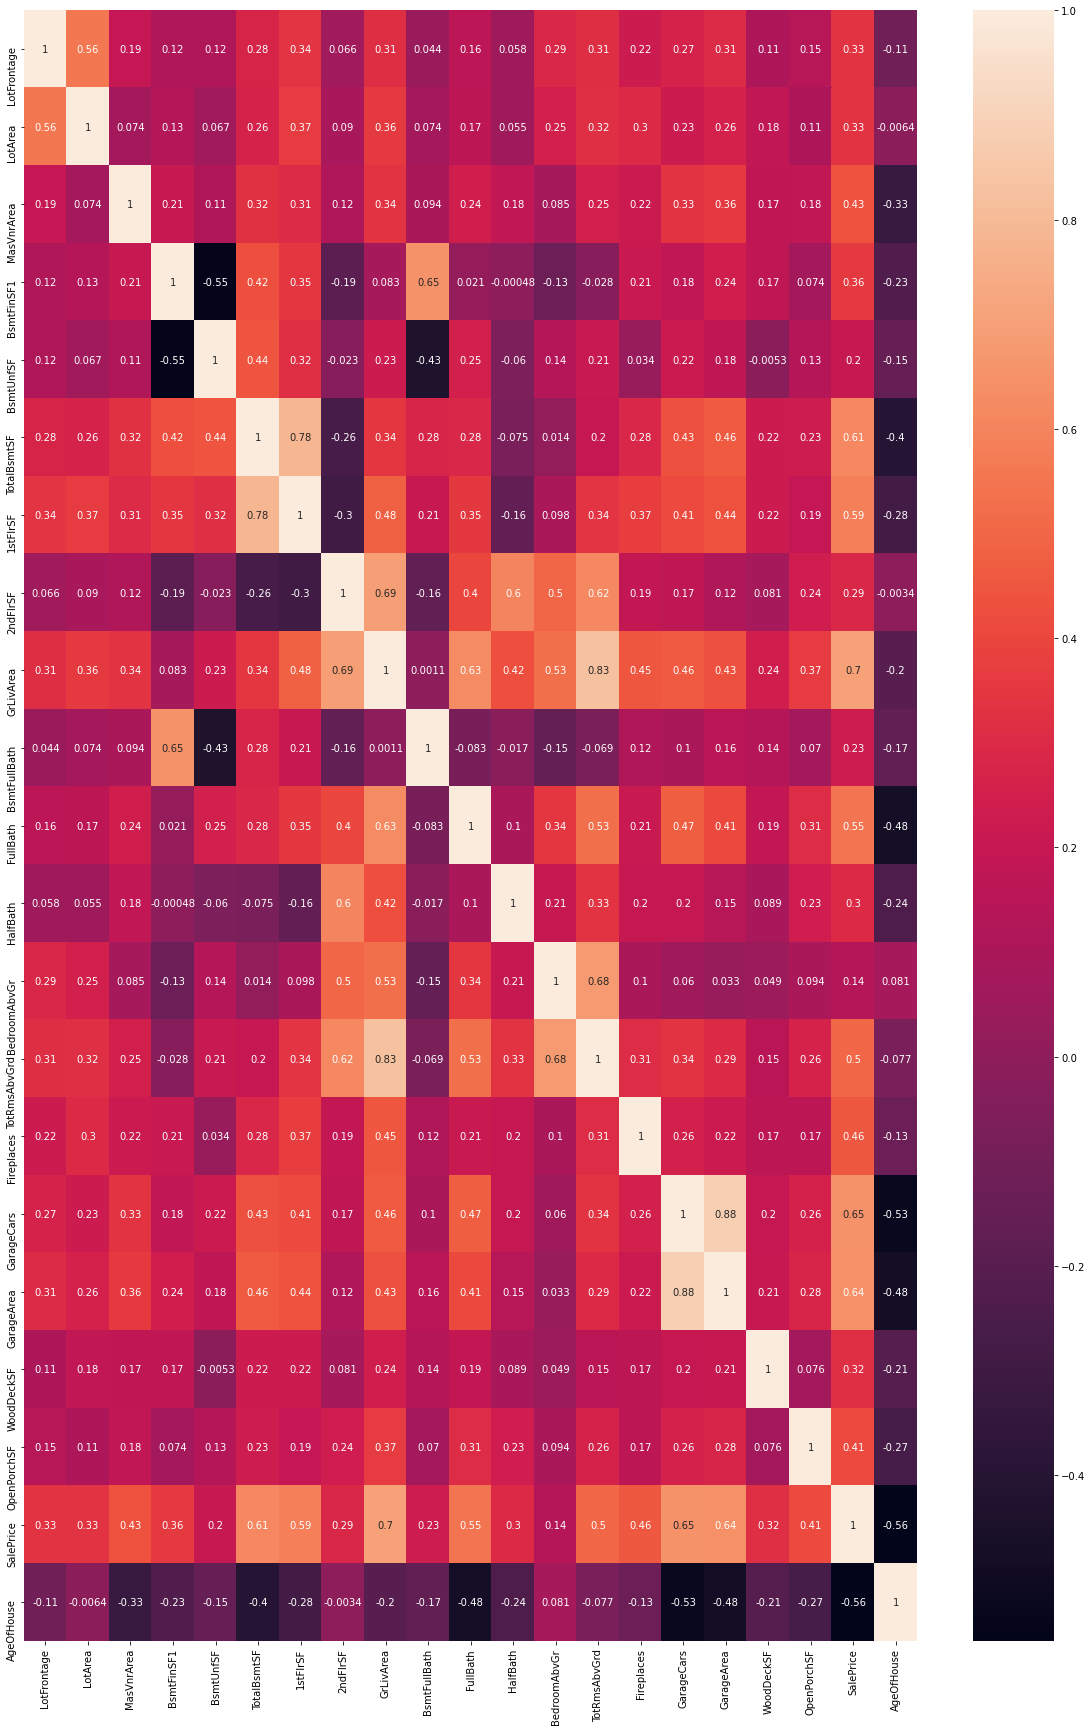

In [163]:
plt.figure(figsize=(20,30))
sns.heatmap(df_new[cont].corr(),annot=True)

In [164]:
x = df_new.drop('SalePrice',axis=1)
y = df_new['SalePrice']
test_x = df_test.copy()

### MODEL BUILDING

In [165]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)
x_r_t = sc.fit_transform(test_x)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
models = {
    "Linear Regression" : {'model':LinearRegression(),
                           'params':{}
                          }, 
    "Ridge" : {'model':Ridge(),
               'params':{'alpha':[200, 250, 300, 500]}
              }, 
    "Decision Tree" : {'model':DecisionTreeRegressor(),
                       'params':{'max_depth' : [5],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestRegressor(),
                       'params':{'n_estimators':[100,150],
                                 'max_depth':[5,8,50,100,150,200], 
                                 'min_samples_leaf':[1,2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsRegressor(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan']
                                      }
                            }
}

In [166]:
max_scr = 0

for i,j in models.items():
    best_model_scr = 0
    best_model_rs = 0
    for r_s in range(1,100):
        x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=r_s,test_size=0.20)
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        r2 = r2_score(y_test,pred_test)
        if r2 > best_model_scr:
            best_model_scr = r2
            best_model_r_s = r_s
    print("Model : ",j['model'])
    print("Best Score : ",best_model_scr)
    print("Random State : ",best_model_r_s)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
        best_r_s = best_model_r_s
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)
print("Random State : ",best_r_s)

Model :  LinearRegression()
Best Score :  0.8799252484071602
Random State :  15
-------------------------------------------------------------------------------------------
Model :  Ridge()
Best Score :  0.9242727641256571
Random State :  79
-------------------------------------------------------------------------------------------
Model :  DecisionTreeRegressor()
Best Score :  0.8011112951786162
Random State :  38
-------------------------------------------------------------------------------------------
Model :  RandomForestRegressor()
Best Score :  0.9020156734567781
Random State :  59
-------------------------------------------------------------------------------------------
Model :  KNeighborsRegressor()
Best Score :  0.8367695515526964
Random State :  66
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  Ridge()
Best Score :  0.92427276

In [167]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=79,test_size=0.20)
grid = GridSearchCV(models['Ridge']['model'], 
                    models['Ridge']['params'], 
                    cv=4, scoring = 'r2')
grid.fit(x_train,y_train)
print({
    'model': 'Ridge',
    'best_score' : grid.best_score_,
    'best_params' : grid.best_params_
})

{'model': 'Ridge', 'best_score': 0.8772793889311302, 'best_params': {'alpha': 300}}


In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
ridge = Ridge(alpha = 300)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
print('R2 Score : ',r2_score(y_test,y_pred))
print('RMSE Score : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MSE Score : ',mean_squared_error(y_test,y_pred))
print('RMAE Score : ',np.sqrt(mean_absolute_error(y_test,y_pred)))

R2 Score :  0.9211503479652886
RMSE Score :  20111.77364202779
MSE Score :  404483439.0281638
RMAE Score :  119.30357165260716


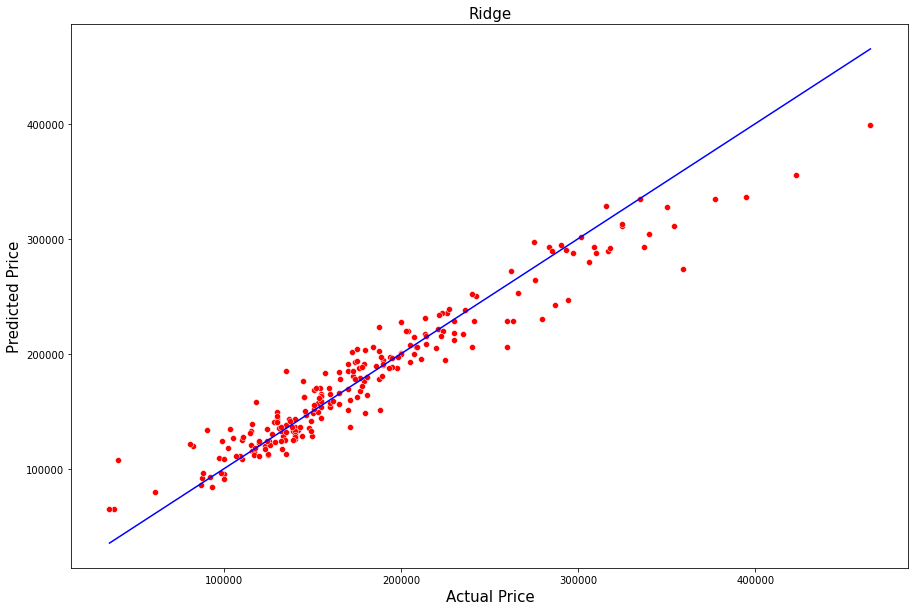

In [169]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(y_test,y_pred,color='r')
ax = sns.lineplot(y_test,y_test,color='b')
ax.set_xlabel('Actual Price',fontsize=15)
ax.set_ylabel('Predicted Price',fontsize=15)
ax.set_title('Ridge',fontsize=15)
plt.show()

In [170]:
y_pred = ridge.predict(x_r_t)
df_test['Predicted_Sale_Price'] = y_pred
df_test

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0           86.0    14157       200.0        1249        673         1922   
1           44.0     5814         0.0        1036        184         1220   
2           76.0    11838         0.0           0       1753         1753   
3           75.0    12000         0.0         275        429          704   
4           86.0    14598        74.0           0        894          894   
..           ...      ...         ...         ...        ...          ...   
287         78.0    10206       468.0          33       1530         1563   
288         57.0     9245         0.0         686        304          990   
289         76.0    11241       180.0         578        426         1004   
290         50.0     5000         0.0         399        605         1004   
291         21.0     1953       408.0         309        174          483   

     1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        1922         0       1922             1         2         0   
1        1360         0       1360             1         1         0   
2        1788         0       1788             0         2         0   
3         860       704       1564             0         1         1   
4         894      1039       1933             0         2         1   
..        ...       ...        ...           ...       ...       ...   
287      1563         0       1563             0         2         0   
288       990         0        990             0         1         0   
289      1004         0       1004             1         1         0   
290      1004       660       1664             0         2         0   
291       483       504        987             0         1         1   

     BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
0               3             8           1           3         676   
1               1             4           1           2         565   
2               3             7           1           2         522   
3               3             7           1           1         234   
4               4             9           1           3         668   
..            ...           ...         ...         ...         ...   
287             3             6           1           3         758   
288             3             5           0           2         672   
289             2             5           1           2         480   
290             3             7           2           2         420   
291             2             5           0           1         264   

     WoodDeckSF  OpenPorchSF  AgeOfHouse  CentralAir_Y  CentralAir_N  \
0           178           51           2             1             0   
1            63            0          25             1             0   
2           202          151           8             1             0   
3             0            0          68             1             0   
4           100           18           1             1             0   
..          ...          ...         ...           ...           ...   
287         144           99           1             1             0   
288           0            0          14             1             0   
289           0            0          40             1             0   
290           0           24          59             1             0   
291          72            0          33             1             0   

     Exterior2nd_Plywood  Exterior2nd_Wd Sdng  Exterior2nd_MetalSd  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    1   
4                      0                    0                    0   
..                   ...                  ...                  ...   
287    

<AxesSubplot:xlabel='Predicted_Sale_Price', ylabel='Density'>

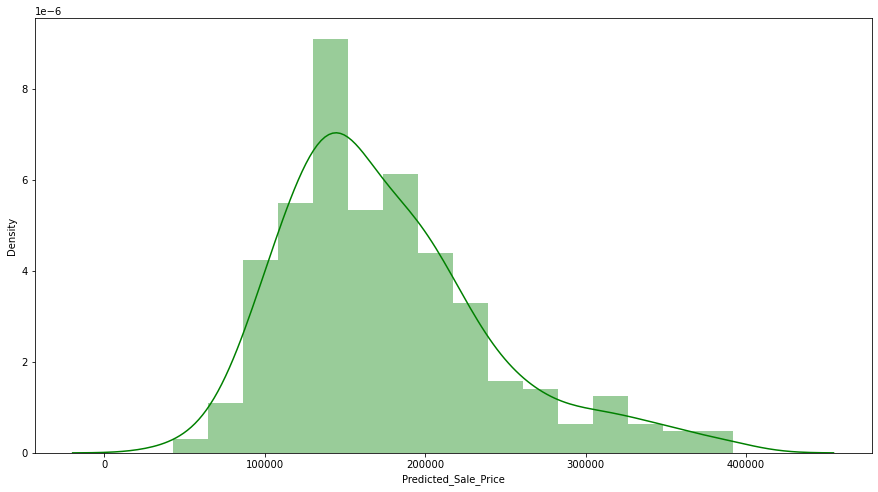

In [171]:
plt.figure(figsize=(15,8))
sns.distplot(df_test['Predicted_Sale_Price'],color='green')


In [174]:
df_test.to_csv("Housing_Price_predicted.csv", index=False)

In [176]:
import joblib
joblib.dump(ridge,"Housing_ridge.pkl")

['Housing_ridge.pkl']